In [1]:
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm

In [2]:
Results = np.load('../np_multi/results_np_cv1.npy')

In [3]:
pred_result = Results
print(pred_result.shape)

(27, 192, 192, 32, 3)


In [4]:
Unlabelled = [0,0,0]
anterior = [255,255,0]
posterior = [0,255,255]
COLOR_DICT = np.array([Unlabelled, anterior, posterior])

In [5]:
def color_change(one_slice_array):
    transpose =  np.transpose(one_slice_array,(2,0,1,3))
    for i in range(transpose.shape[0]):
        temp_32 = transpose[i]
        for j in range(temp_32.shape[0]):
            for k in range(temp_32.shape[1]):
                index_of_class = np.argmax(temp_32[j,k])
                temp_32[j,k] = COLOR_DICT[index_of_class]
        transpose[i] = temp_32
    ready_result = np.transpose(transpose, (1,2,0,3))
    return ready_result


for i in tqdm(range(pred_result.shape[0])):
    pred_result[i] = color_change(pred_result[i])
    pred_result[i] = pred_result[i].astype(np.uint8)
print('Done')

100%|██████████| 27/27 [02:37<00:00,  5.83s/it]

Done


In [18]:
print(pred_result.shape)
print(np.min(pred_result))
print(np.max(pred_result))

(27, 192, 192, 32, 3)
0.0
255.0


(27, 32, 192, 192, 3)


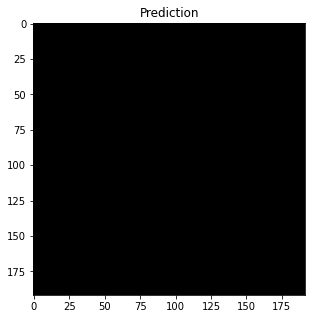

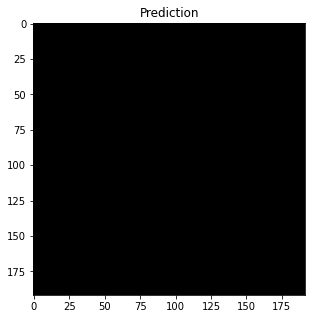

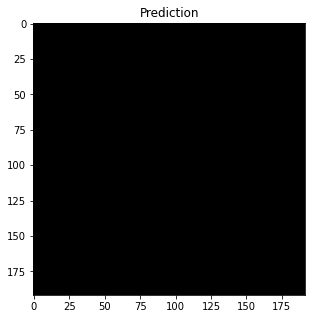

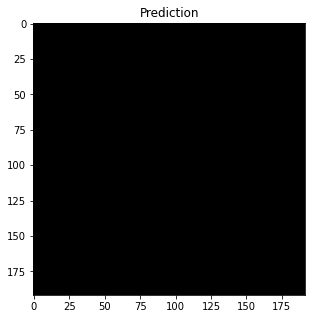

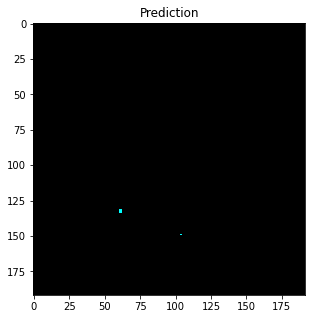

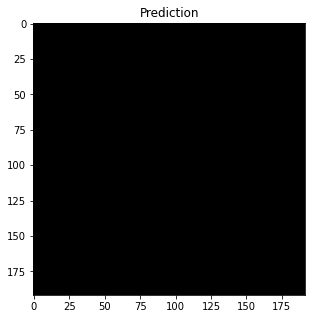

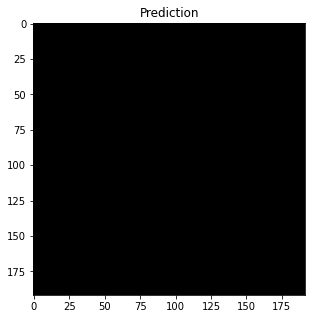

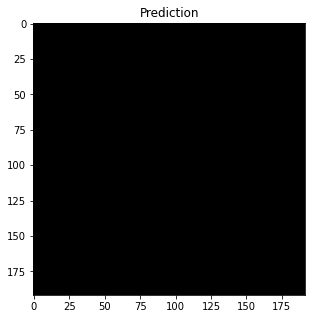

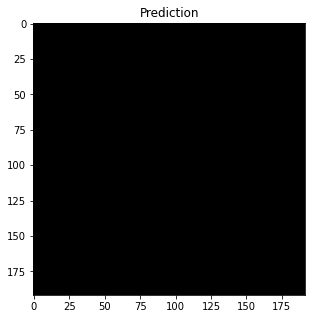

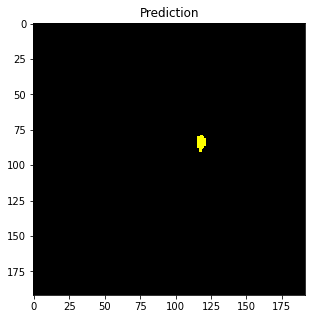

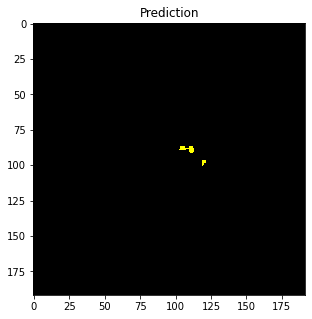

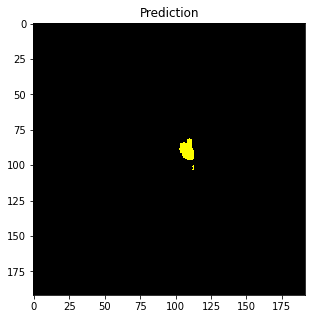

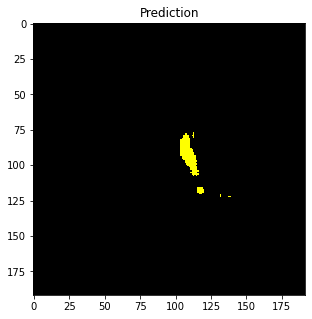

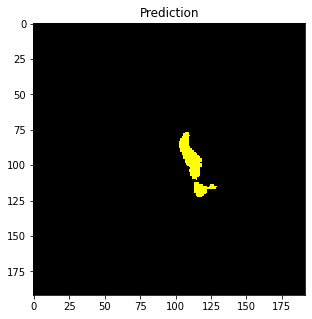

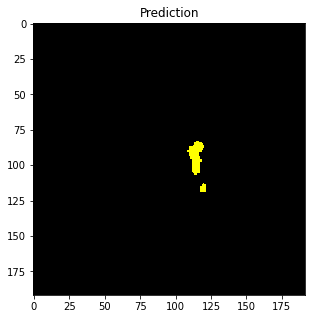

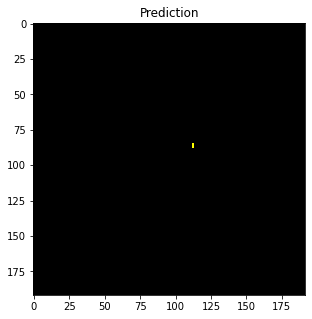

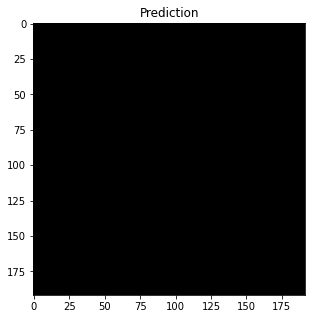

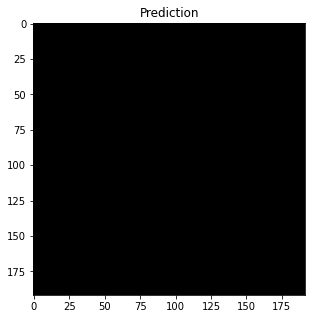

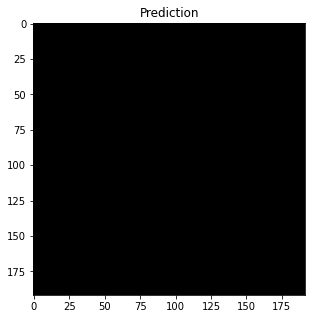

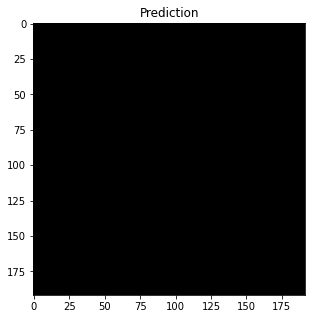

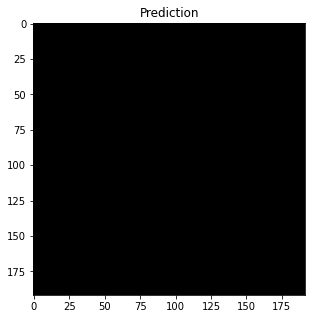

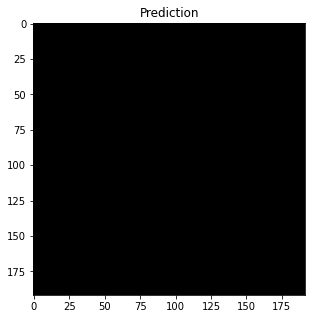

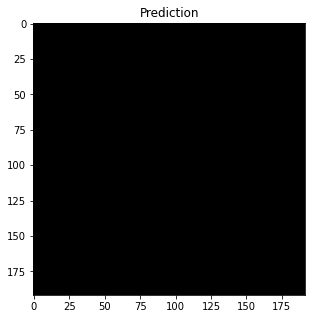

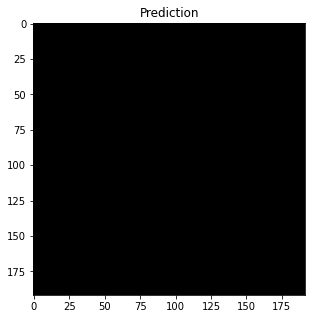

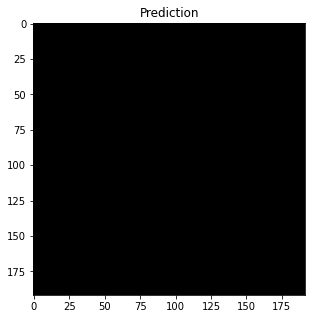

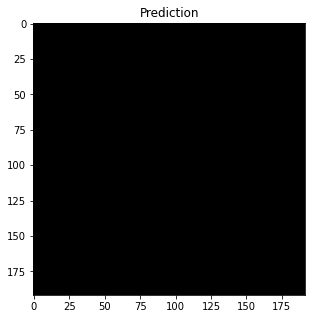

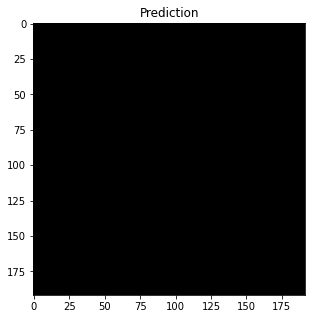

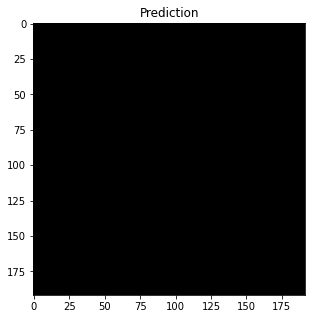

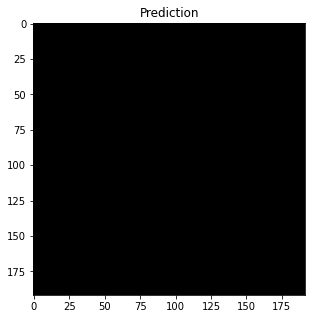

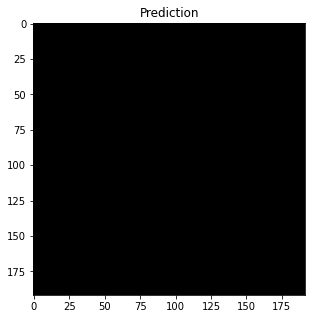

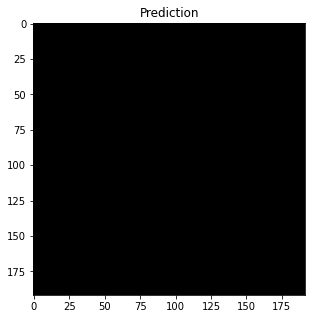

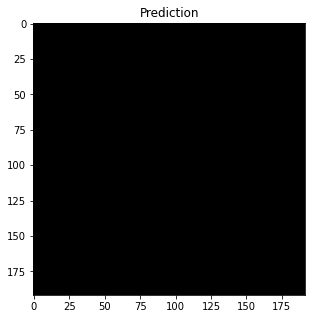

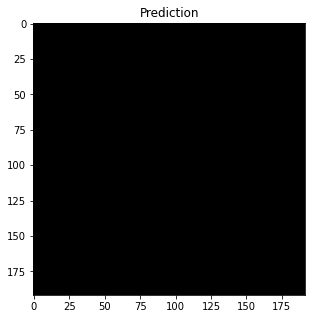

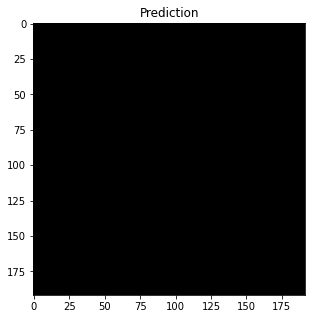

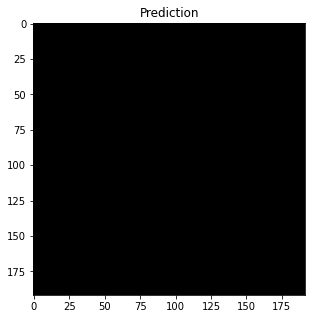

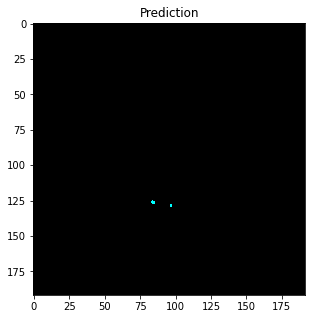

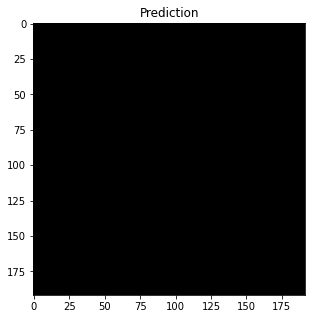

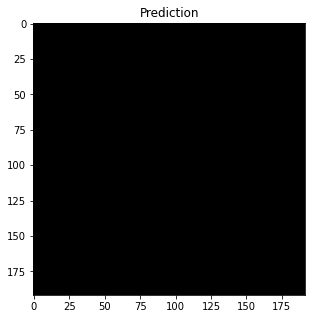

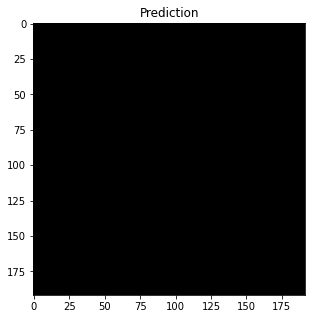

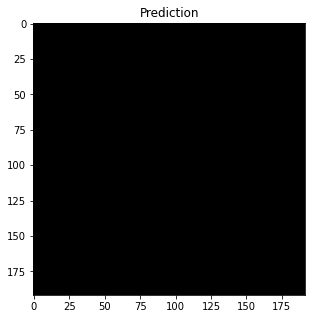

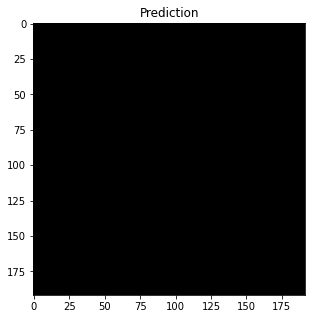

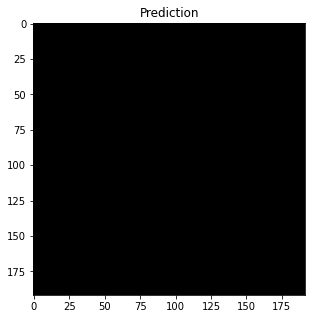

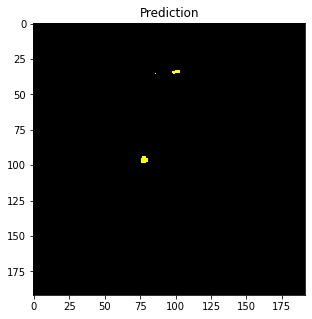

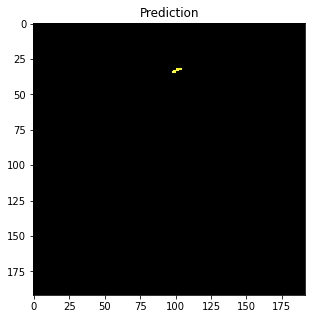

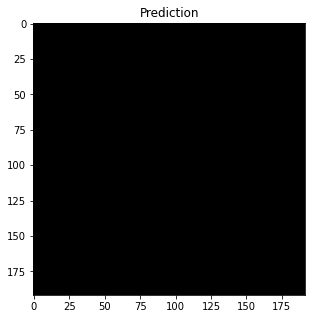

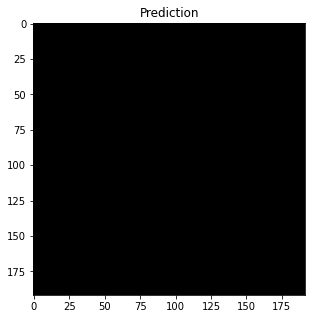

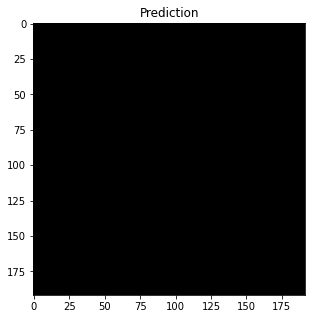

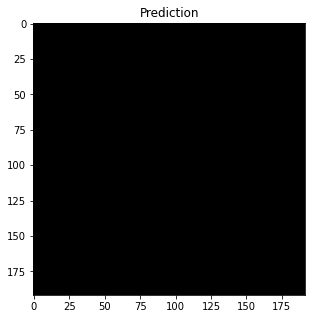

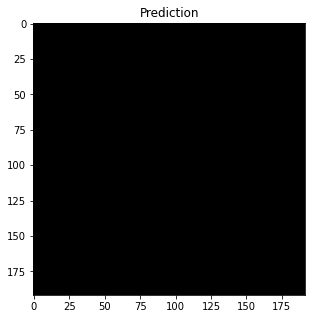

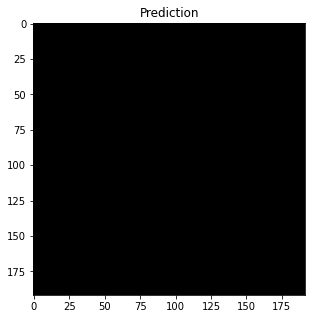

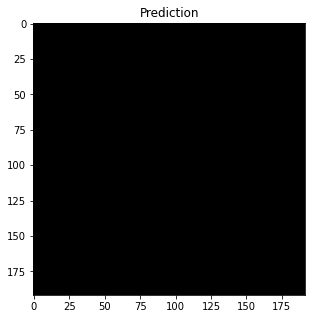

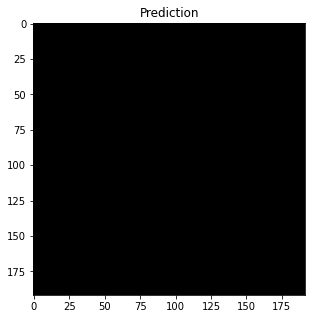

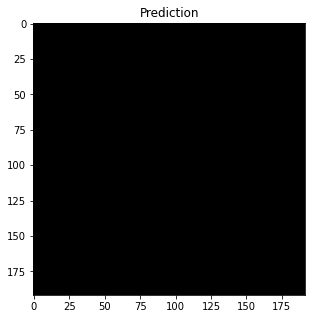

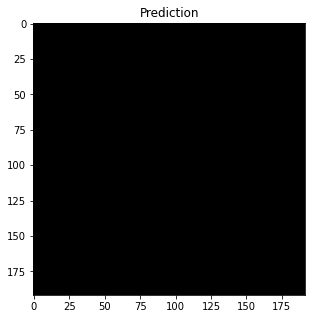

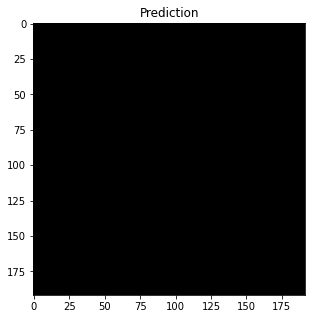

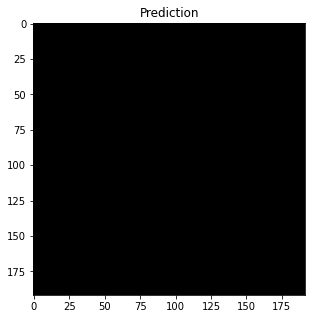

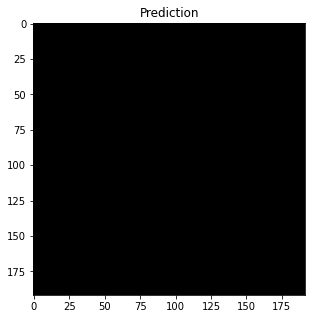

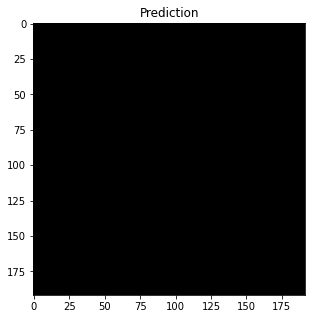

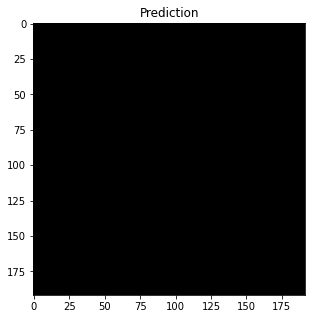

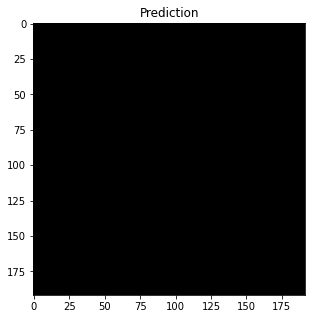

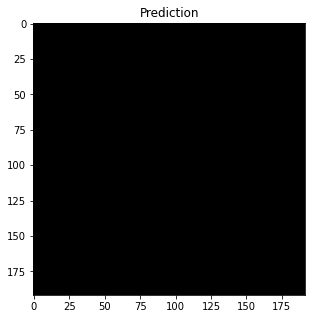

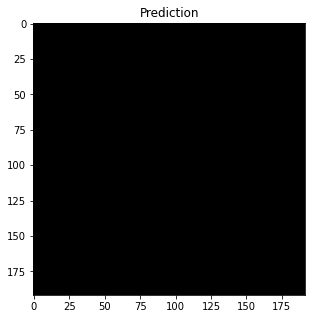

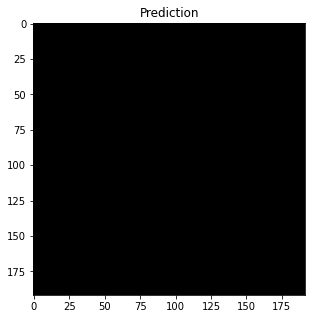

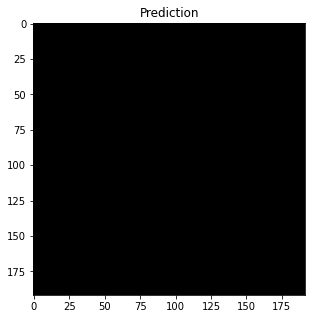

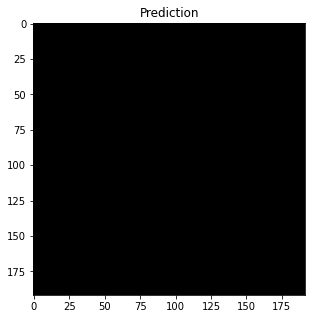

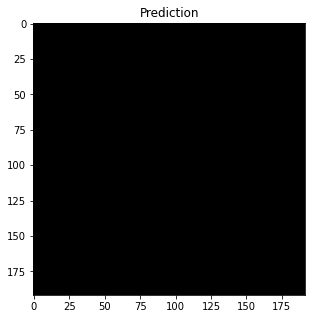

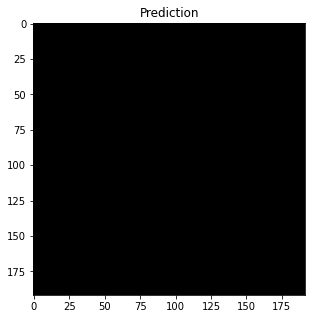

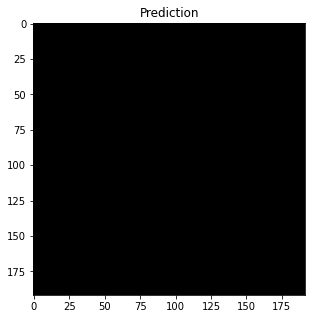

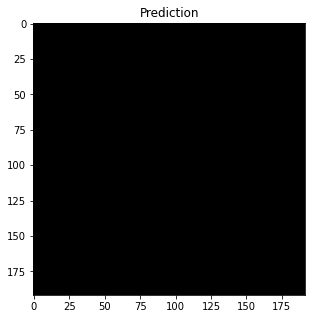

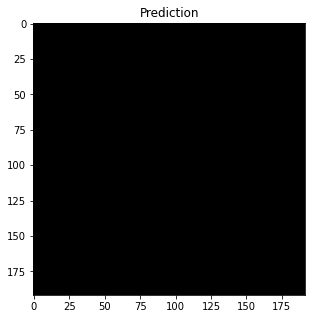

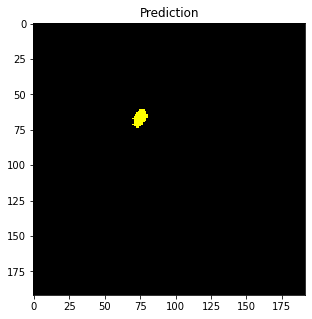

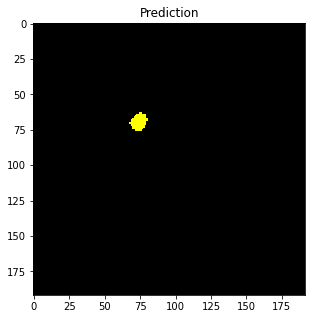

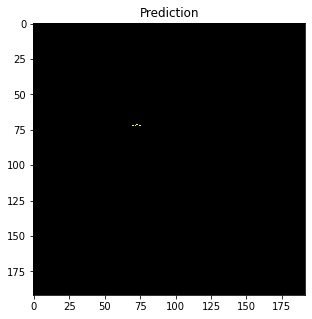

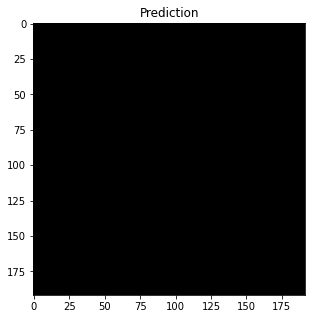

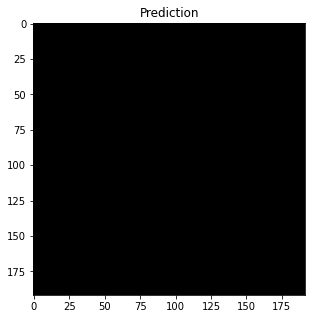

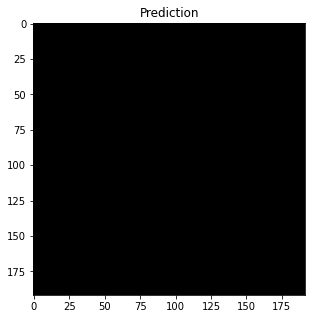

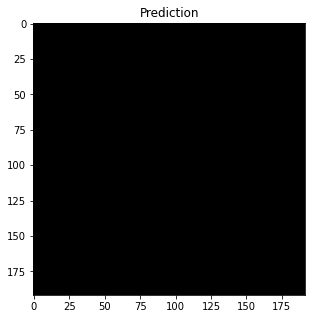

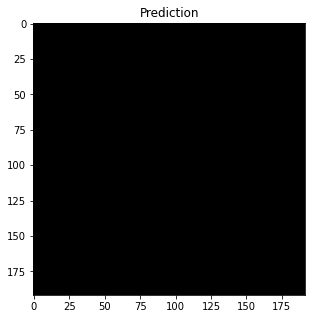

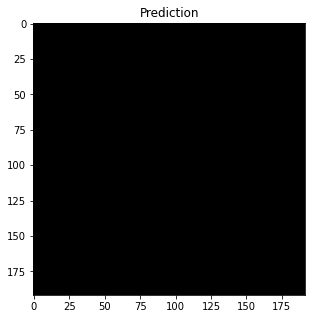

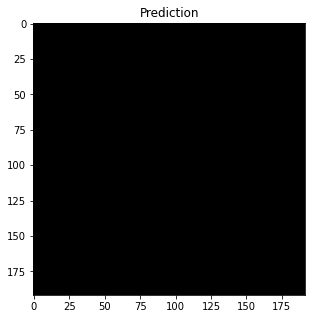

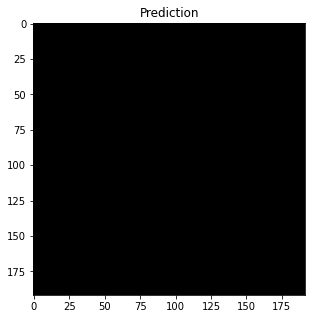

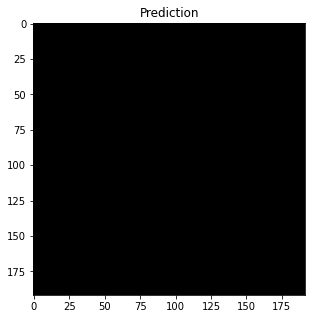

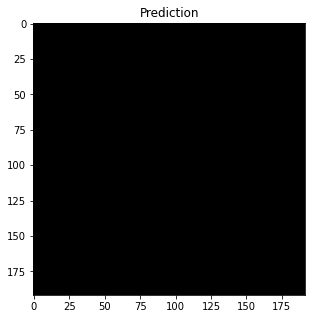

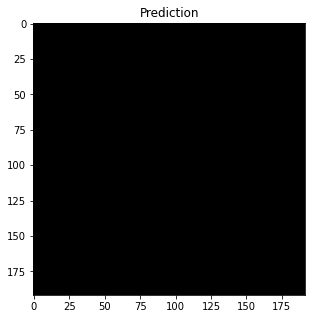

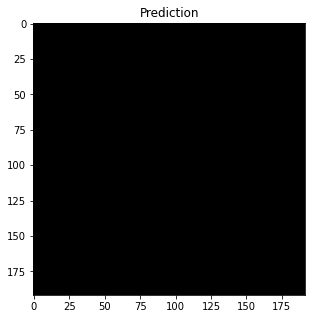

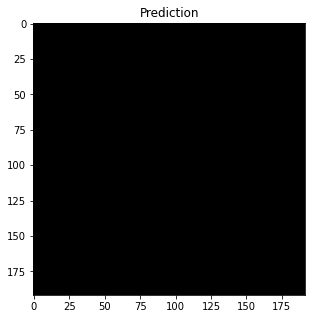

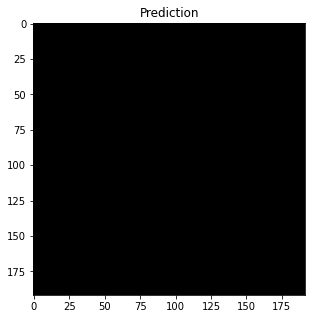

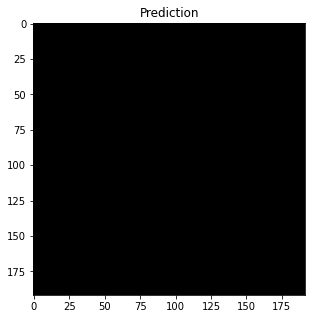

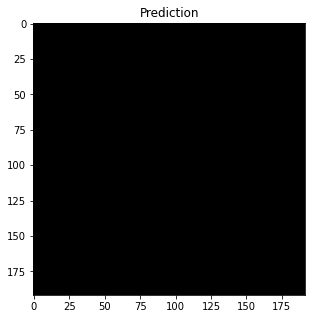

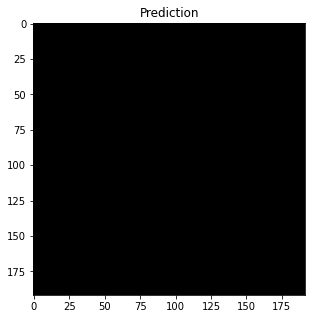

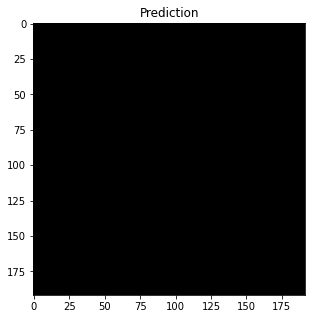

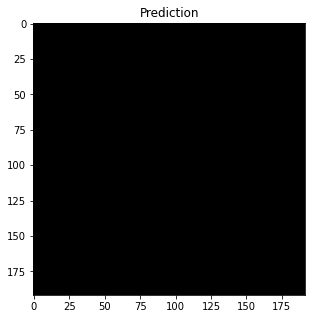

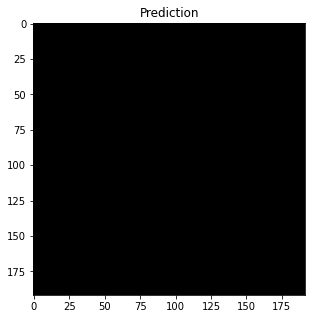

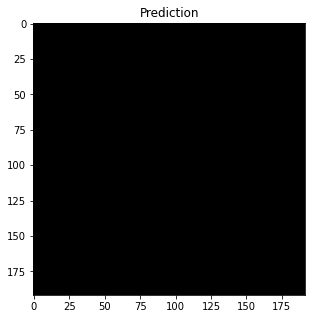

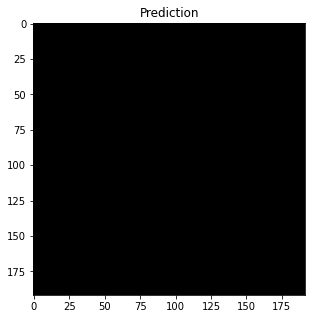

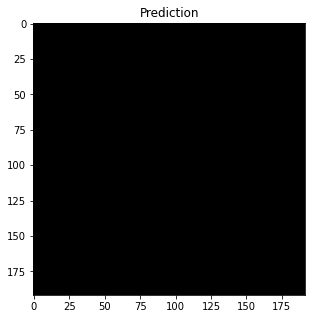

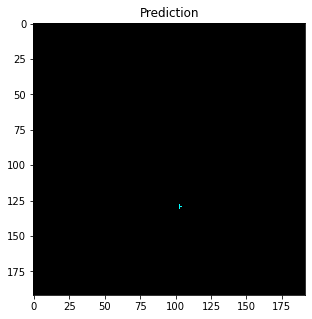

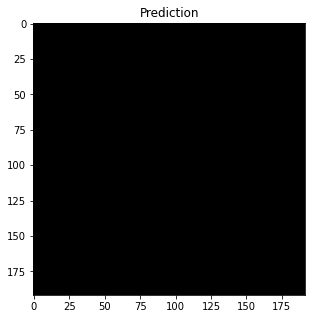

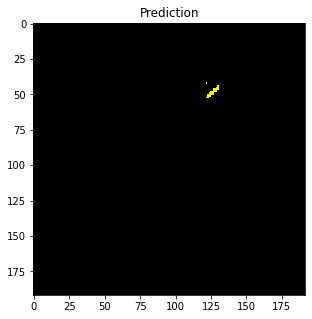

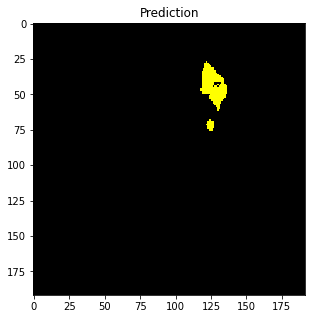

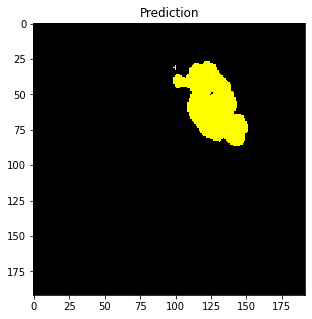

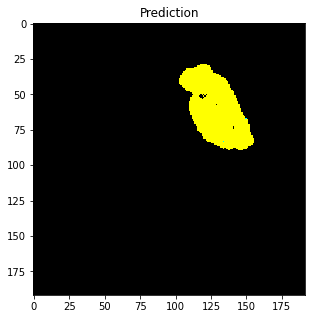

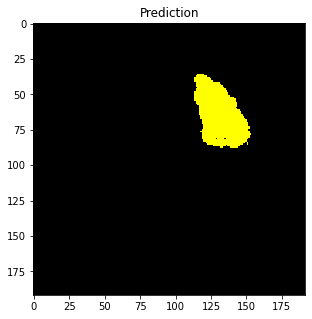

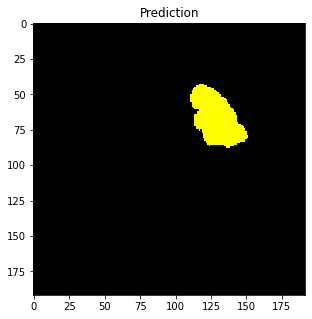

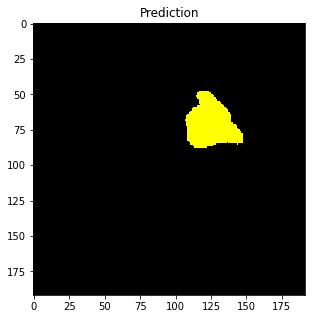

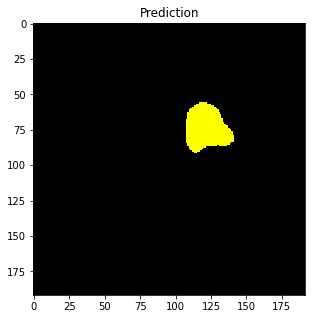

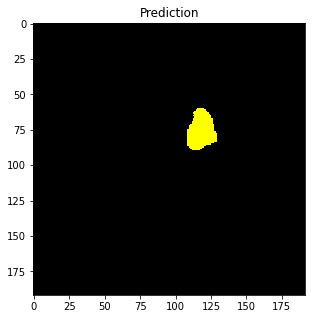

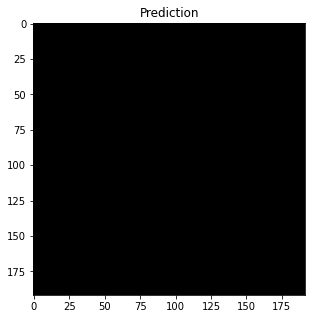

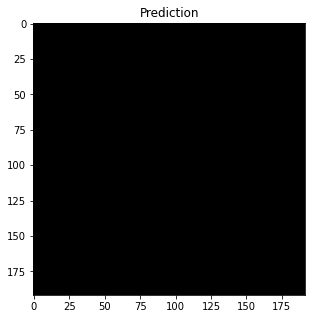

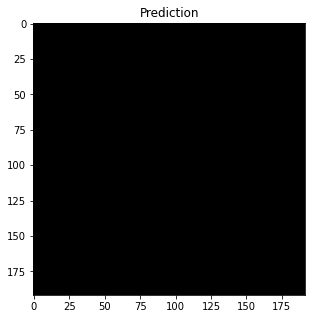

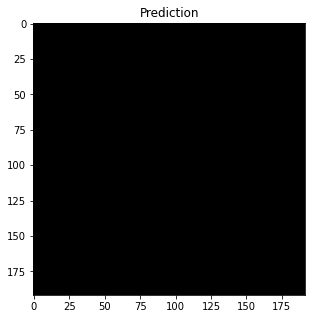

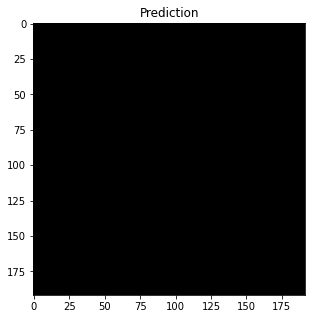

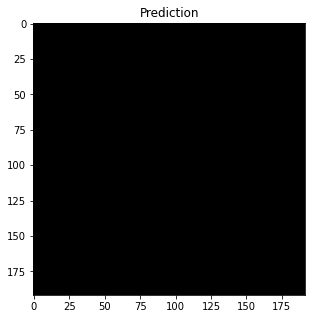

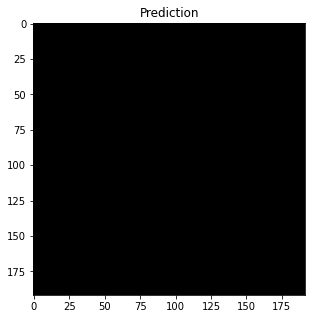

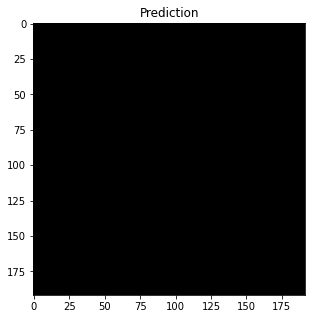

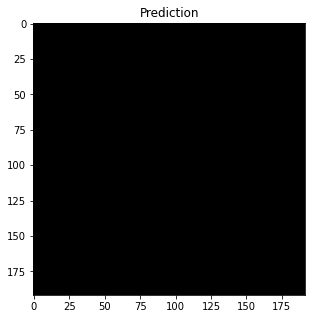

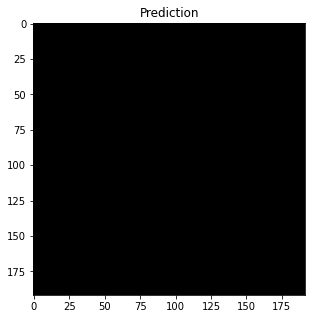

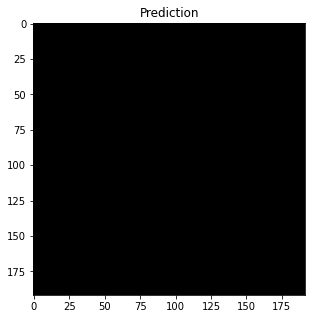

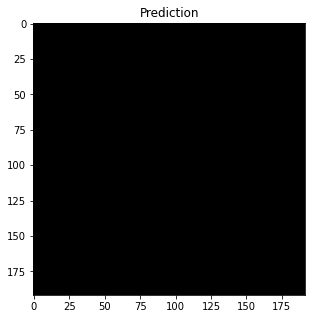

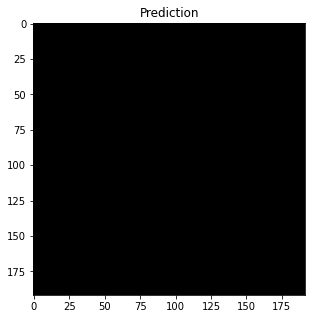

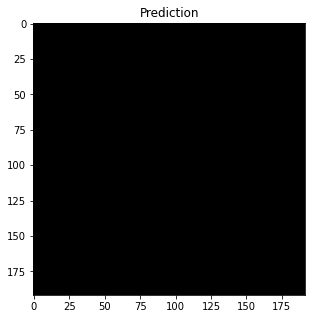

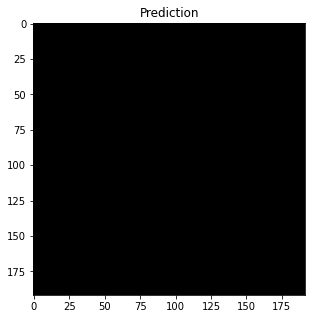

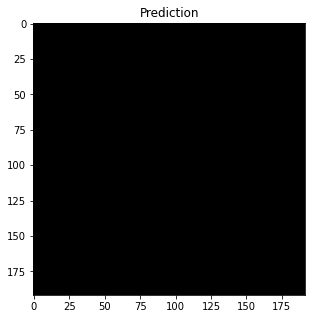

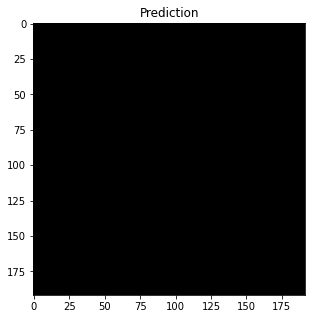

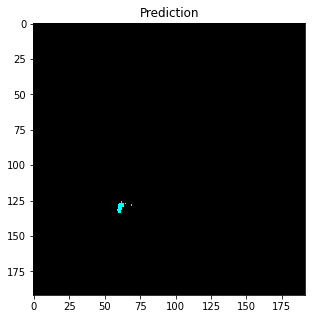

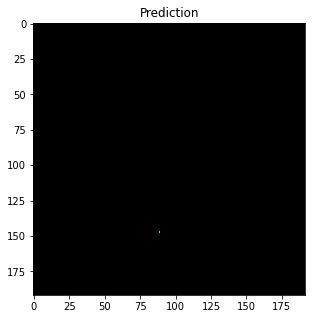

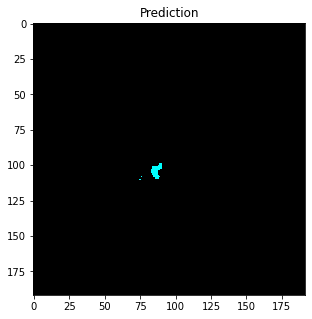

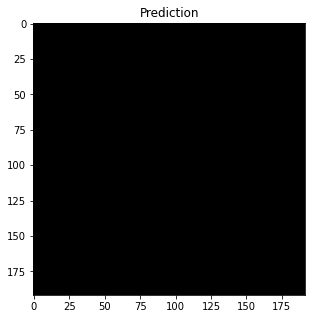

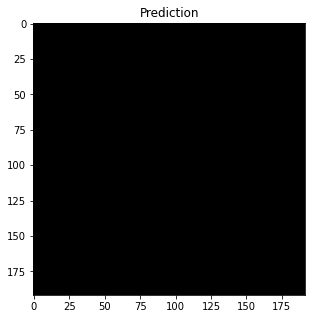

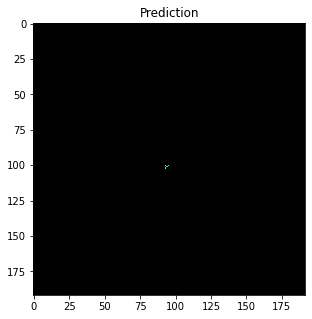

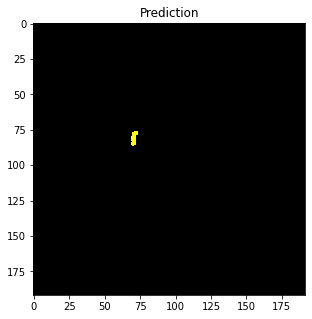

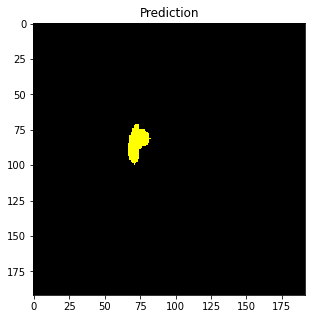

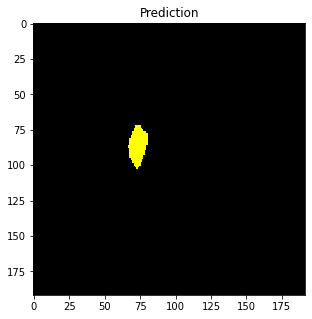

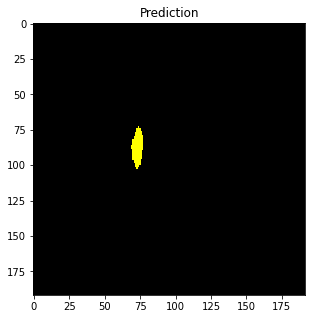

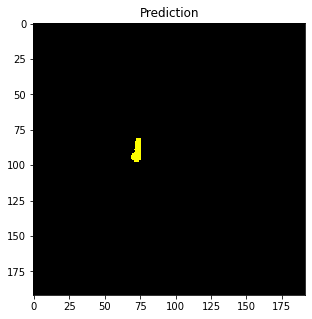

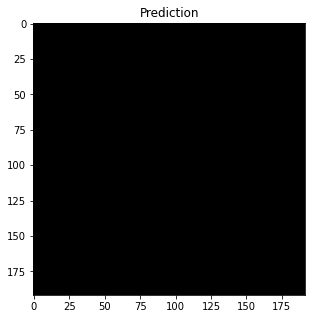

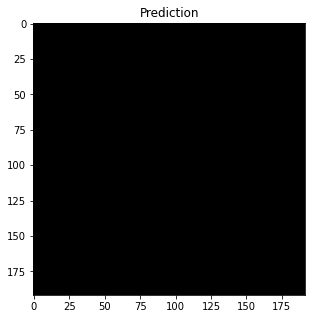

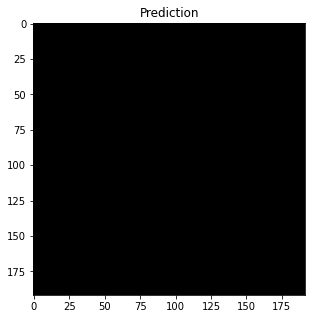

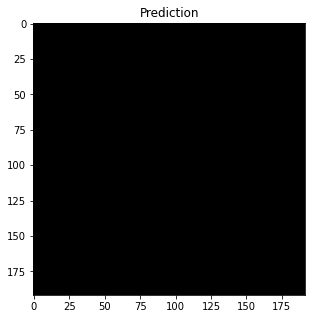

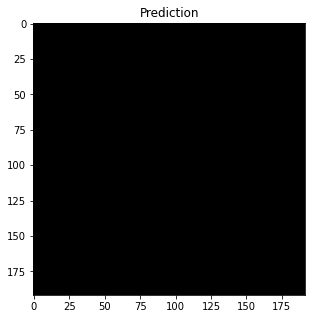

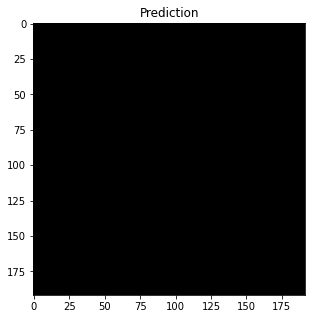

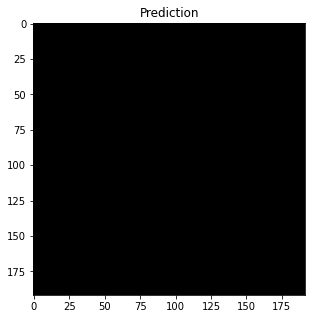

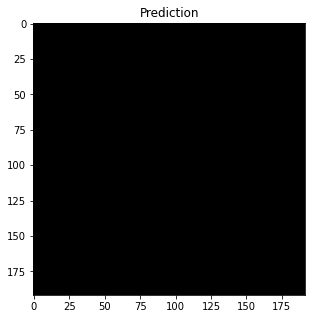

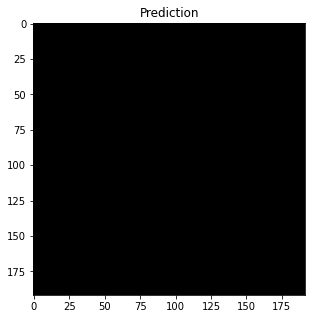

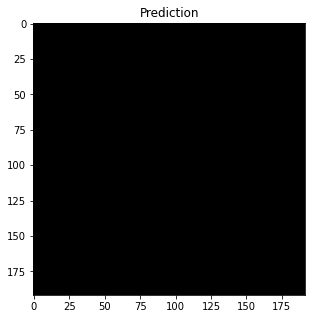

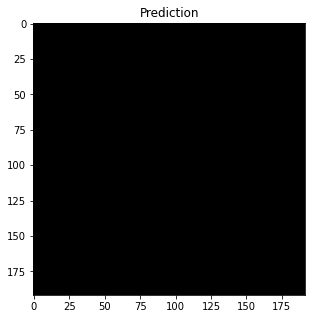

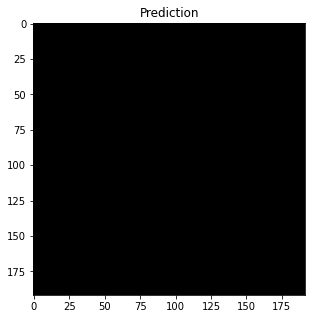

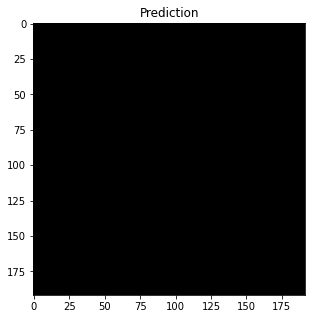

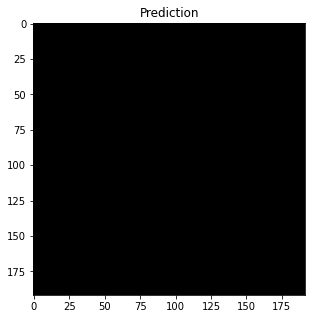

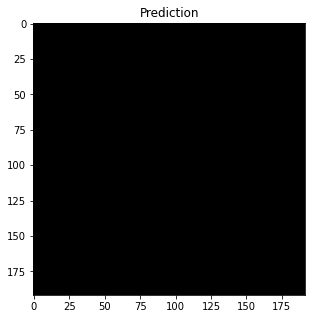

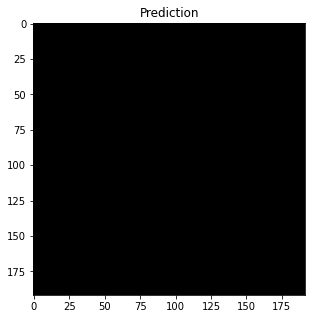

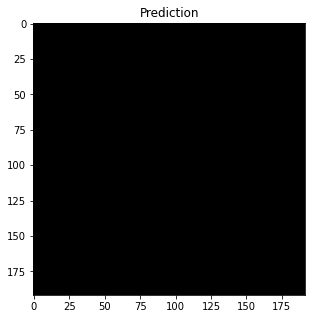

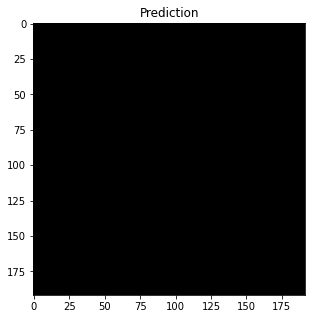

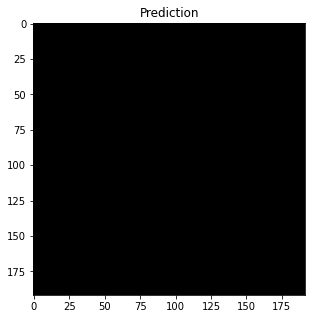

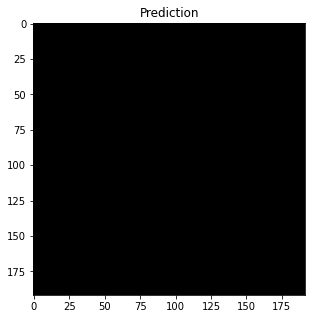

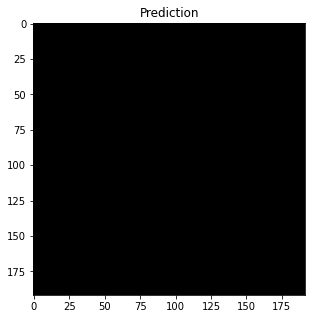

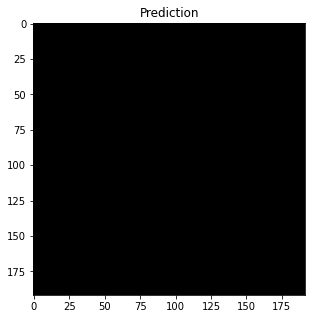

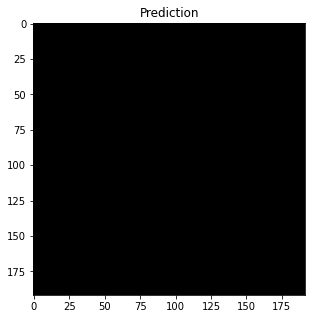

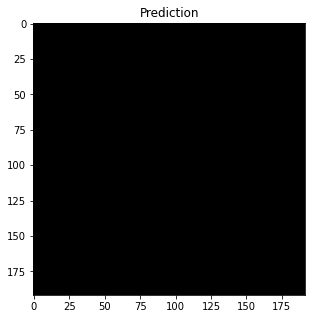

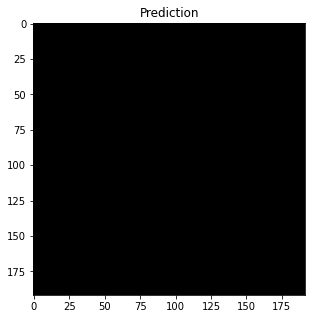

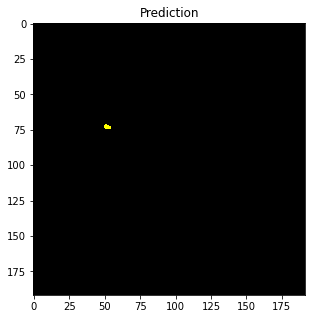

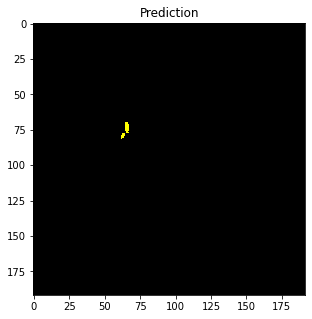

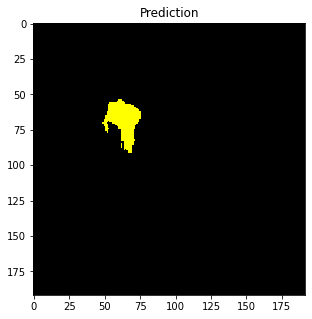

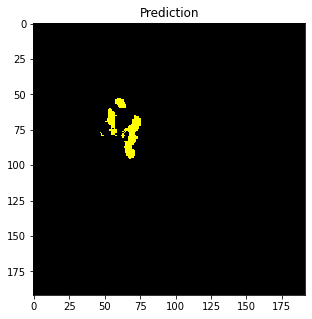

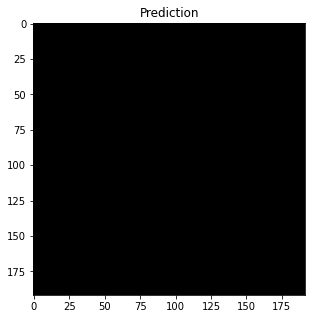

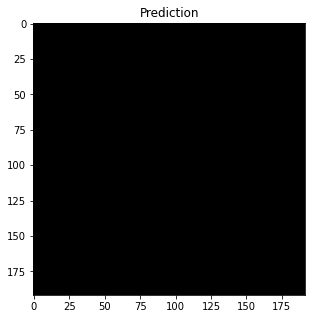

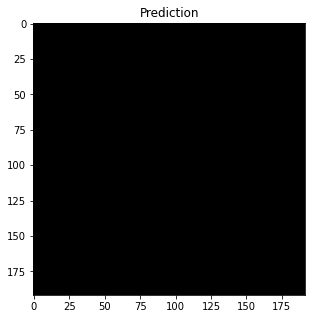

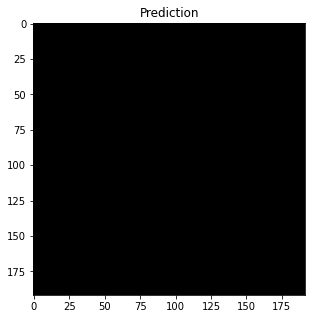

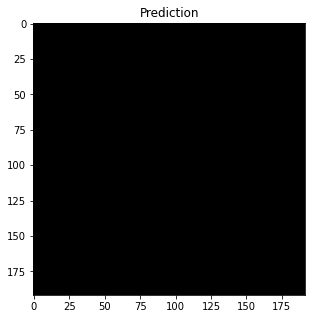

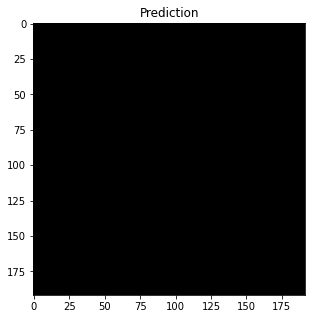

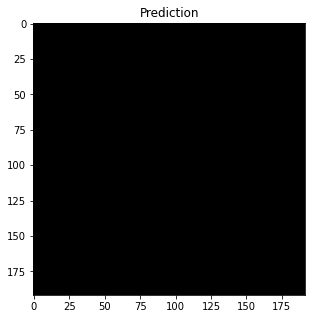

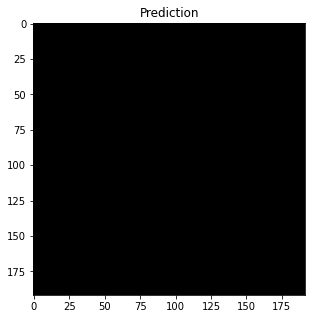

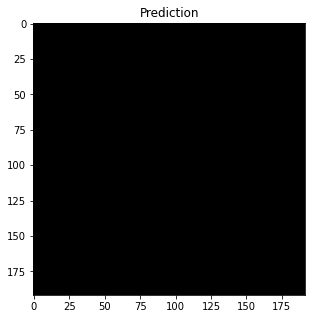

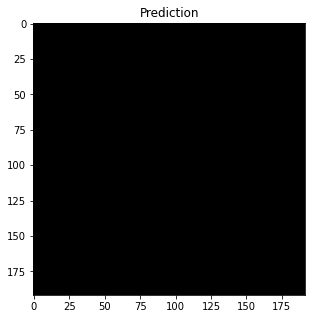

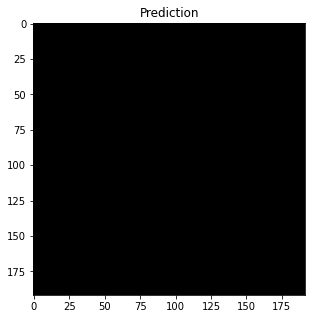

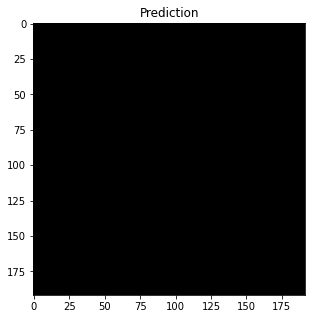

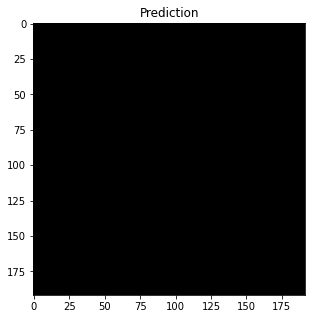

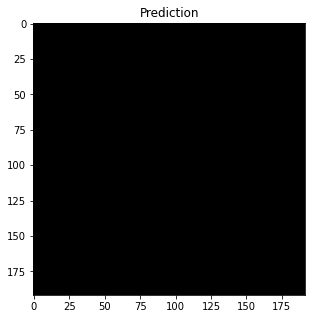

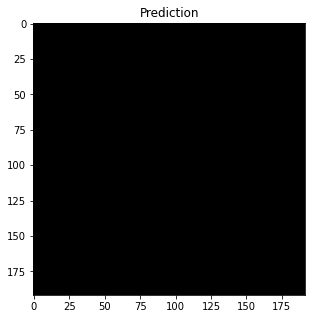

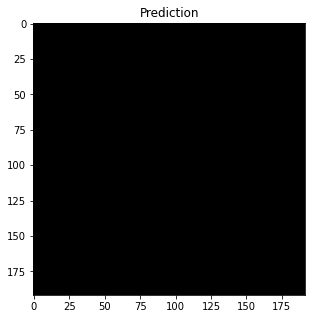

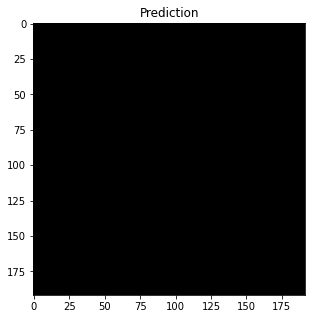

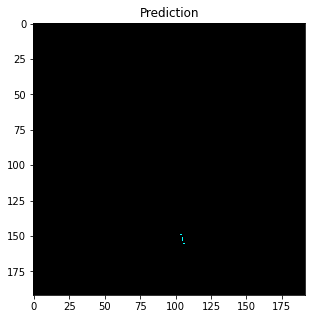

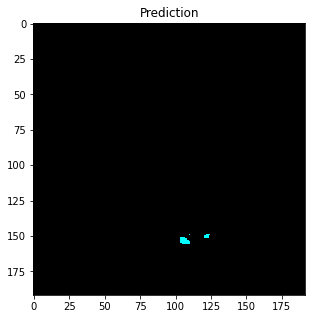

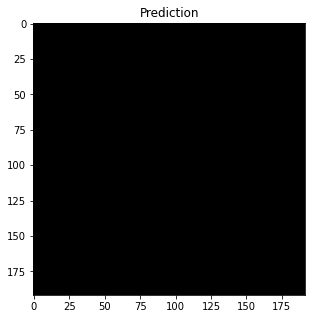

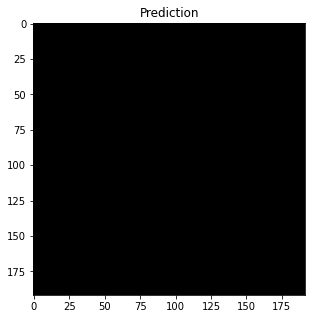

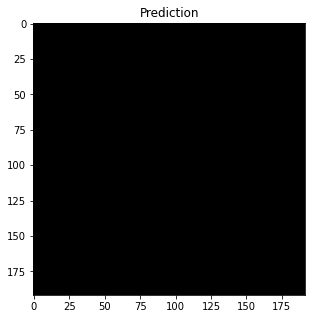

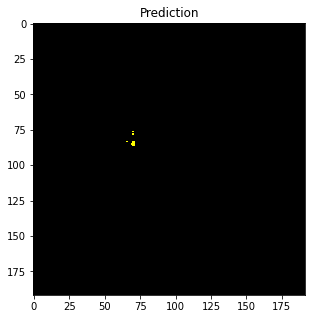

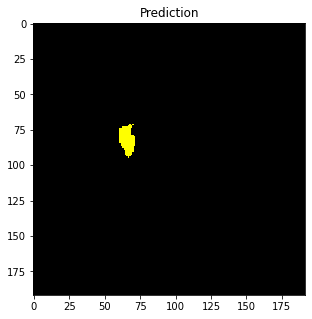

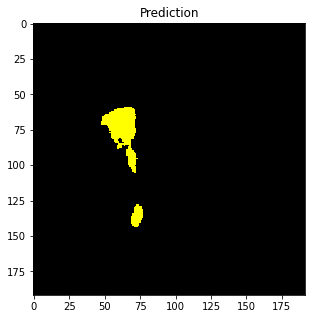

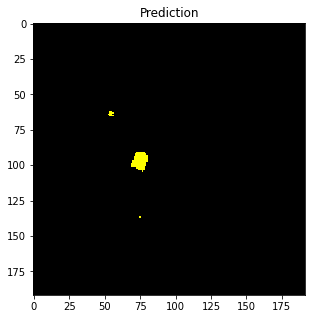

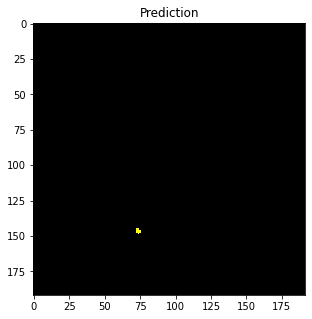

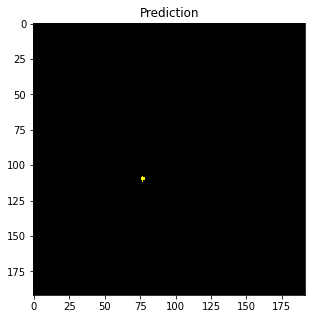

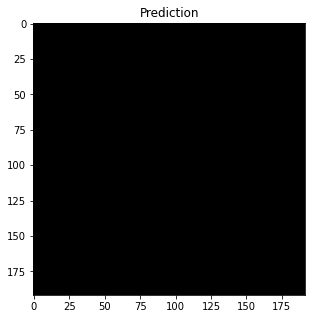

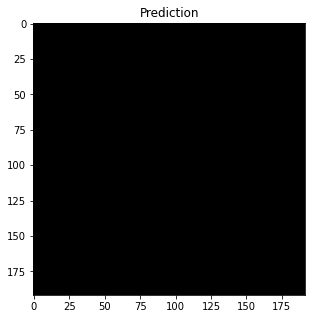

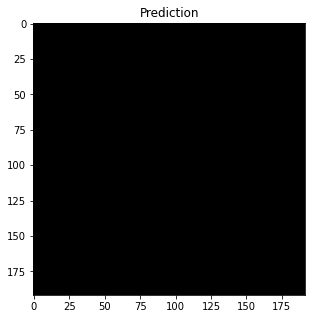

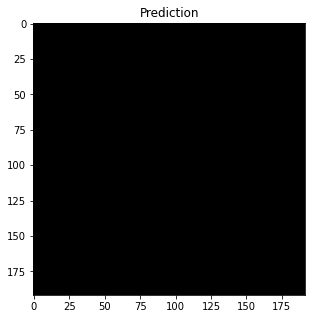

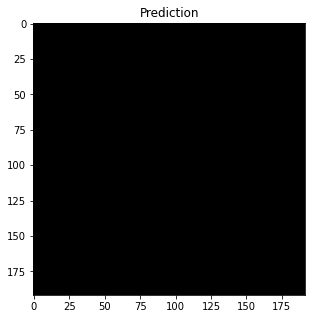

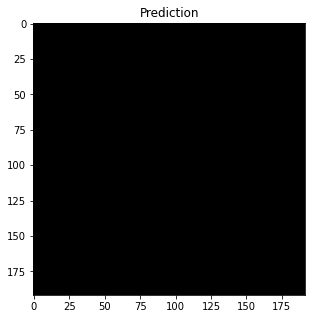

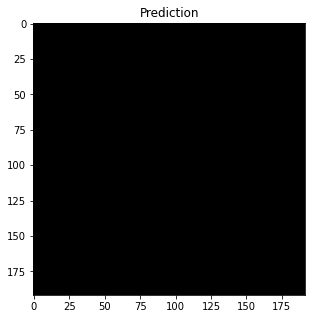

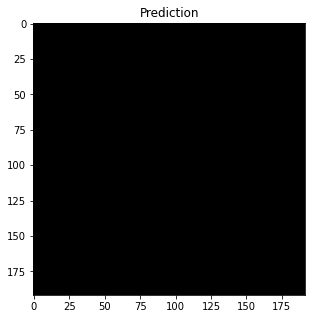

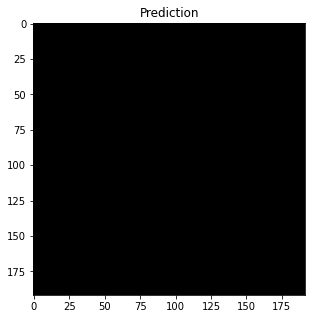

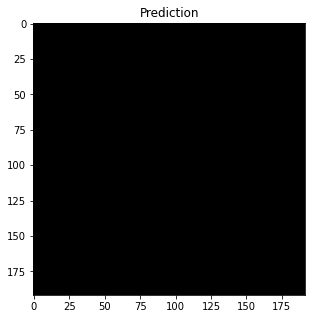

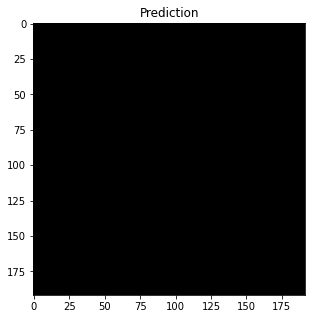

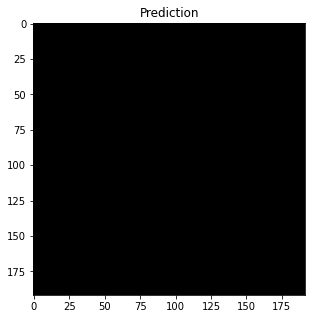

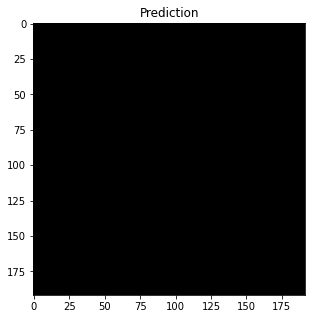

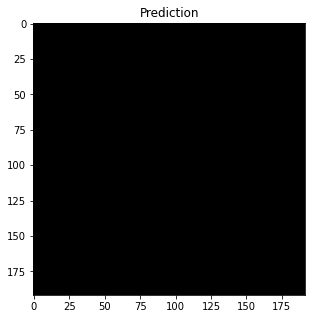

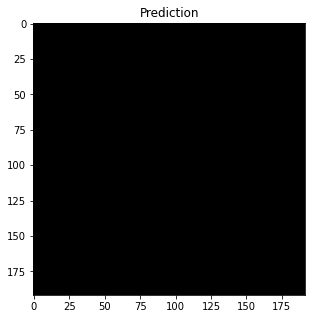

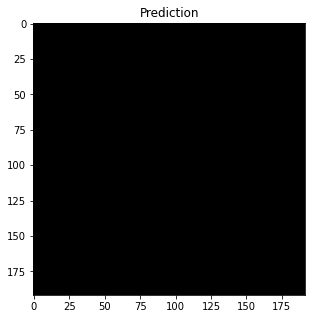

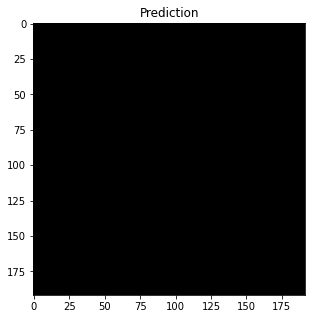

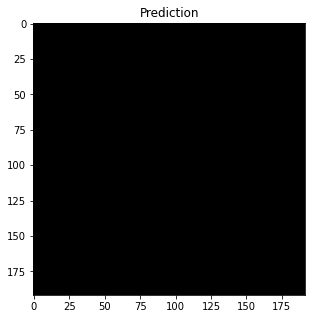

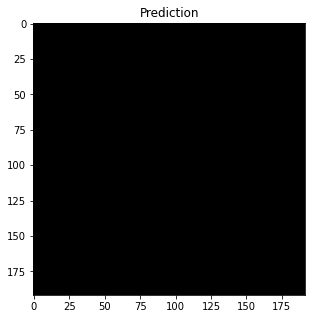

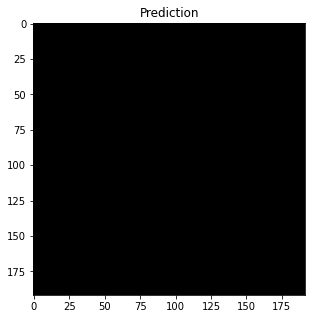

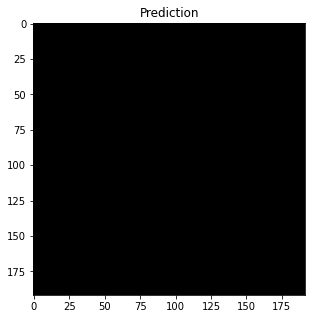

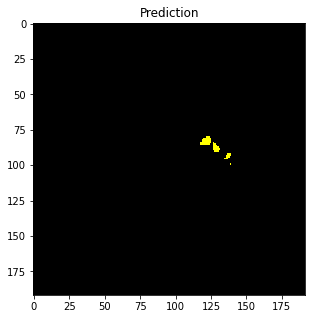

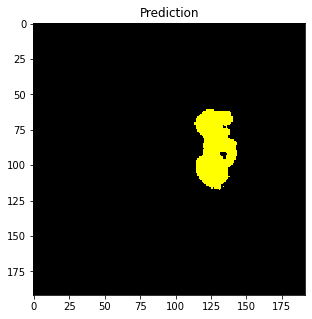

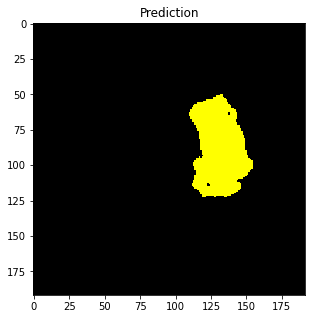

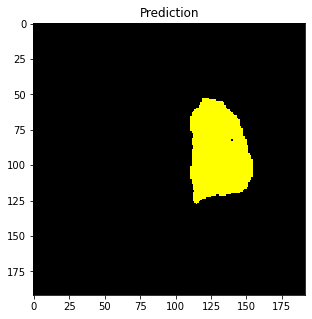

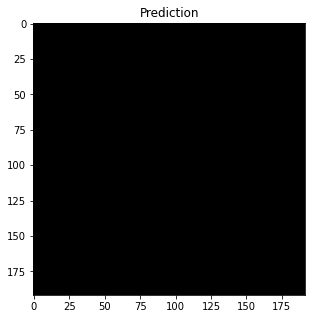

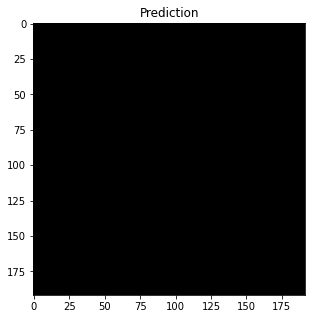

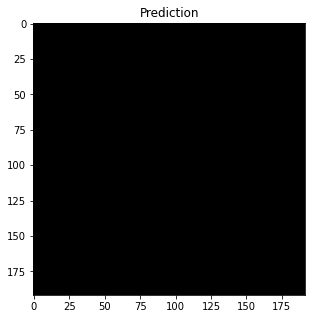

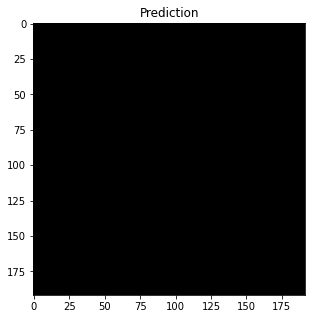

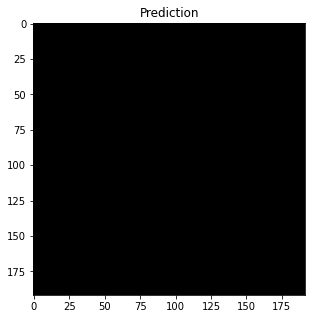

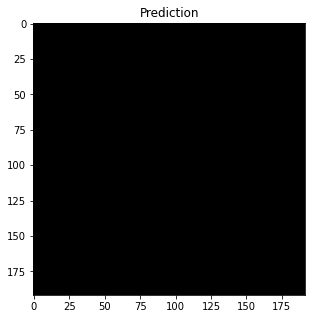

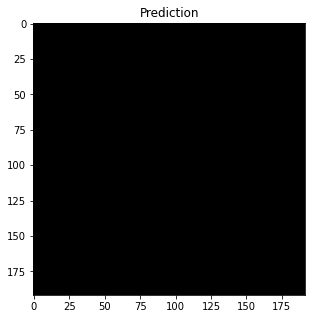

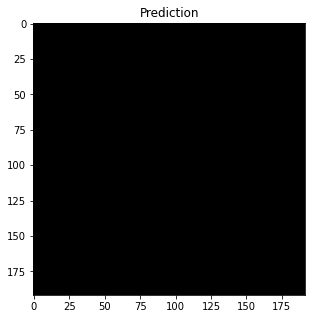

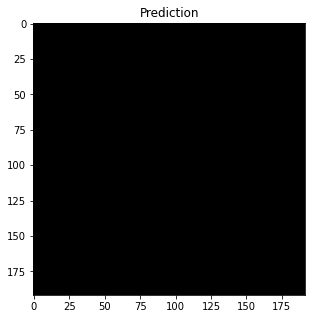

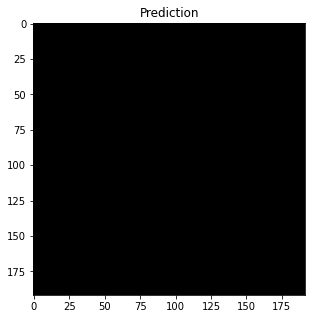

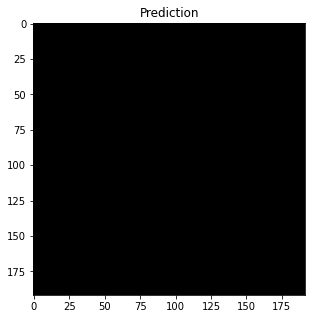

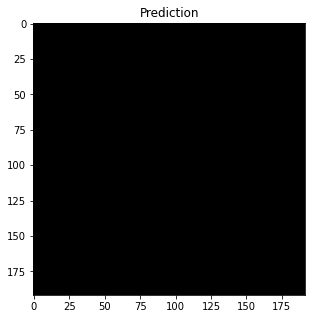

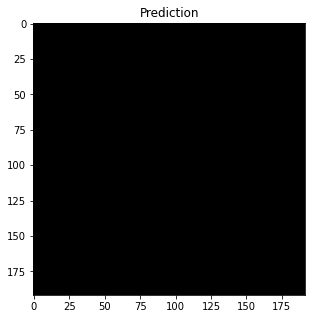

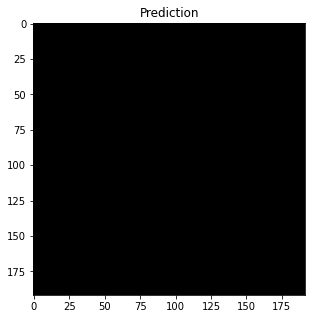

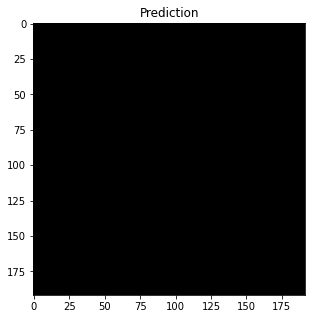

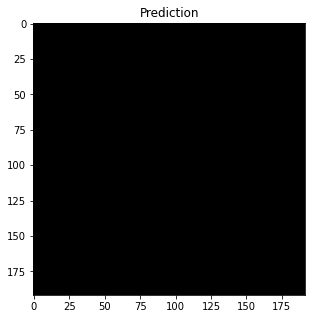

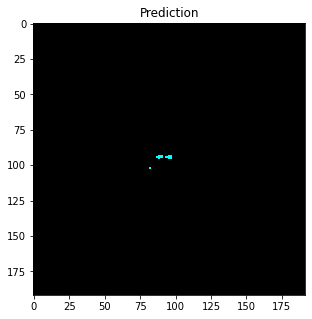

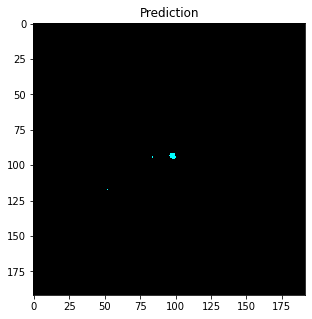

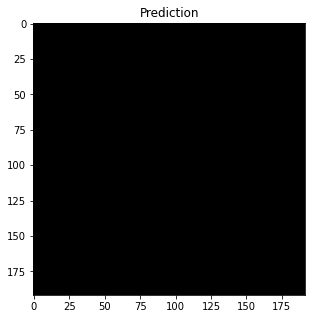

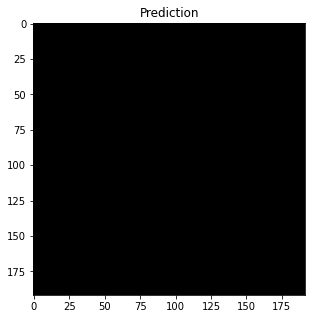

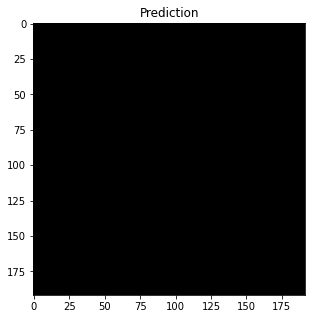

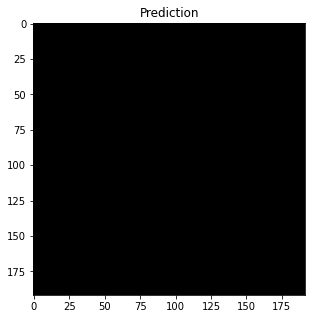

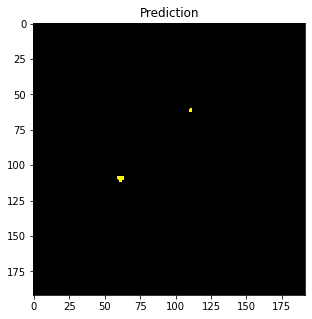

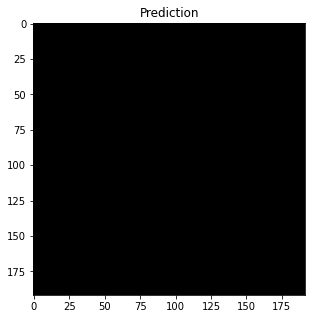

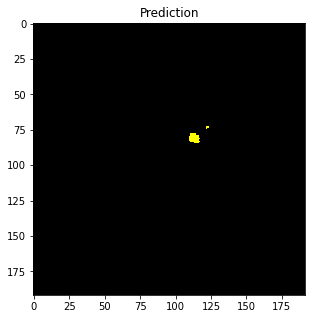

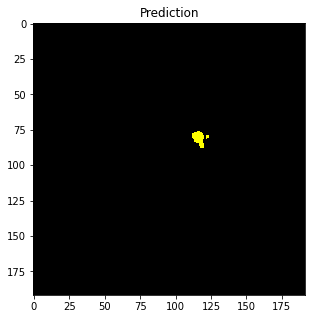

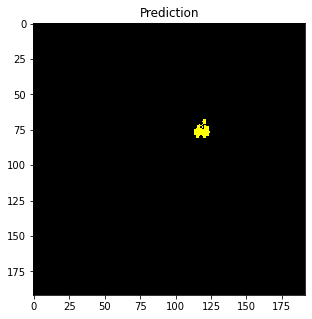

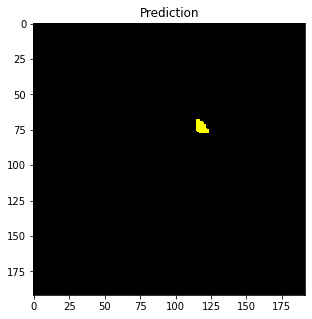

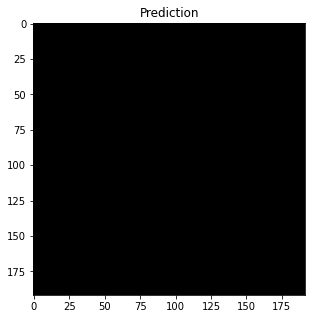

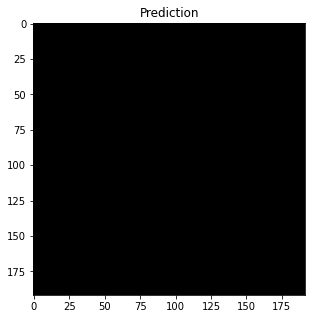

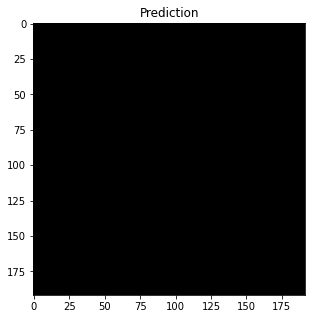

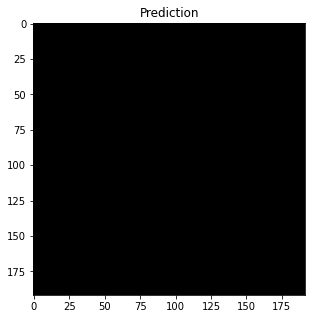

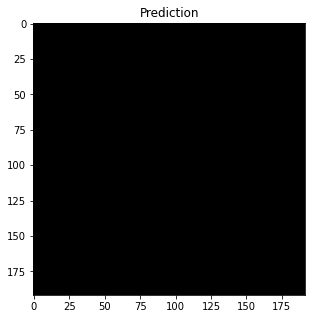

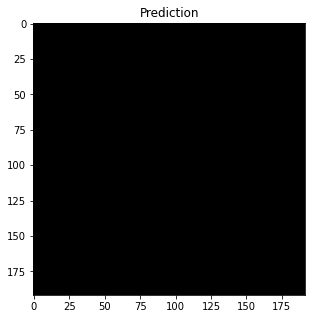

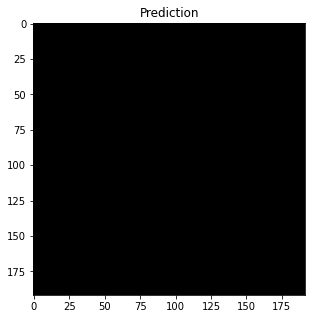

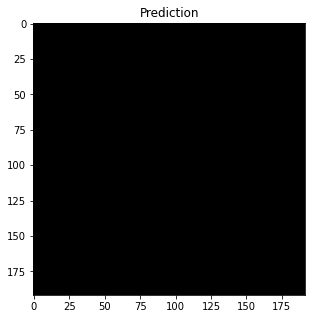

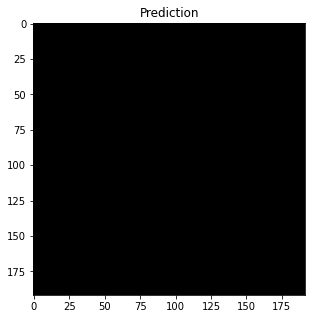

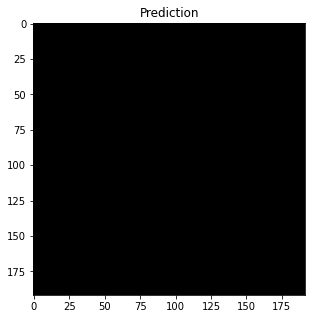

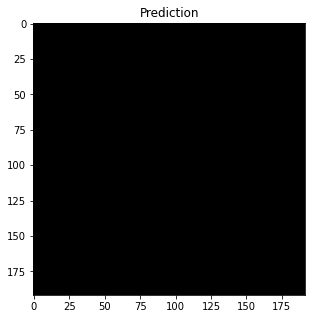

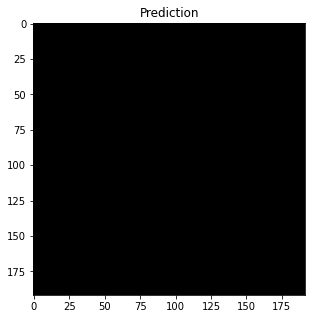

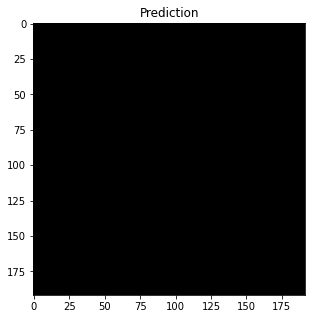

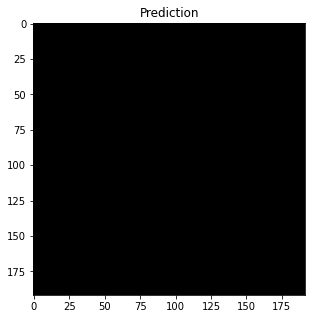

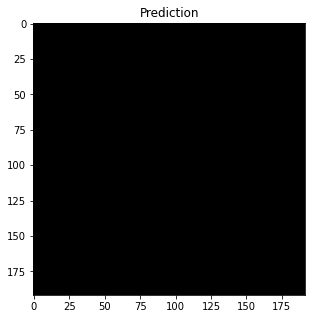

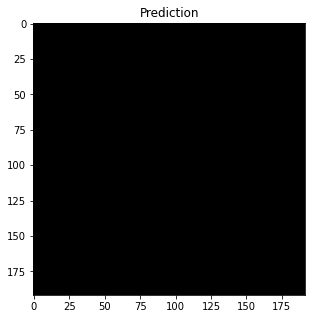

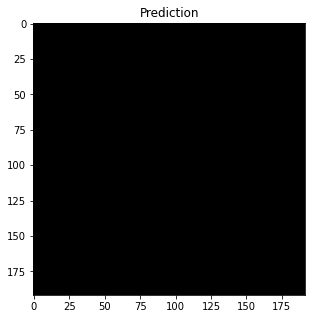

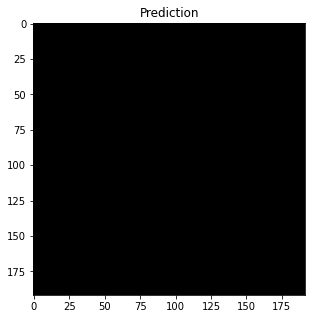

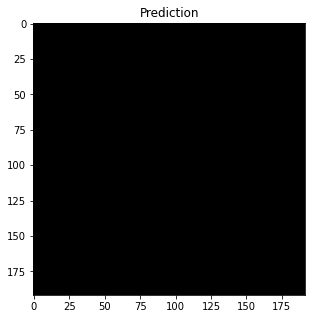

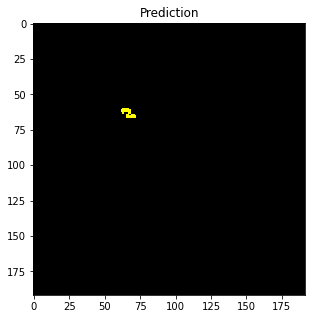

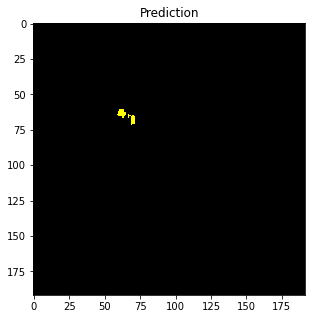

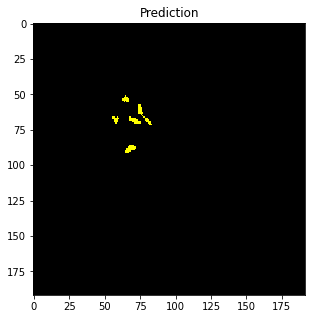

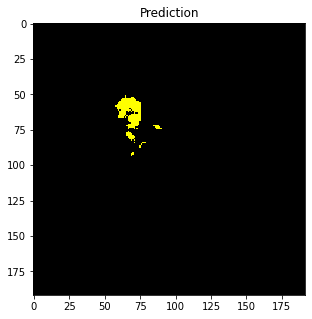

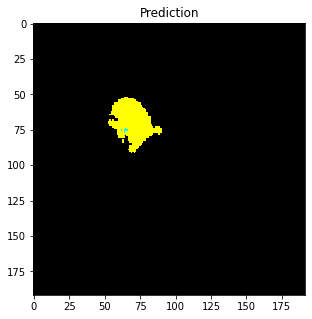

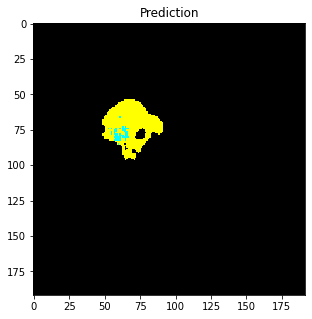

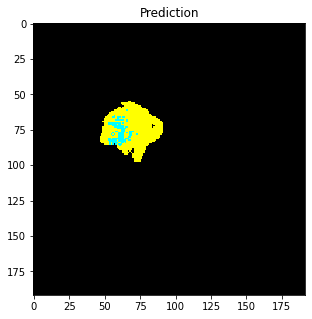

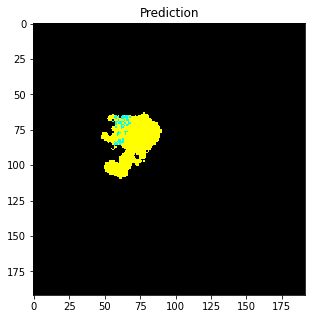

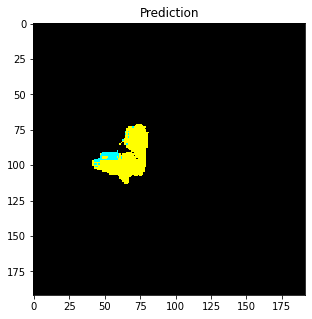

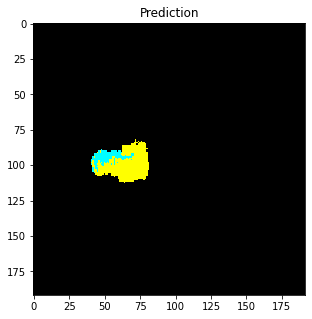

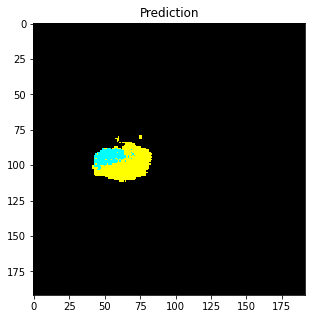

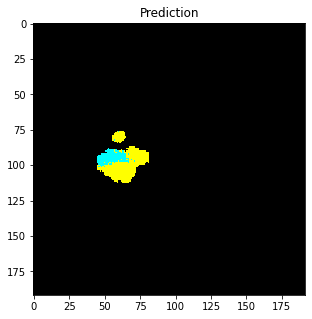

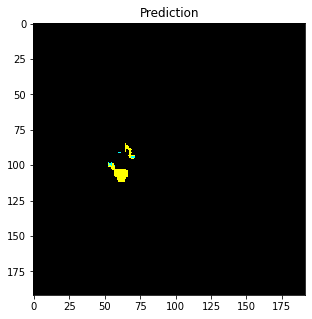

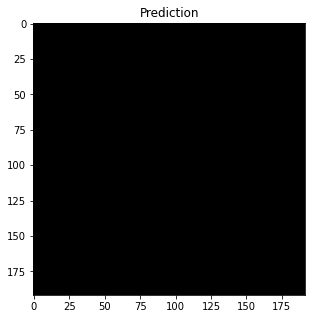

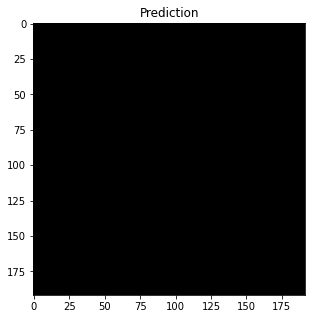

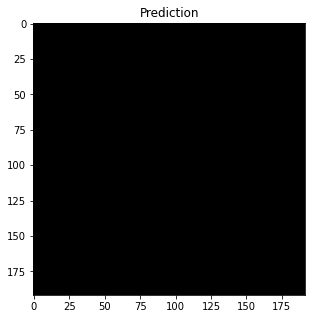

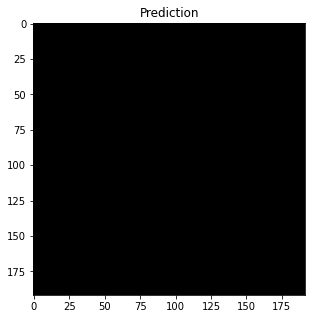

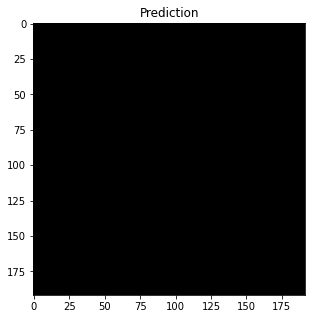

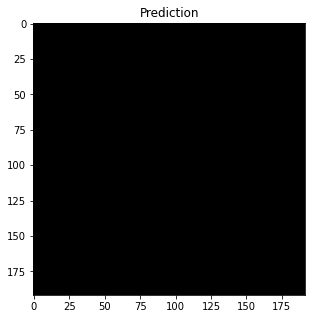

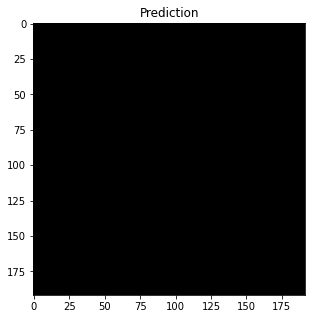

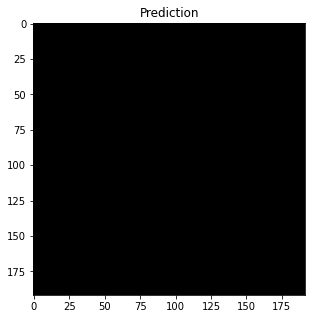

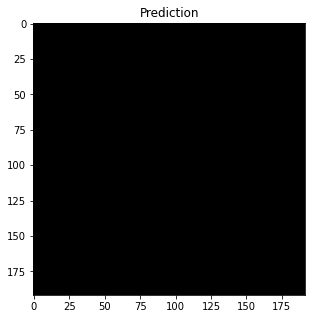

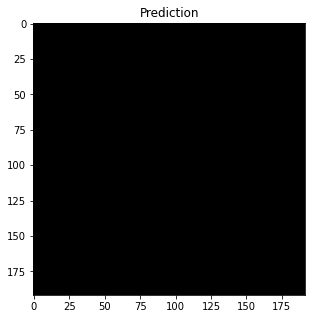

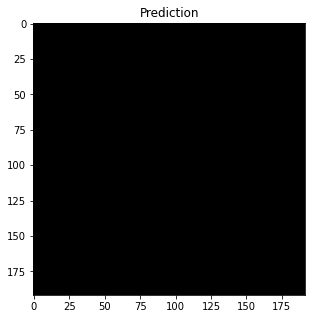

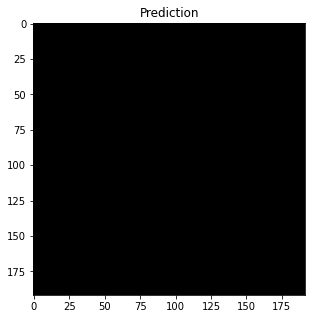

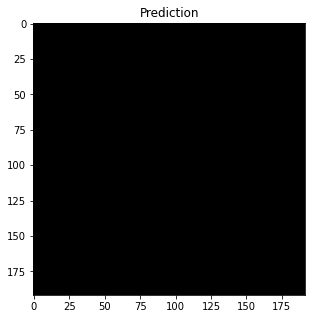

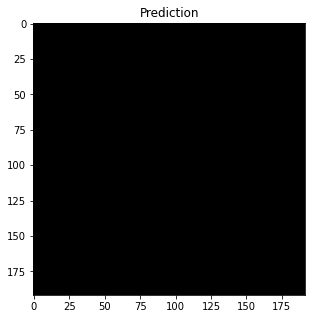

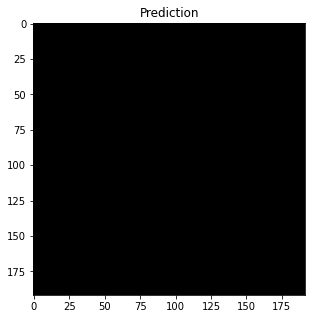

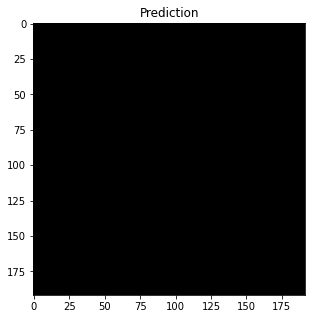

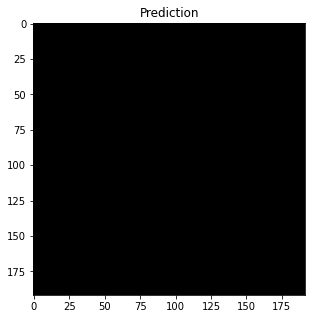

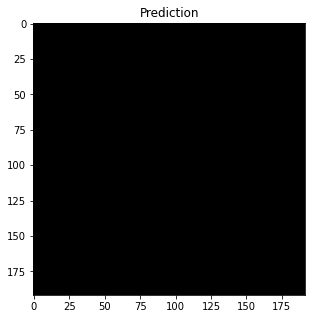

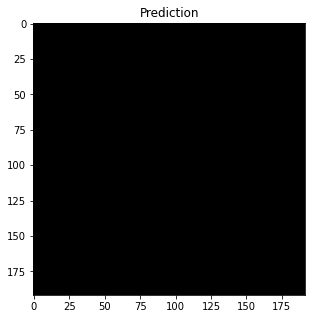

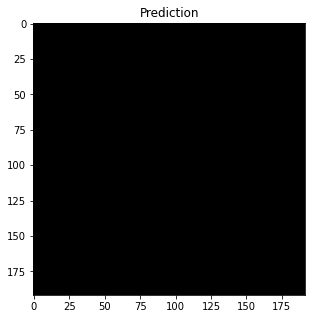

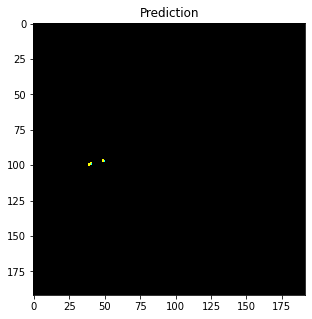

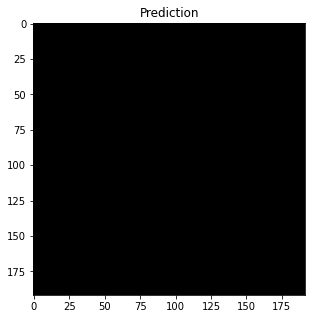

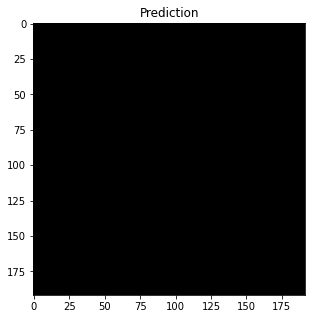

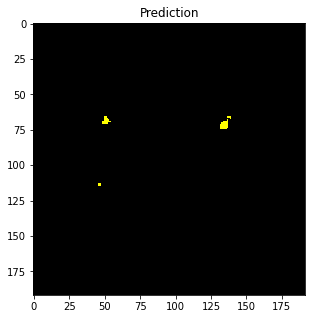

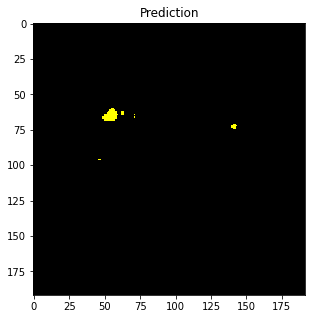

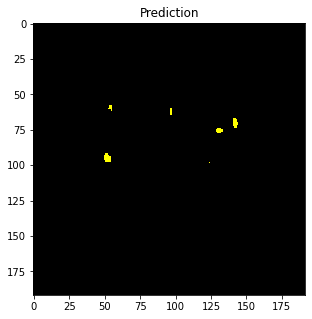

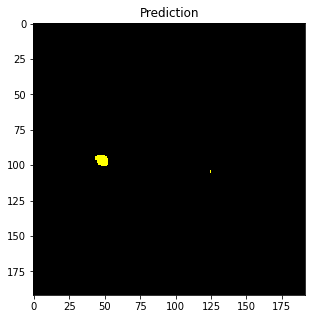

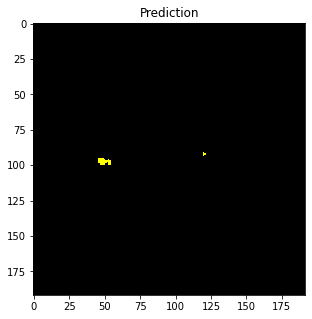

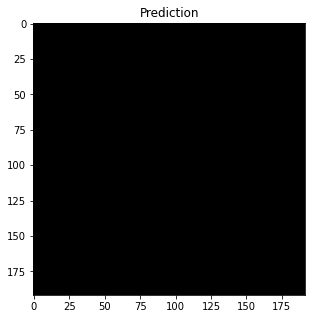

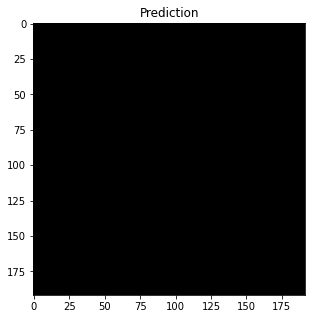

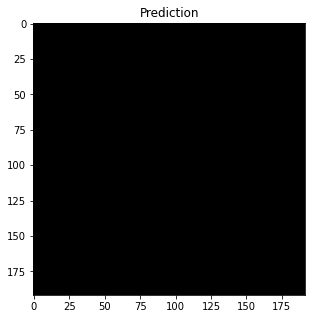

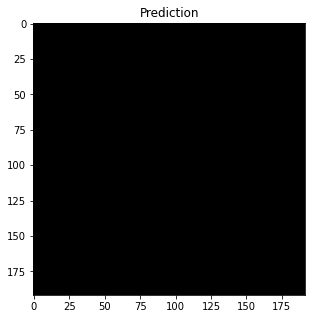

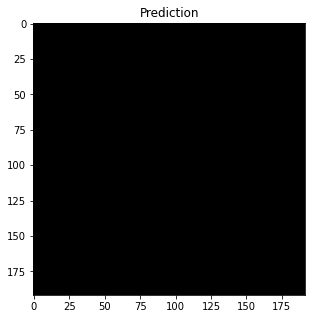

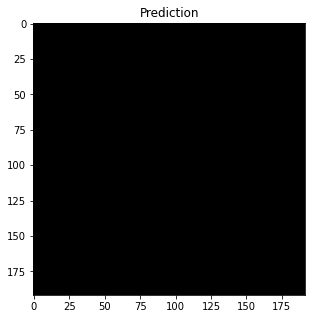

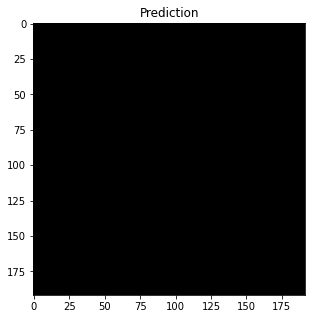

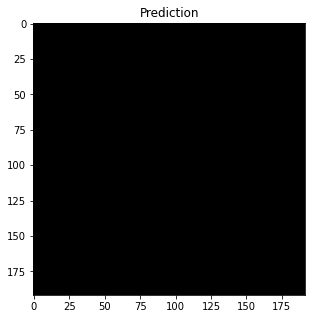

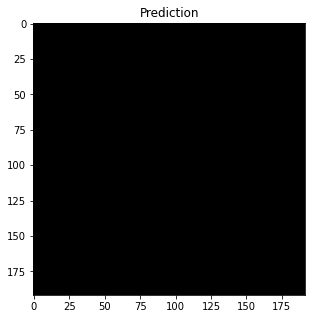

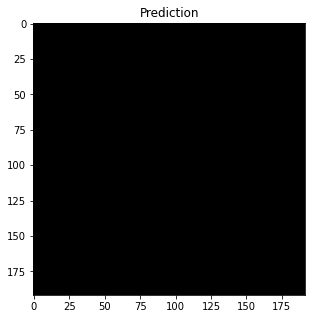

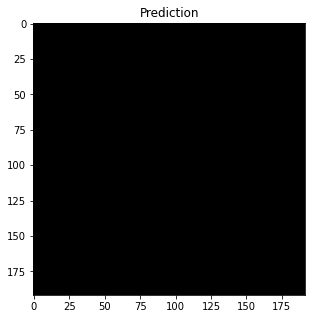

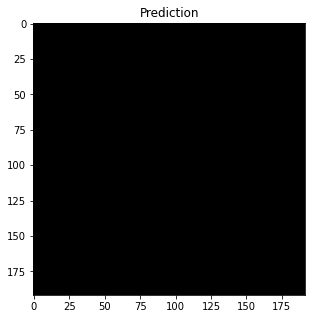

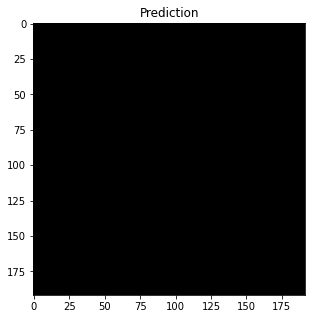

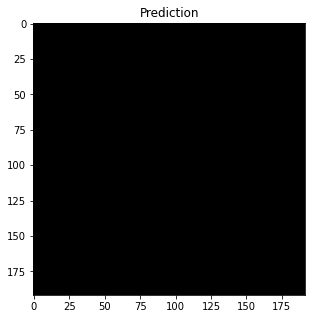

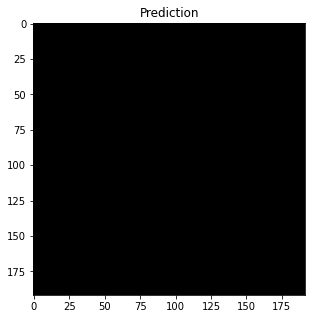

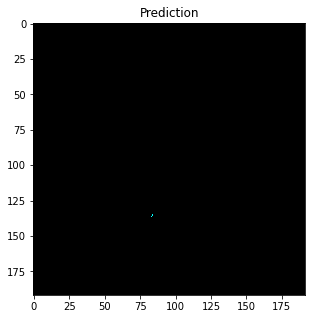

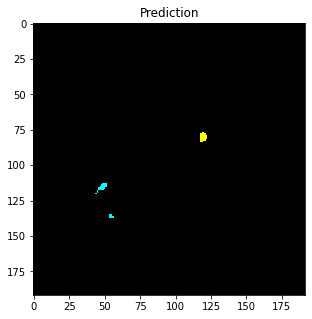

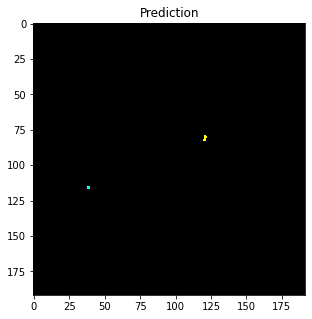

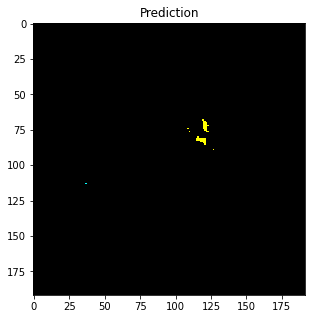

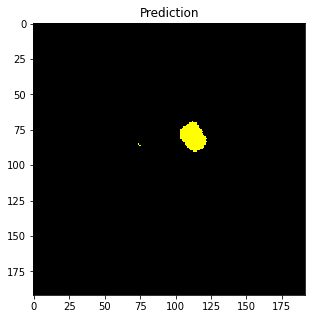

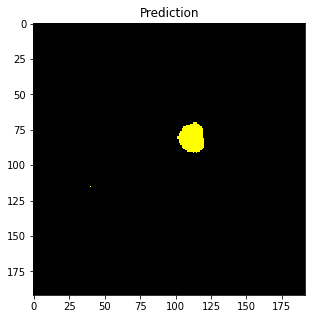

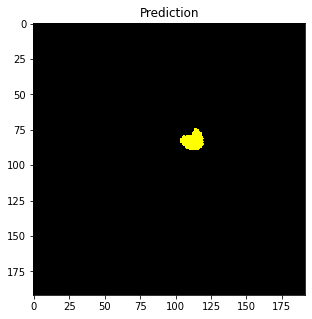

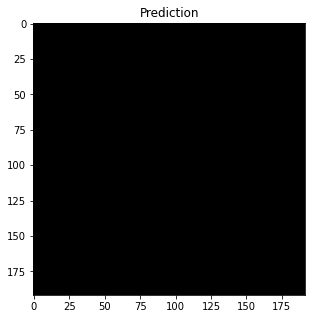

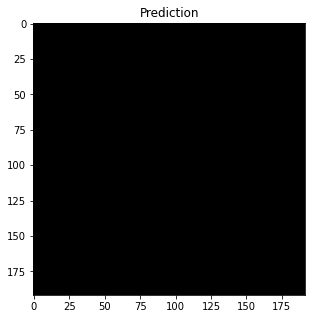

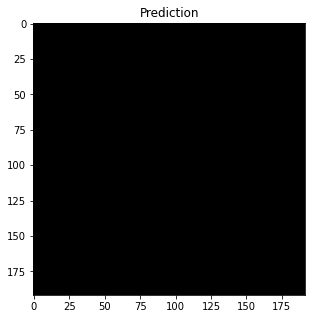

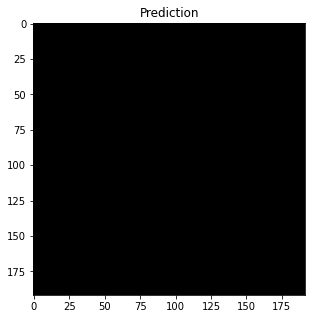

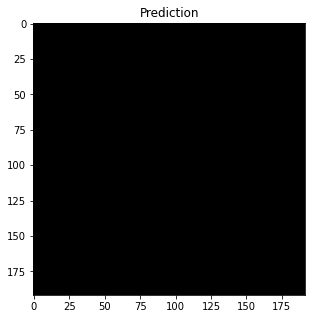

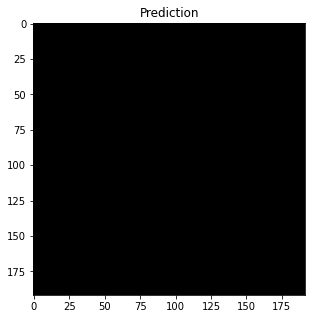

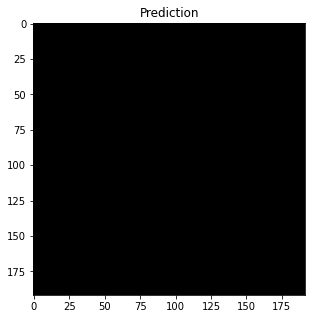

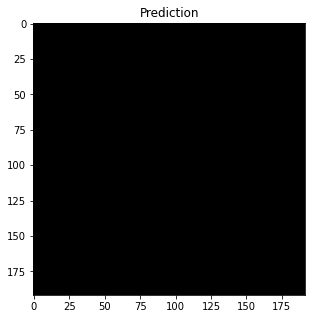

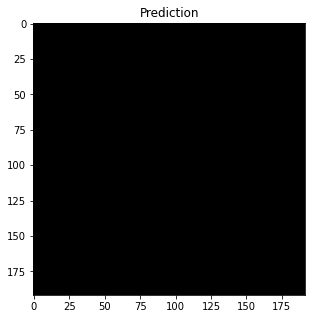

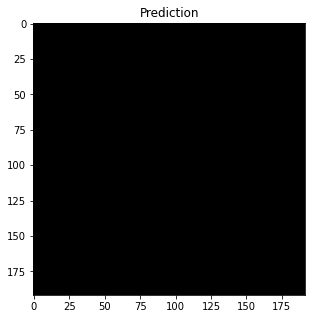

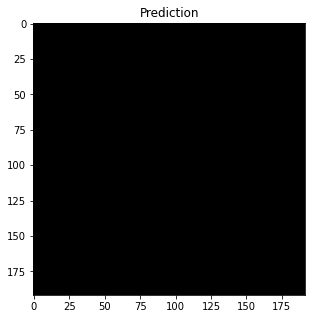

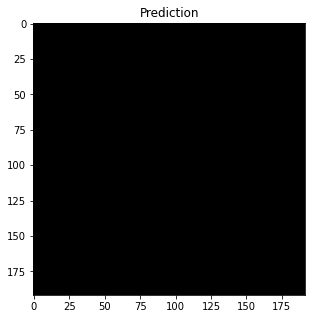

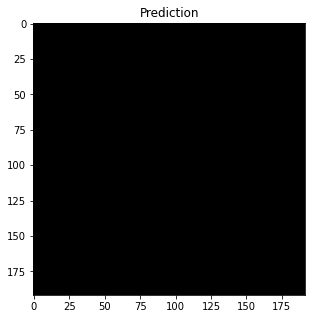

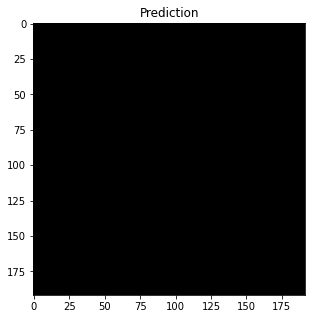

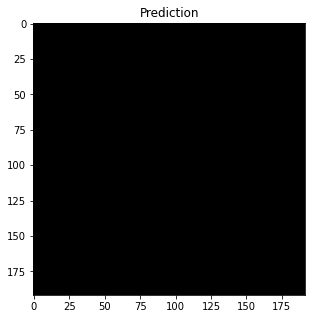

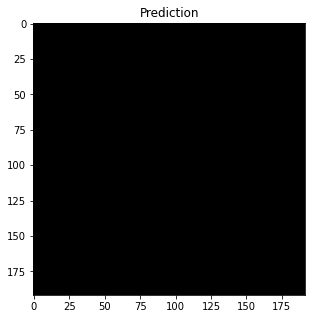

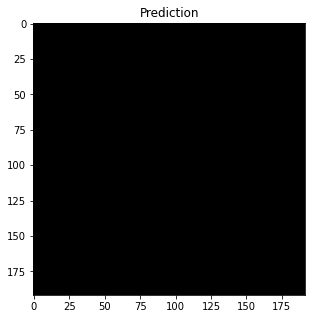

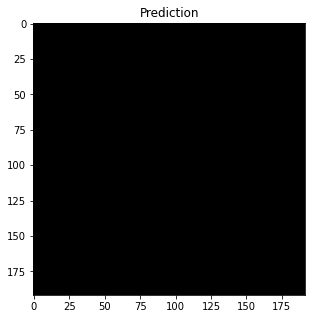

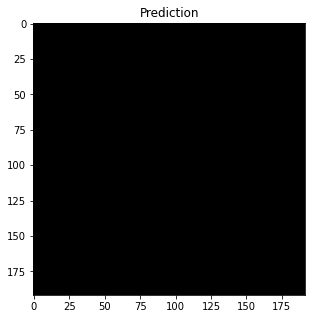

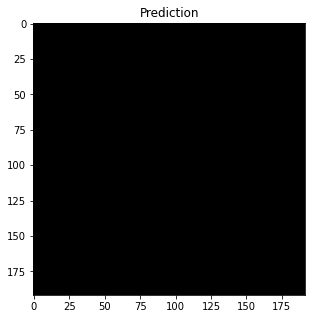

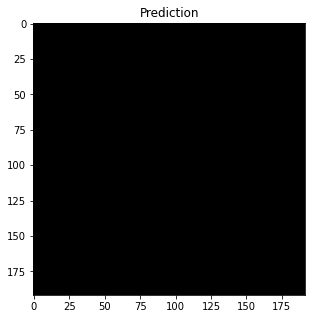

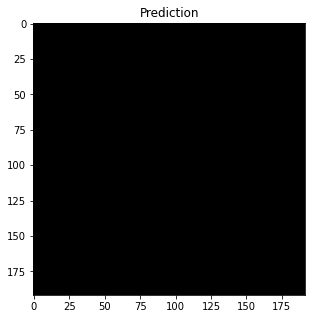

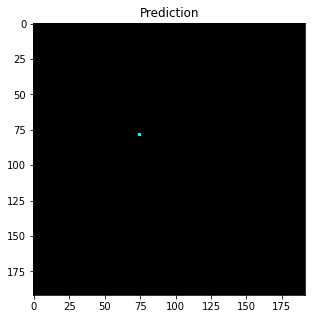

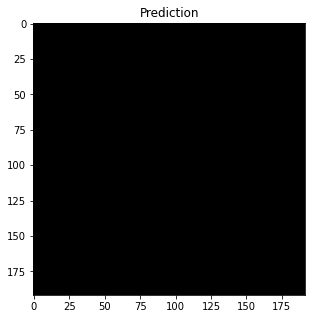

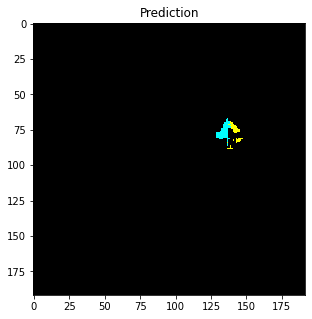

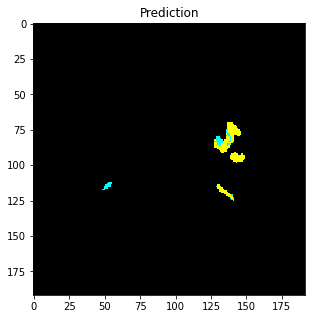

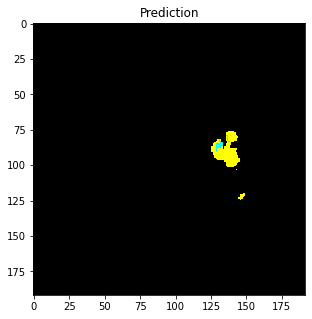

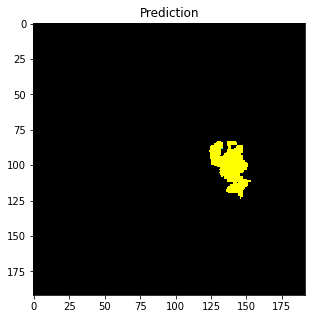

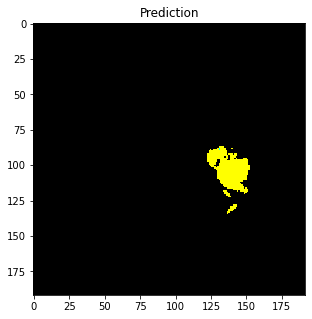

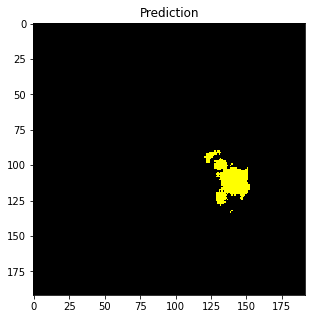

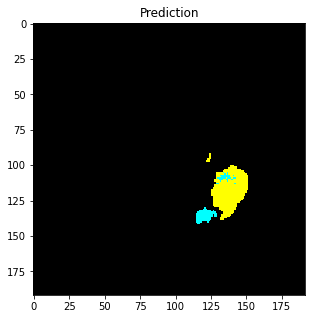

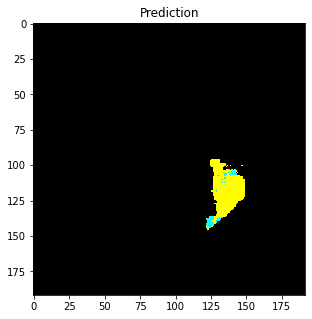

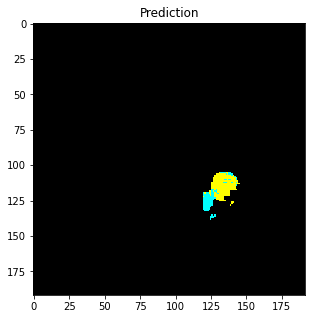

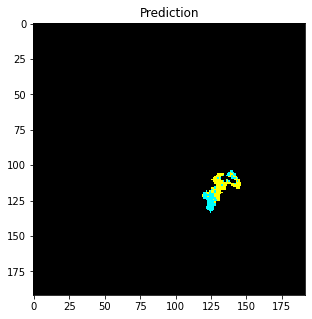

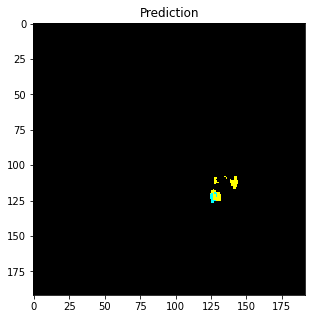

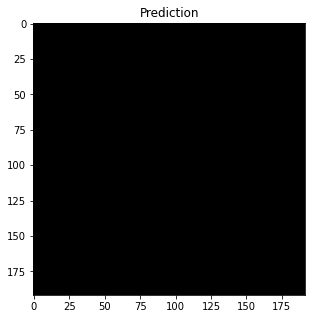

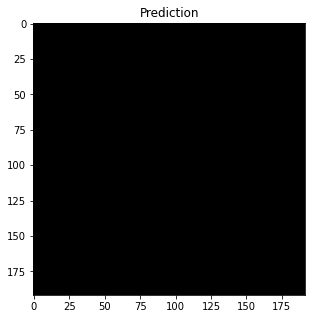

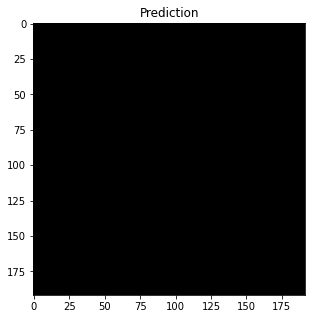

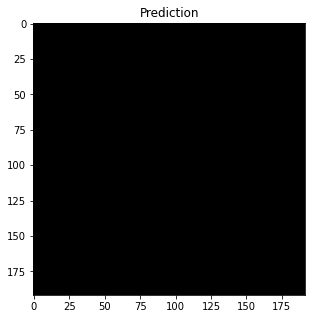

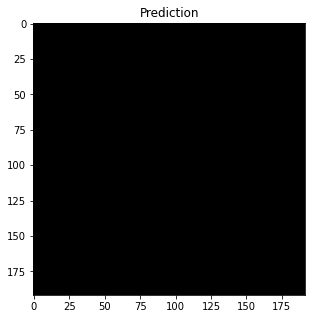

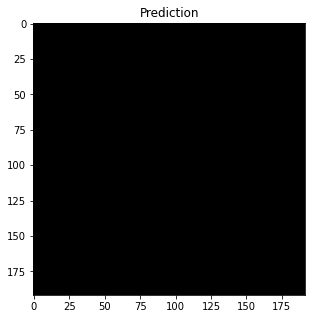

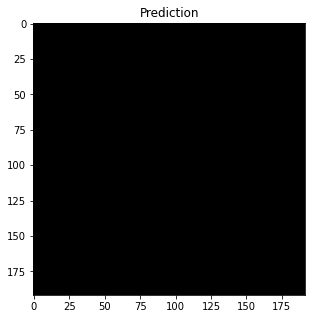

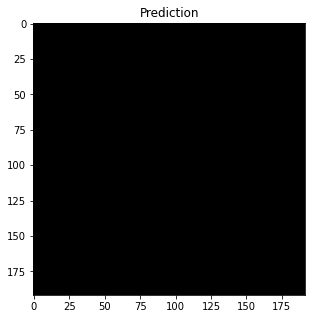

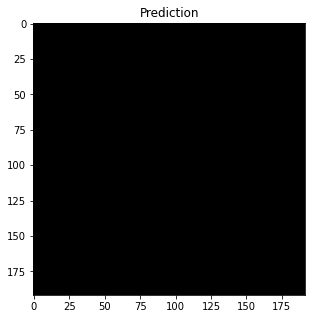

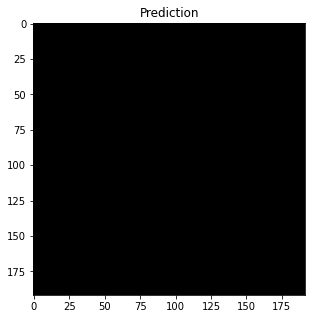

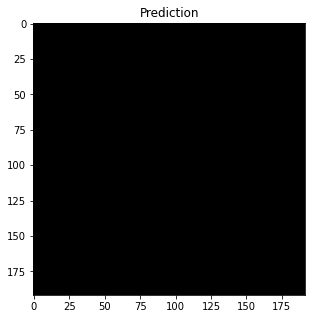

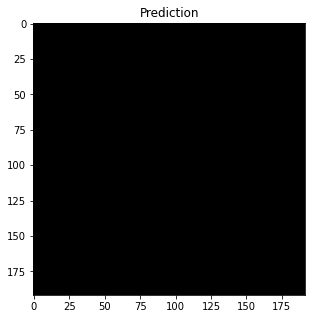

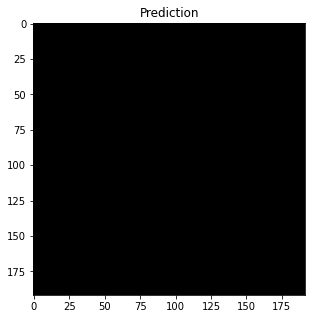

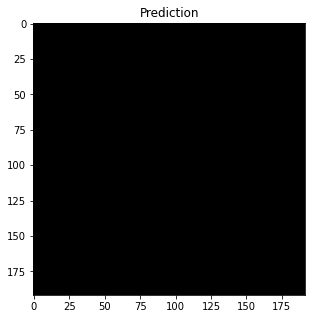

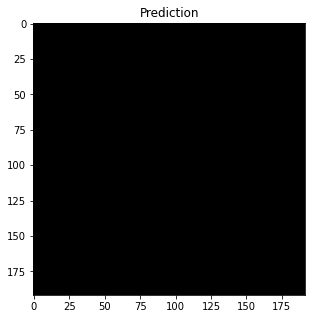

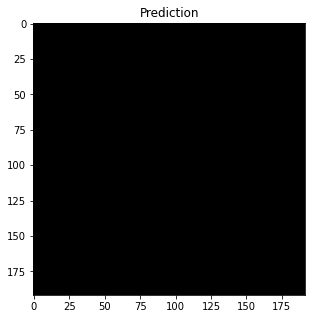

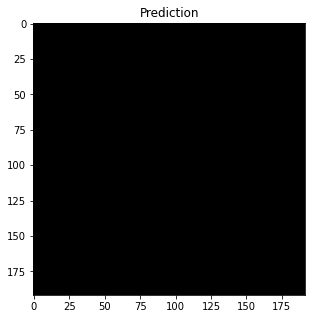

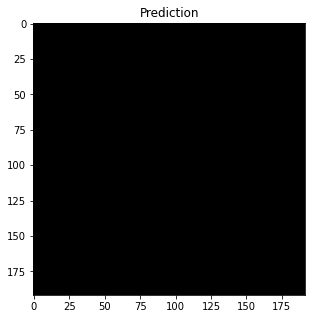

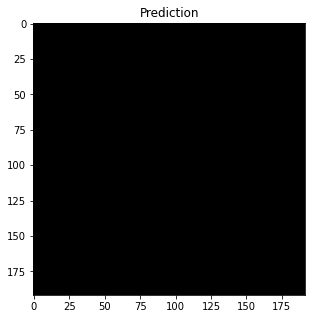

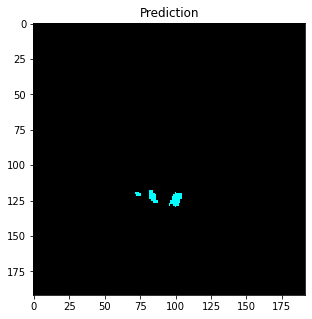

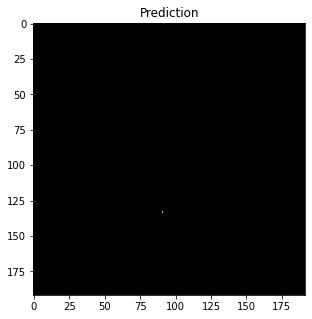

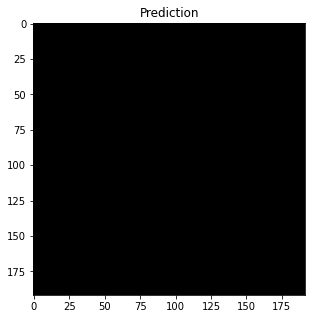

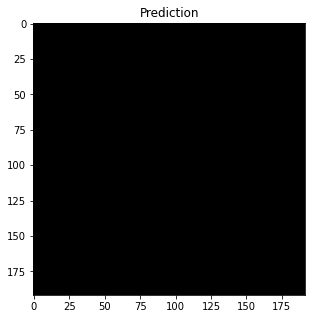

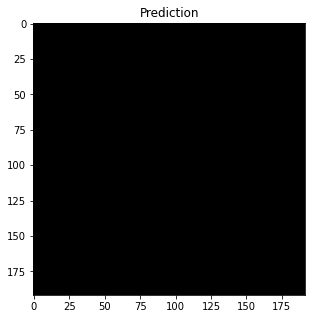

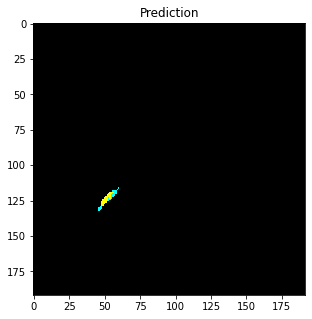

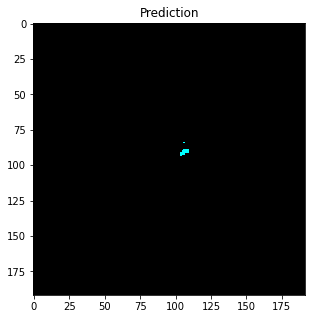

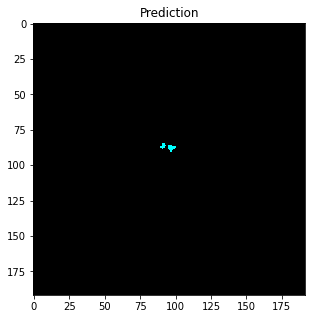

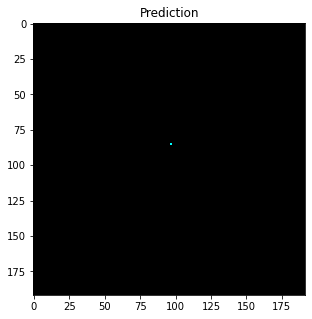

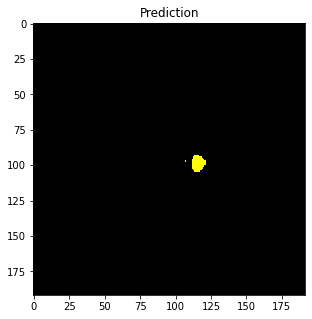

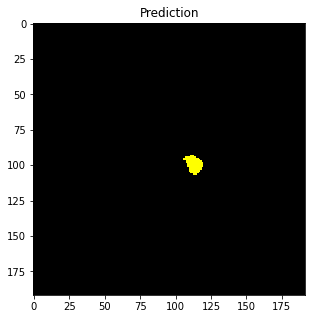

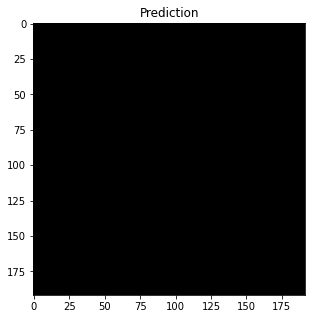

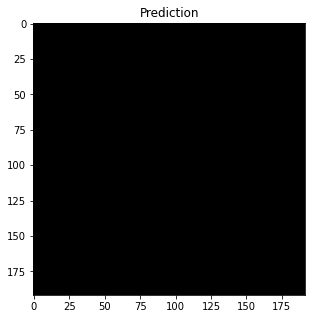

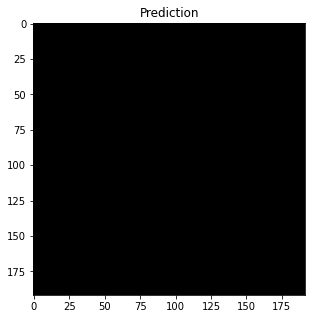

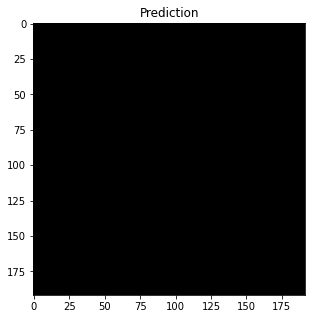

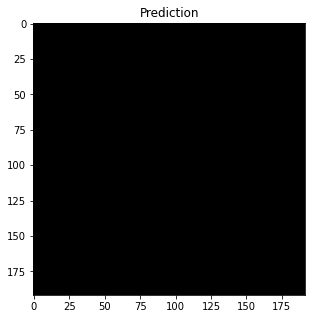

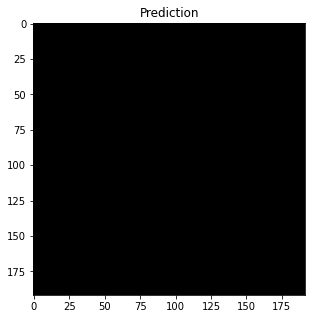

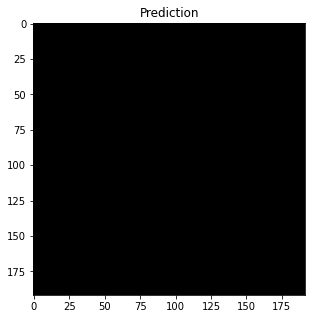

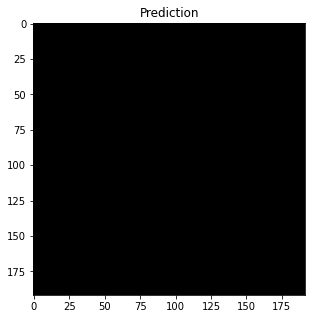

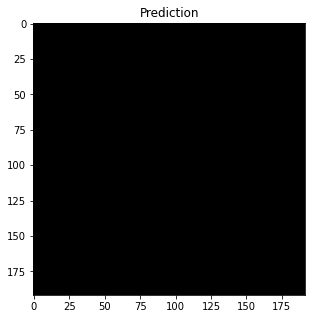

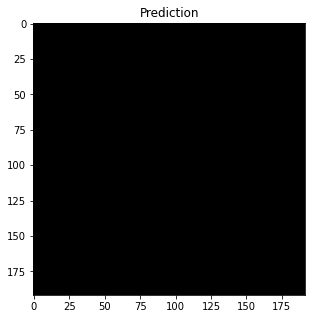

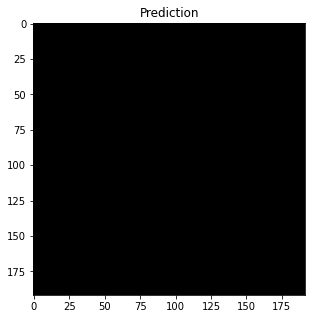

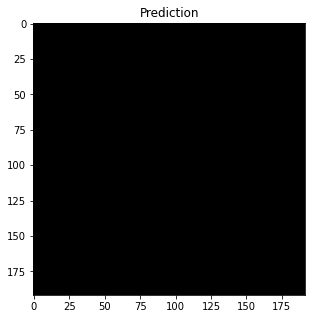

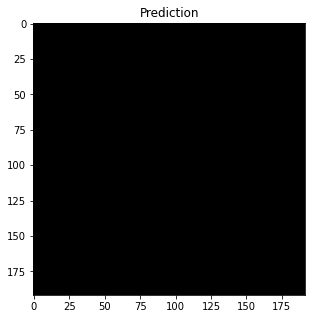

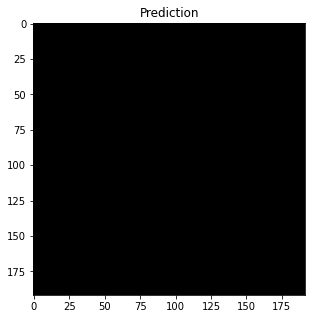

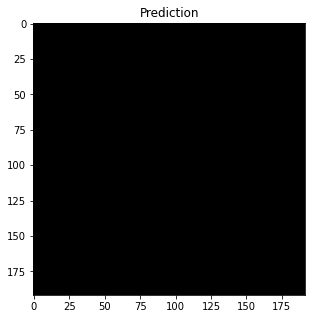

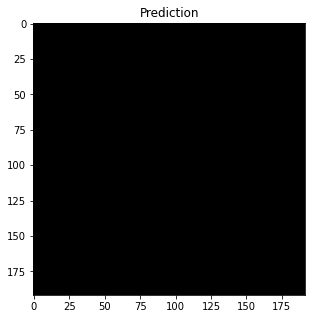

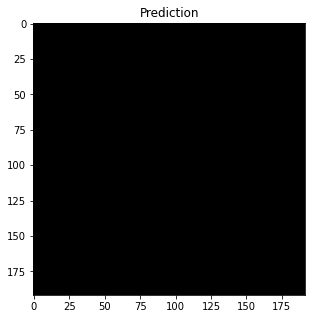

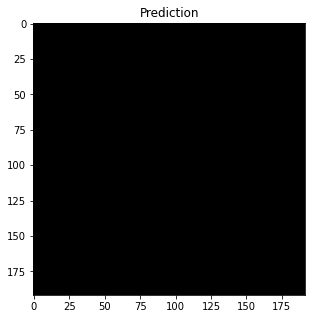

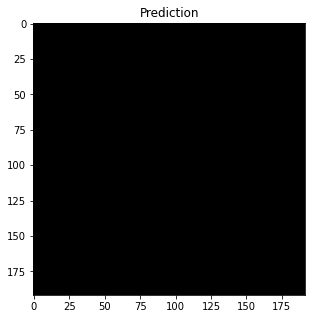

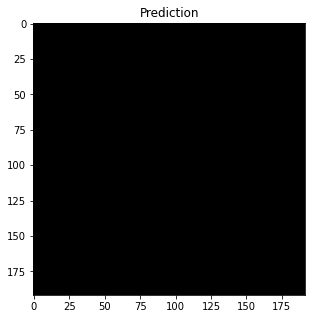

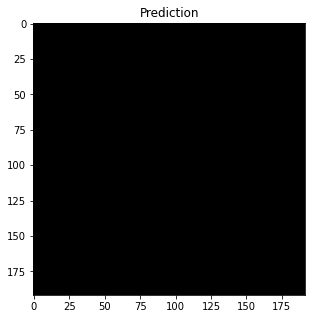

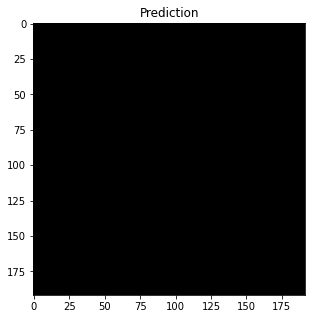

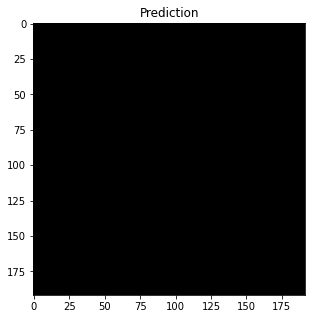

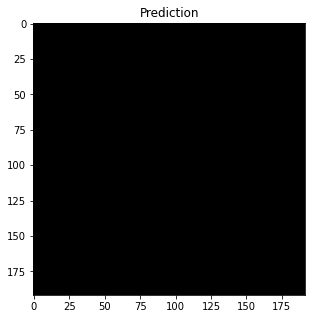

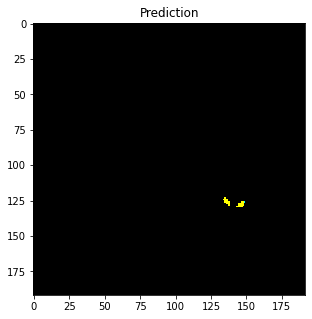

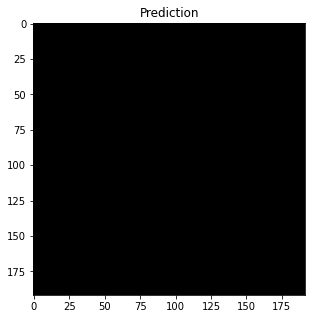

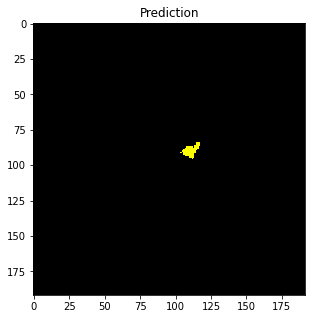

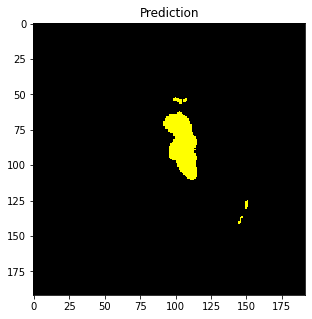

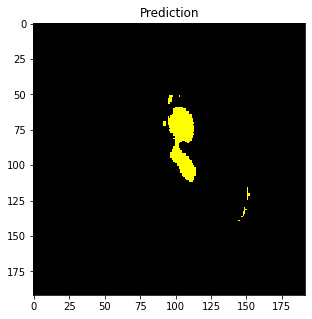

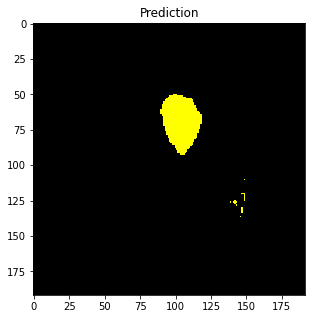

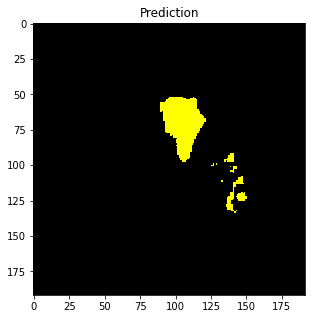

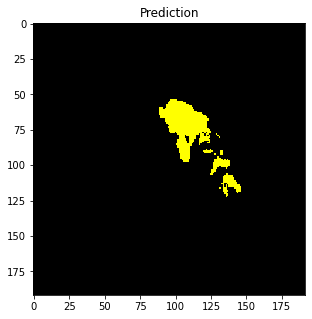

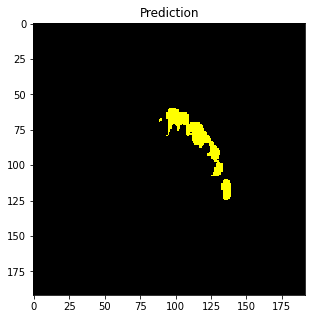

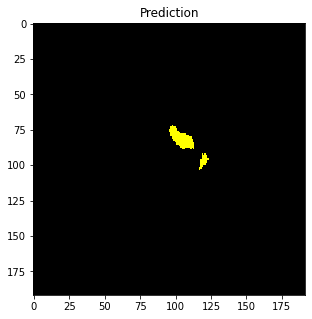

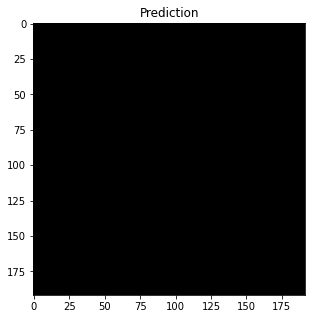

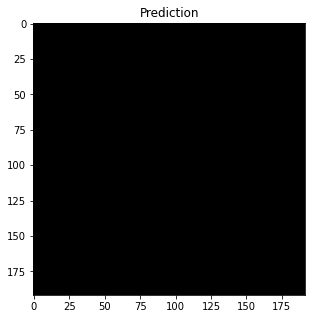

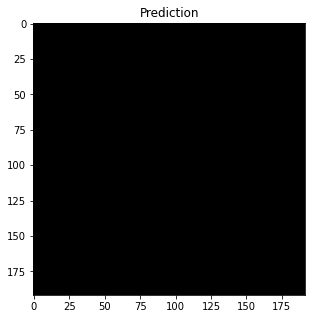

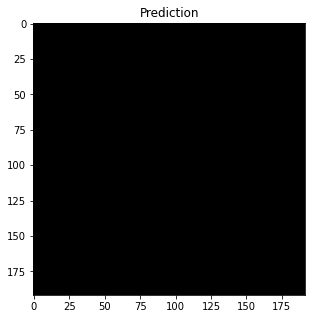

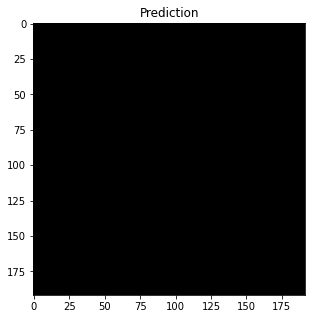

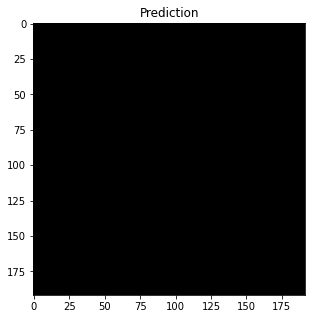

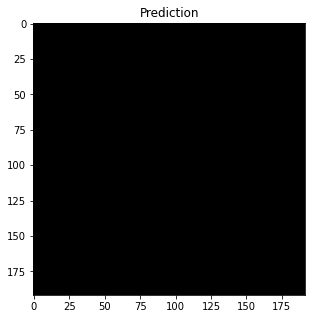

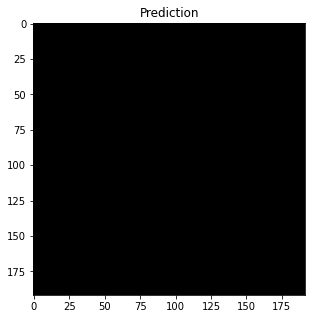

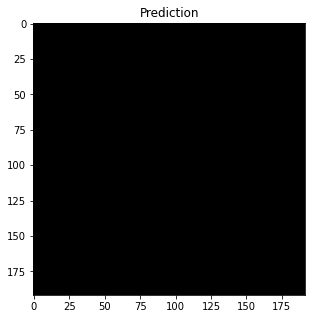

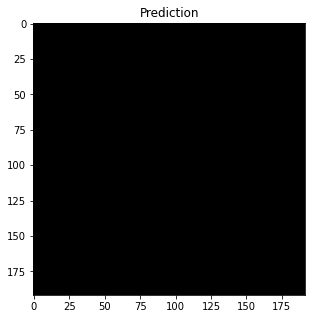

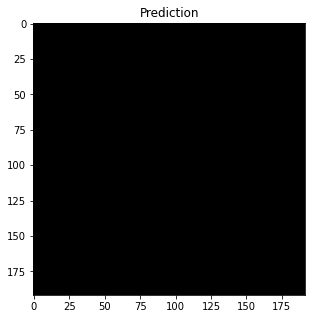

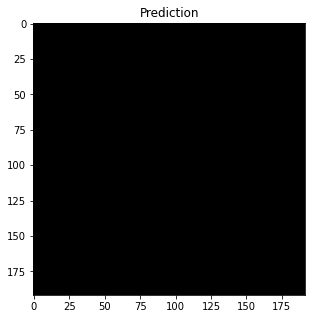

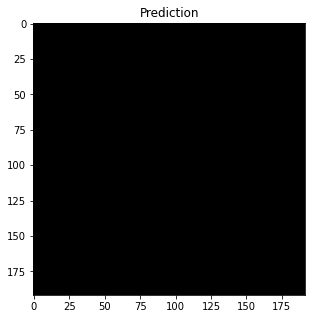

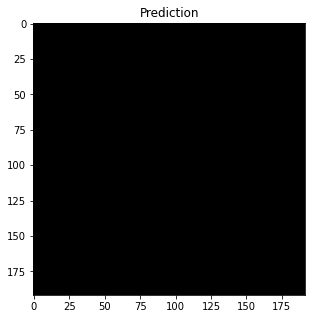

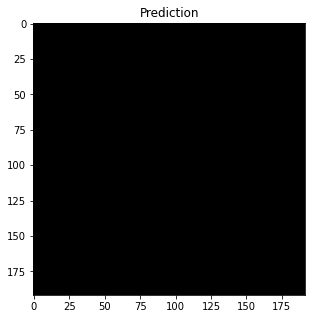

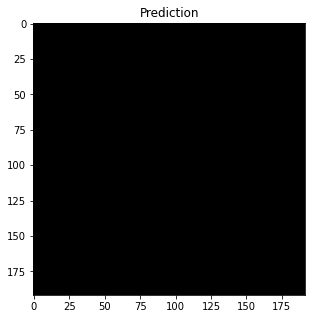

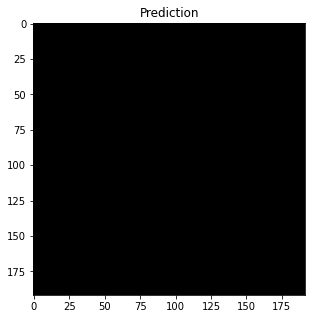

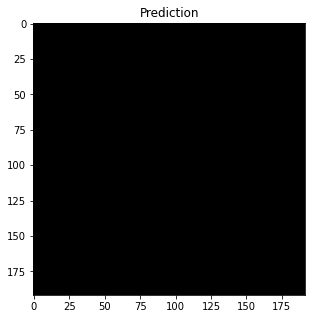

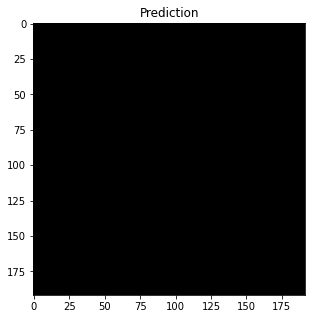

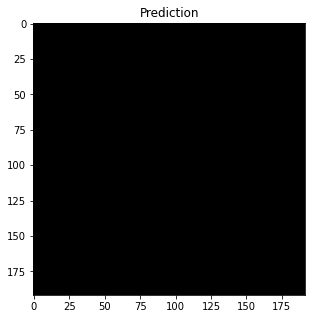

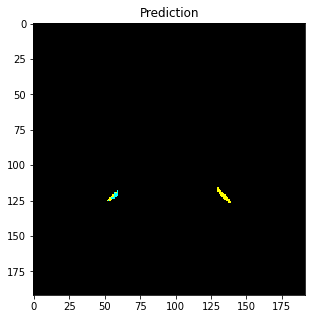

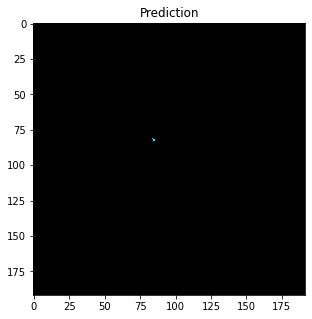

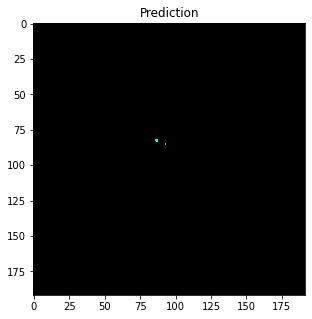

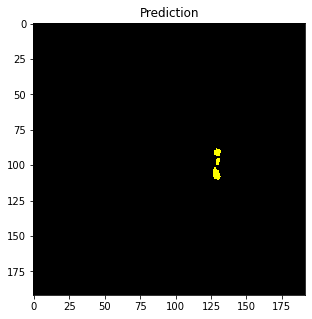

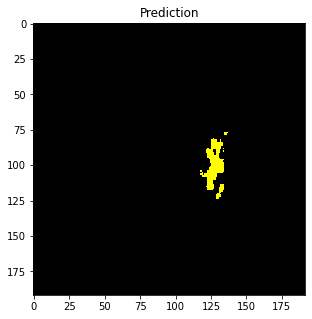

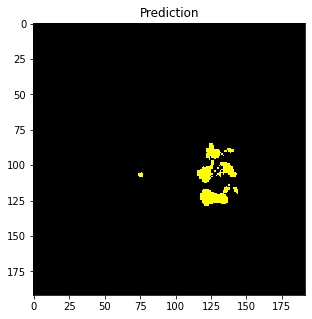

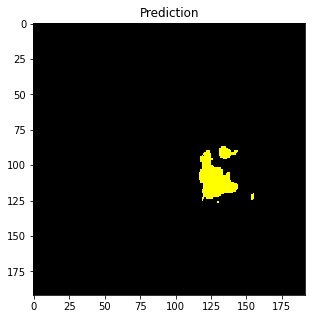

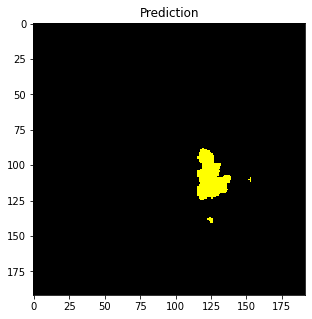

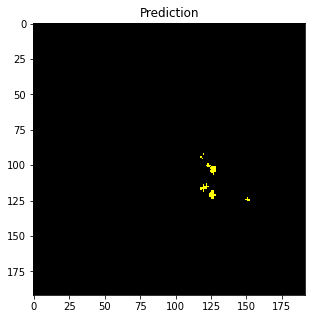

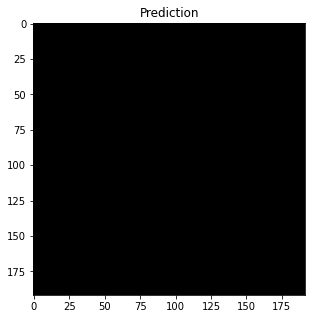

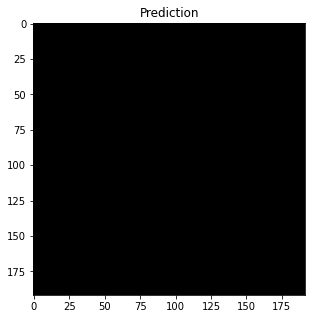

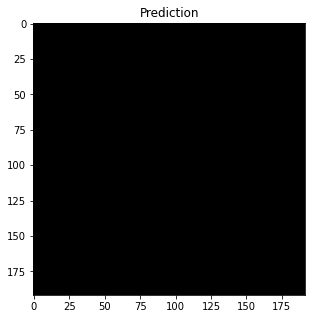

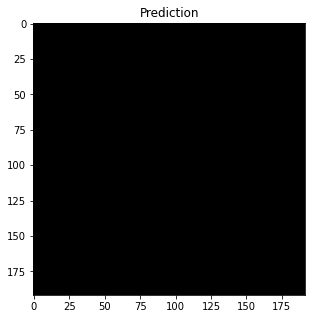

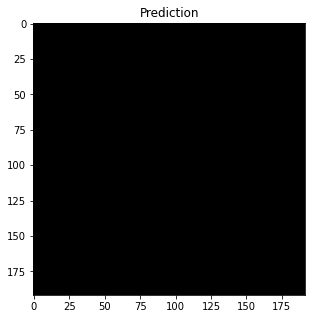

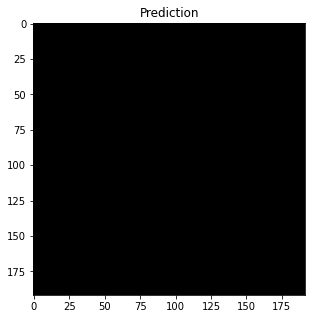

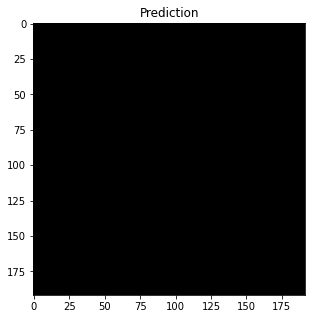

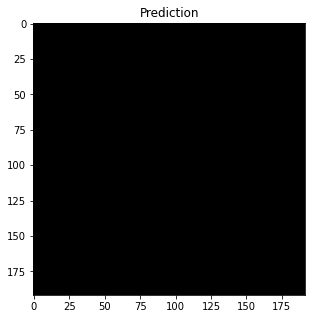

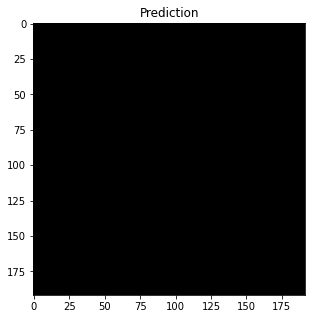

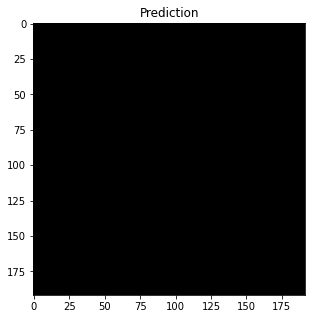

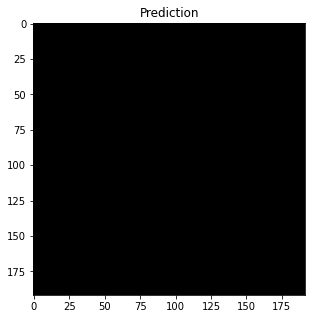

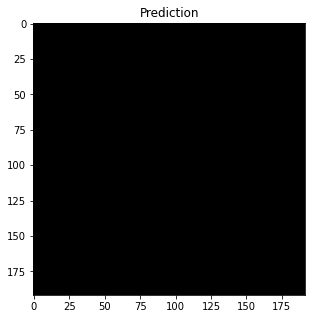

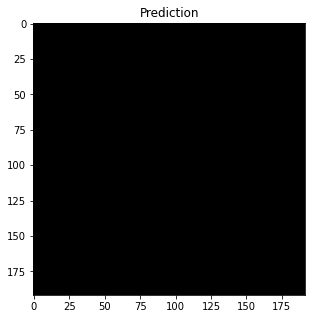

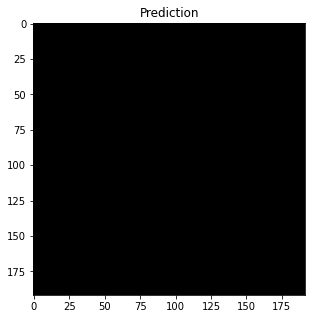

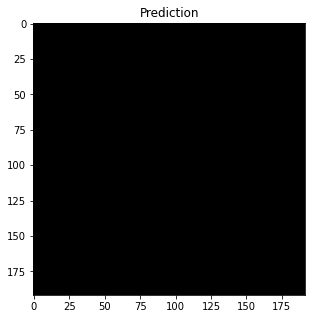

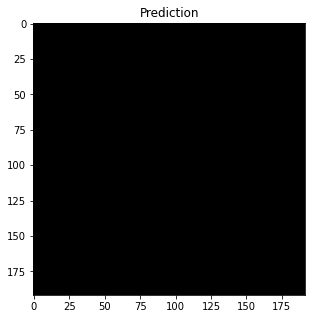

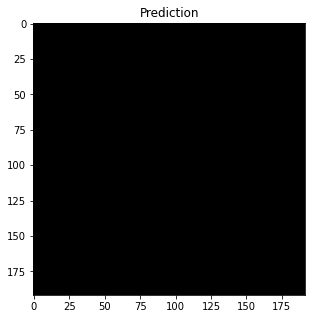

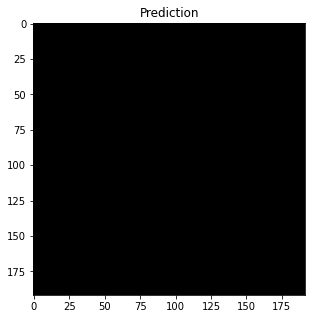

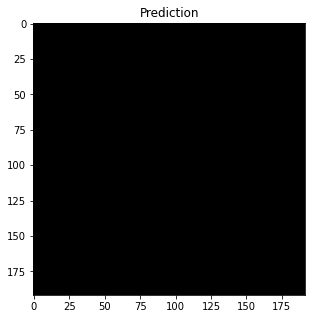

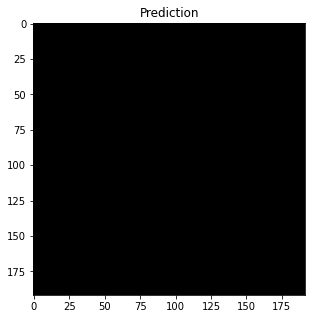

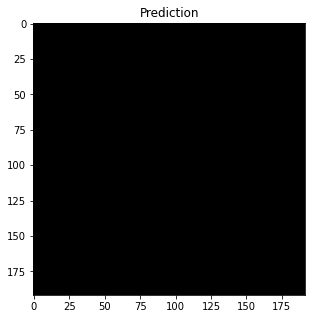

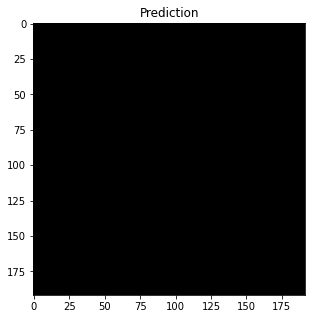

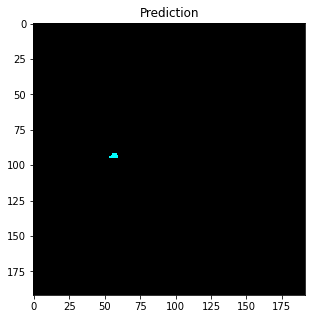

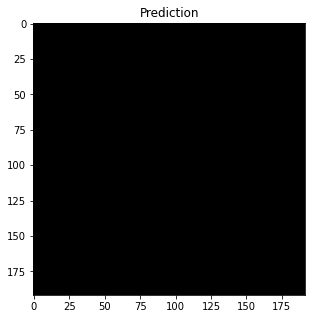

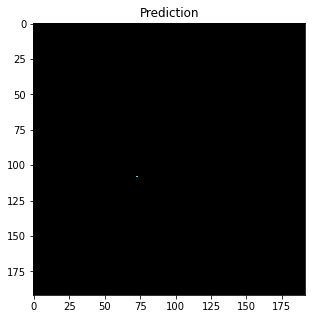

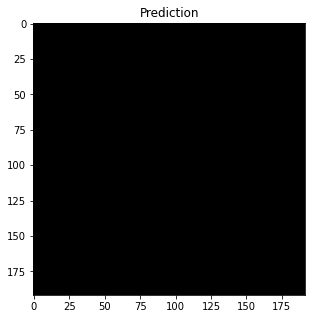

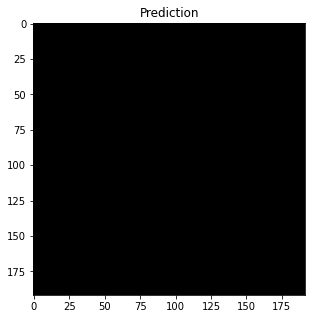

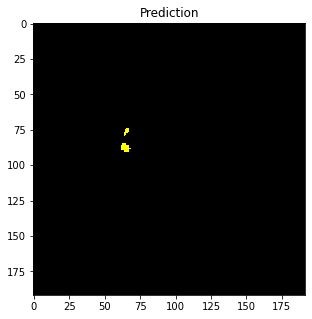

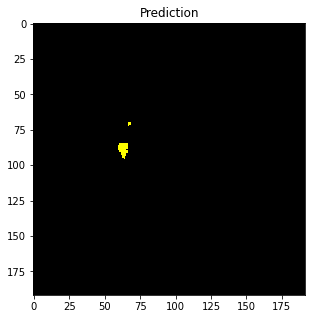

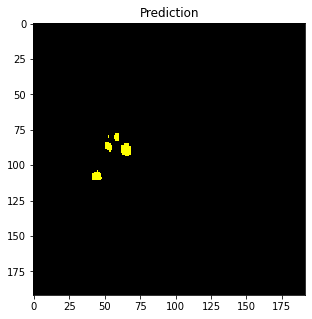

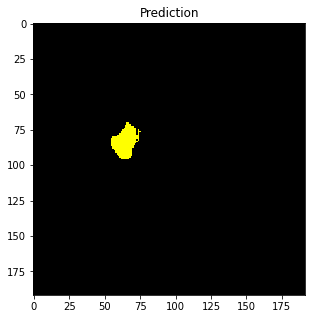

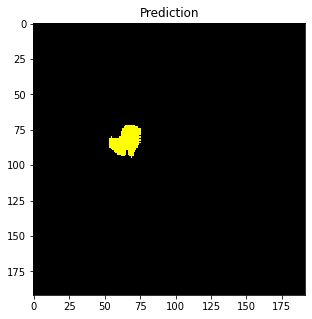

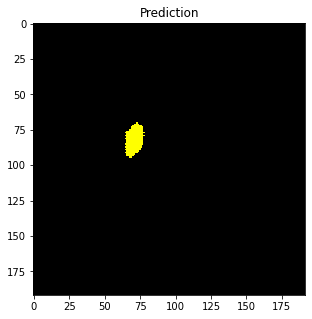

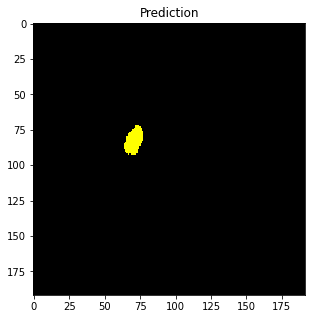

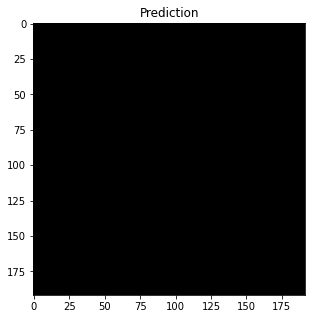

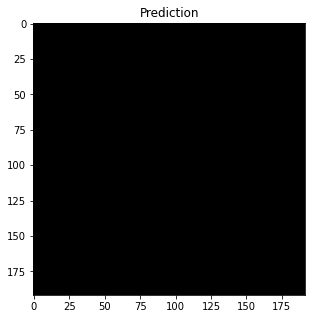

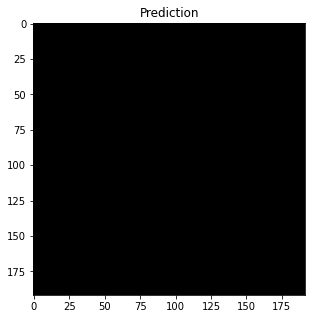

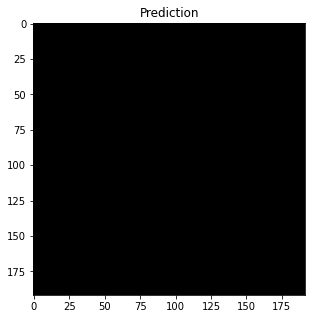

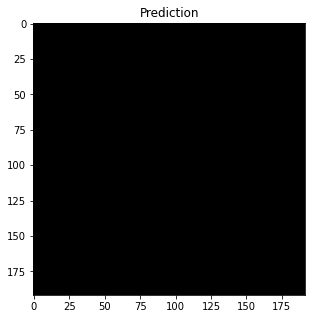

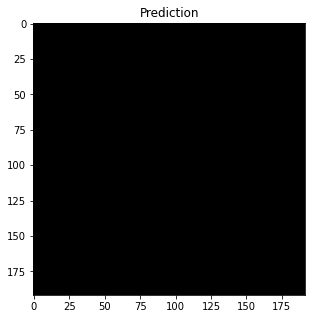

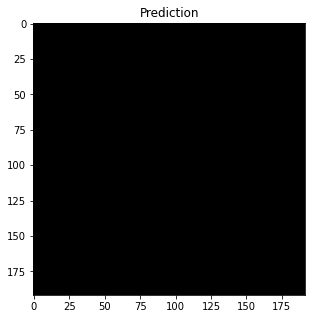

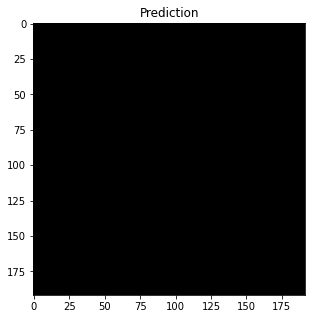

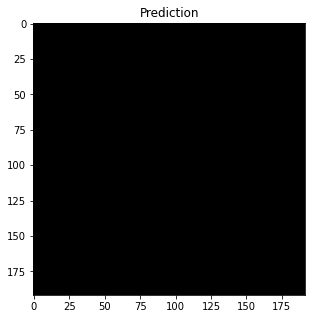

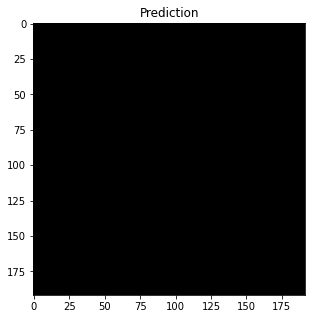

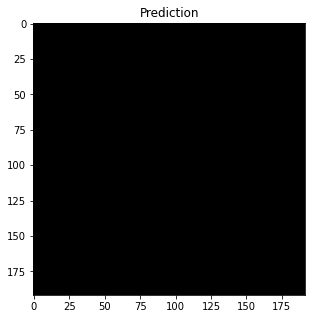

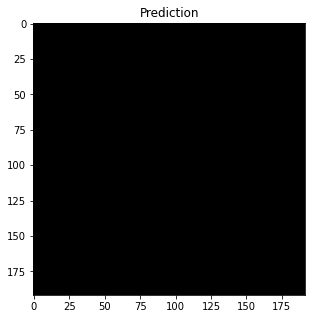

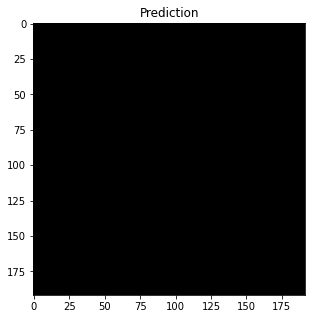

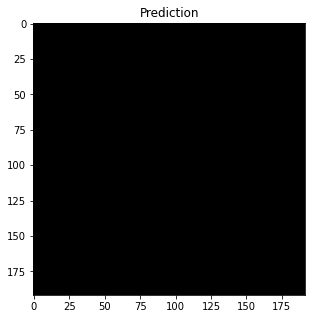

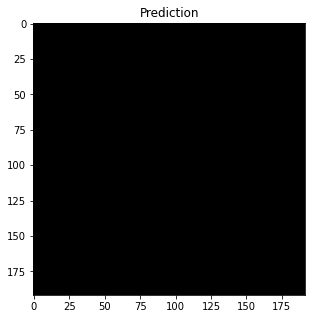

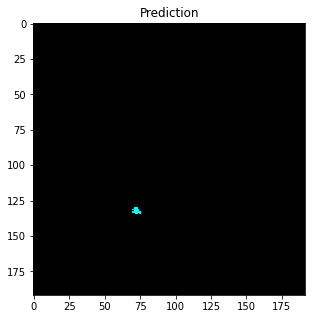

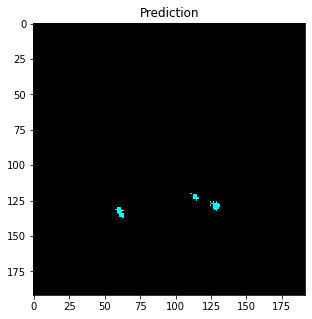

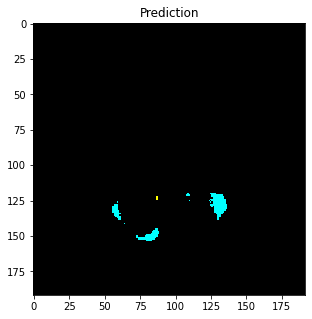

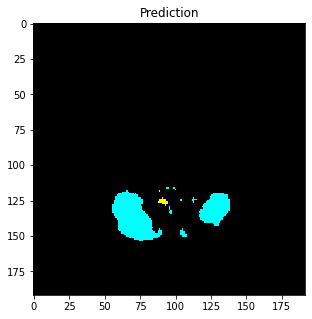

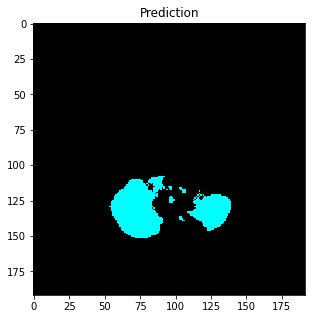

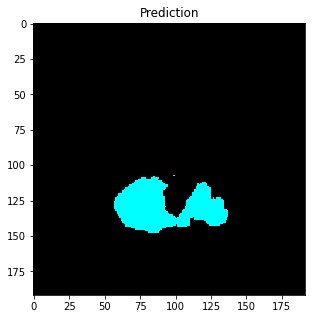

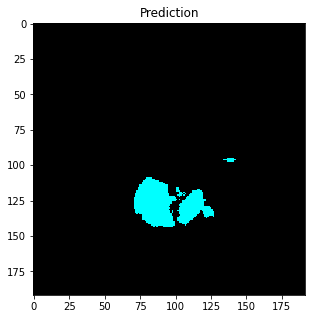

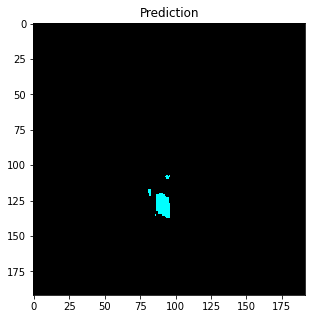

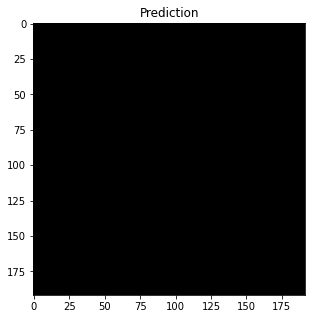

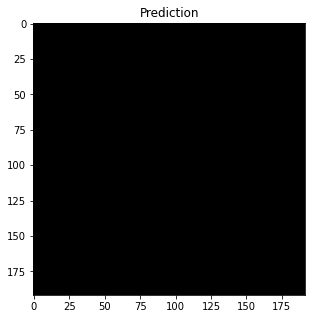

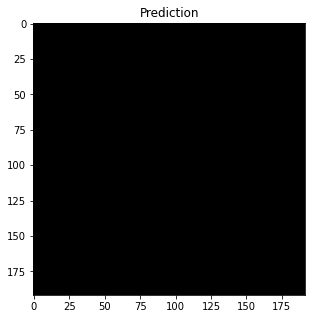

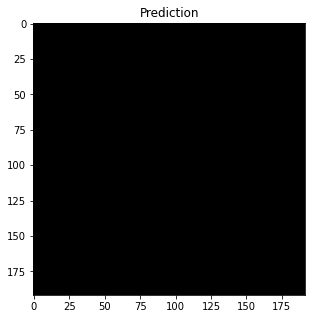

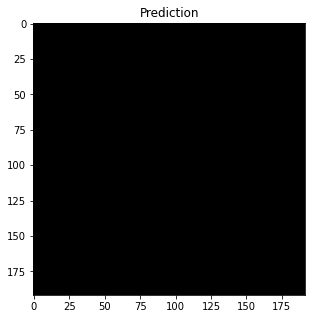

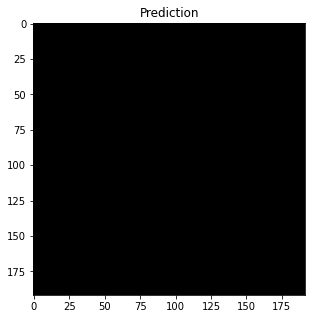

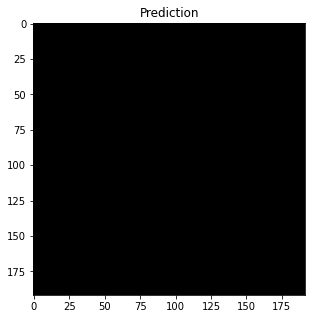

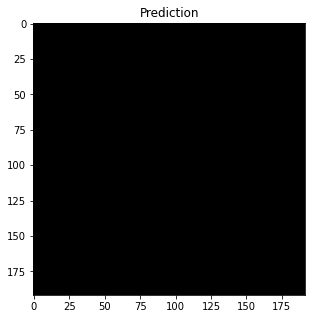

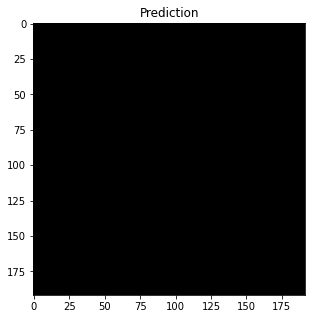

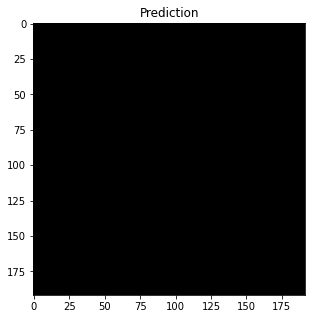

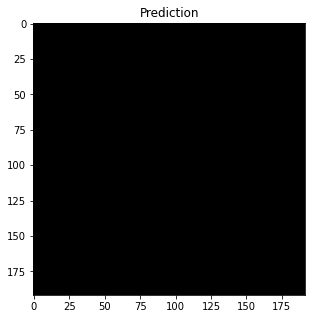

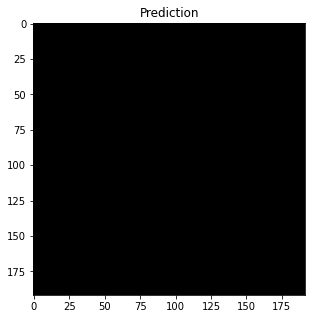

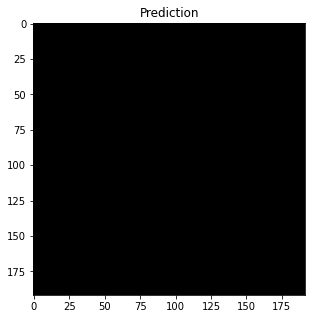

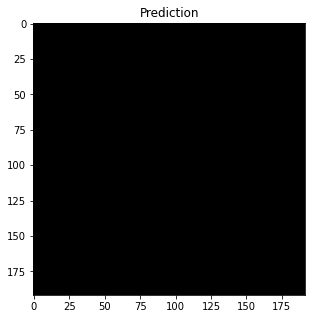

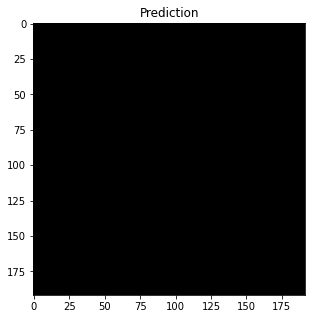

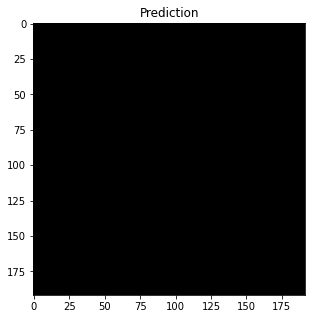

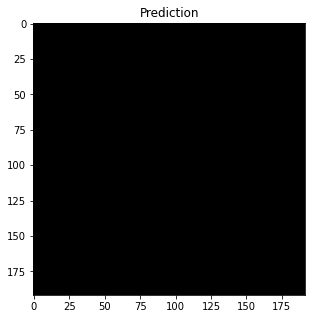

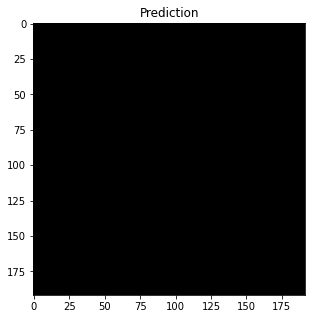

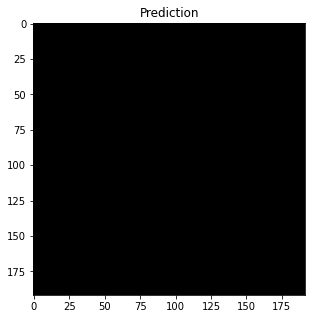

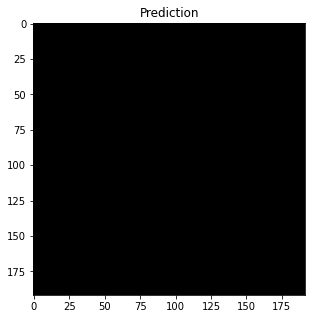

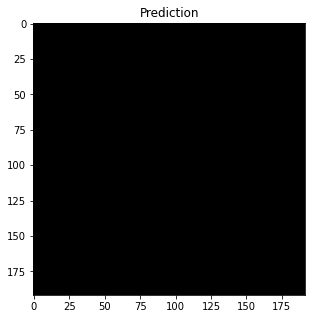

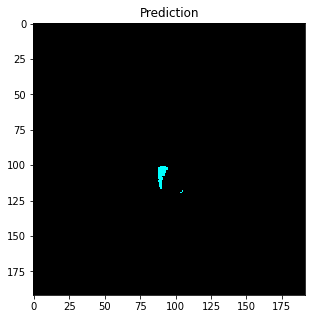

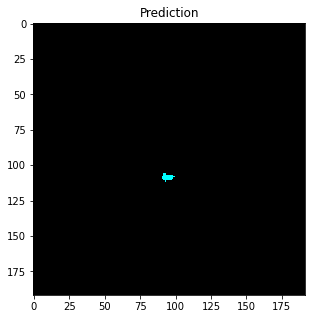

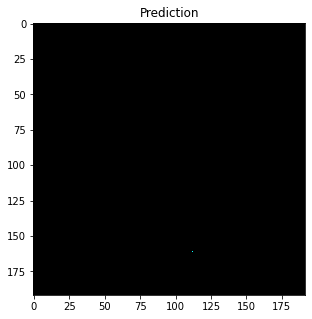

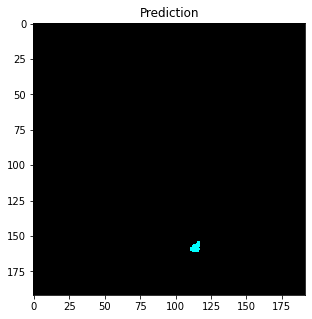

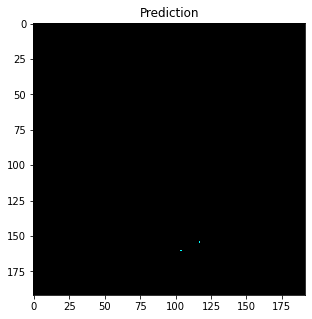

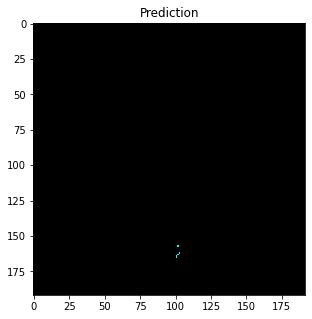

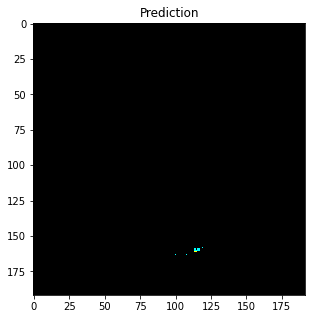

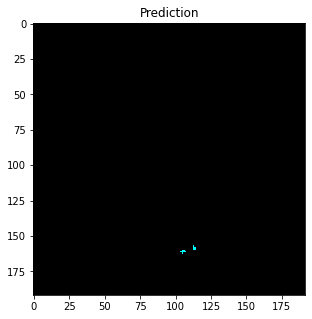

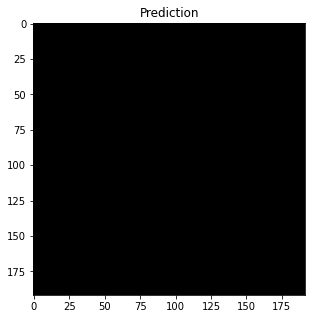

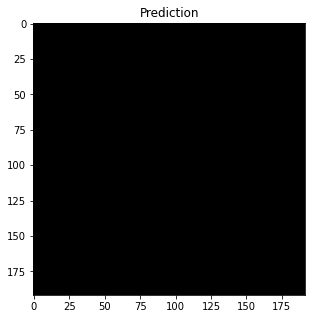

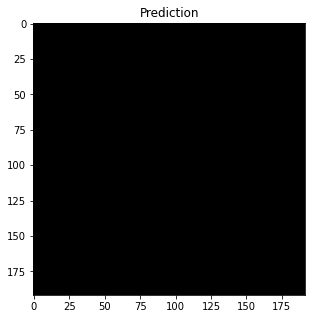

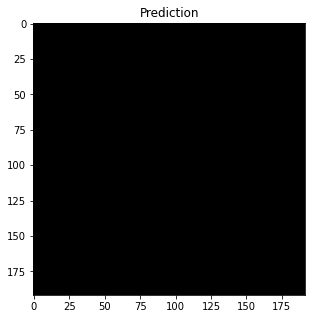

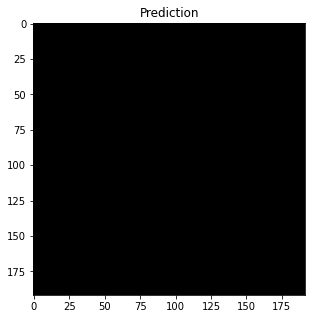

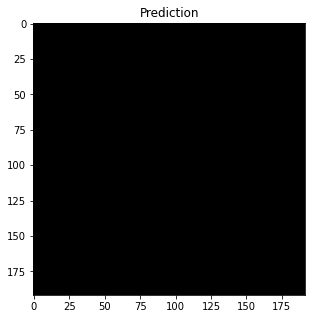

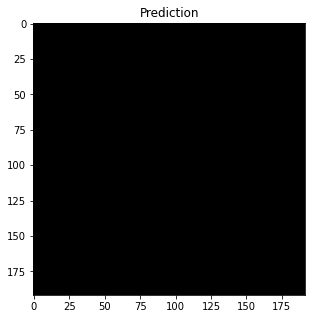

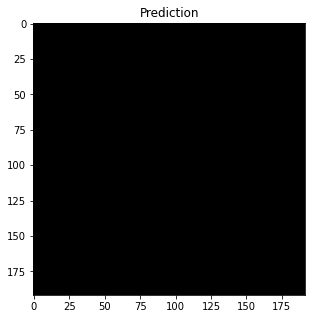

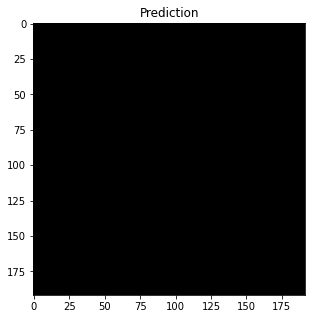

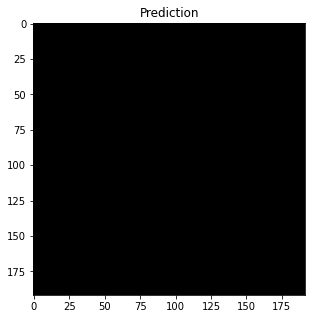

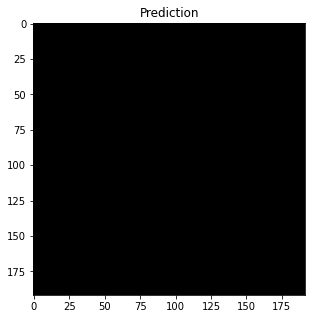

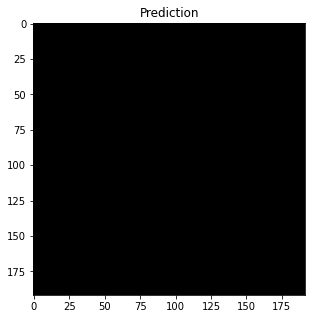

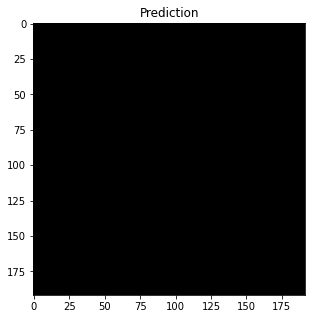

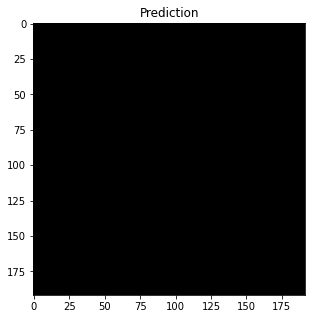

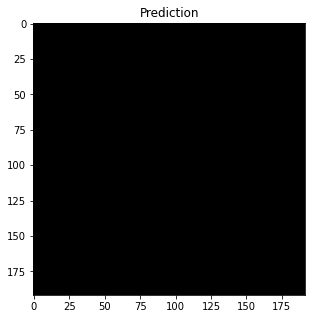

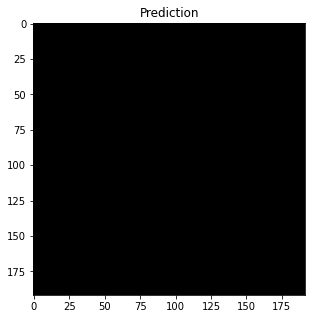

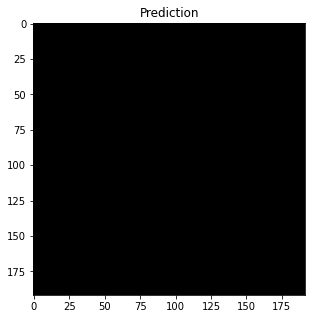

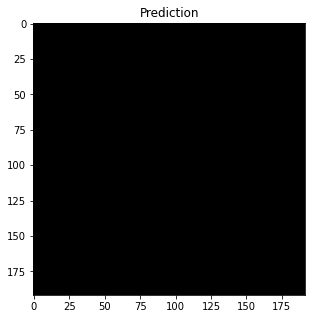

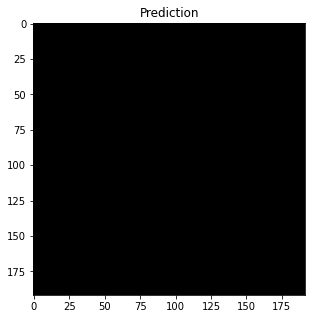

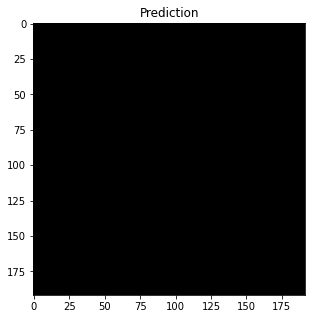

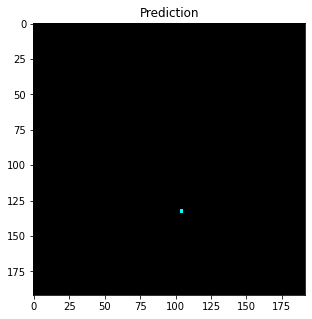

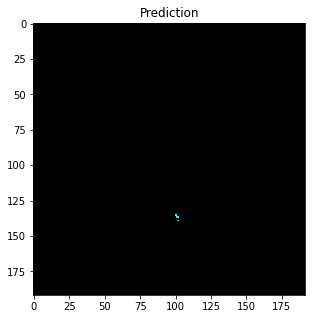

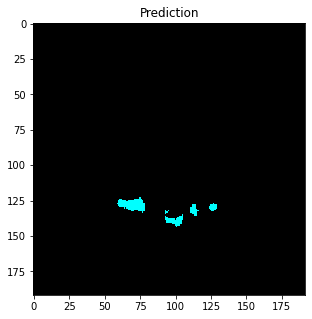

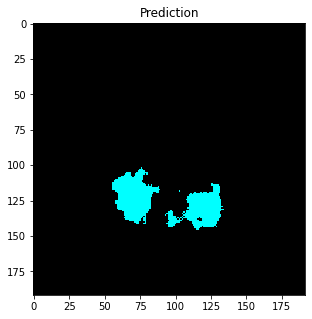

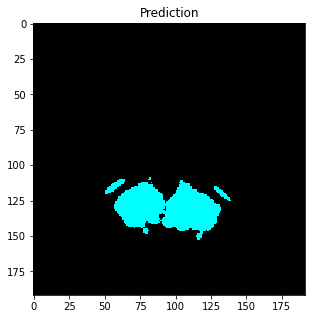

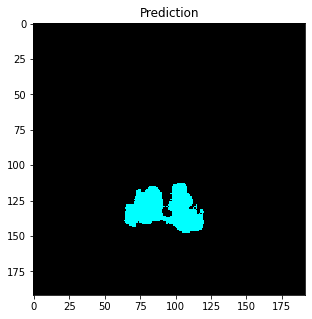

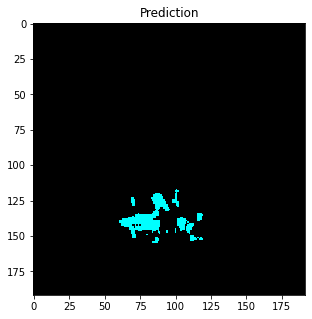

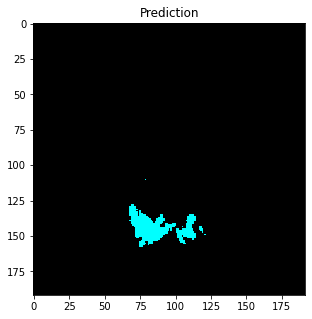

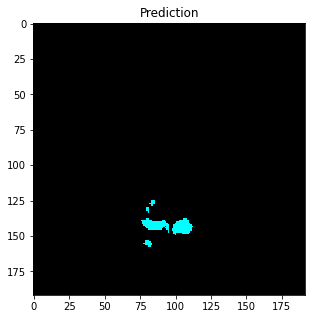

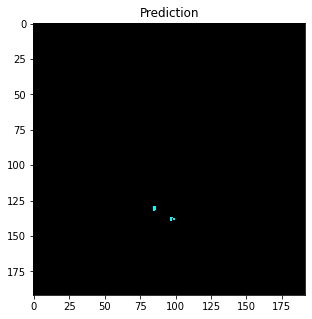

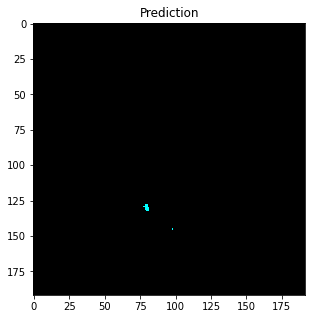

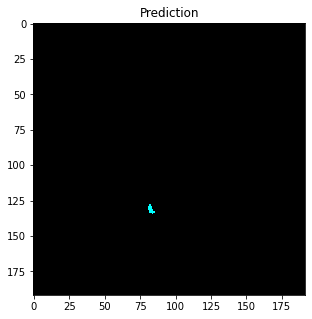

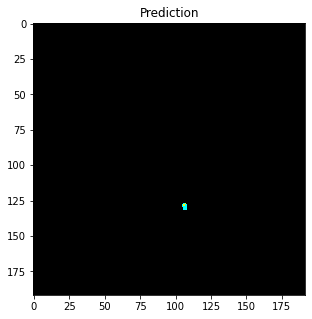

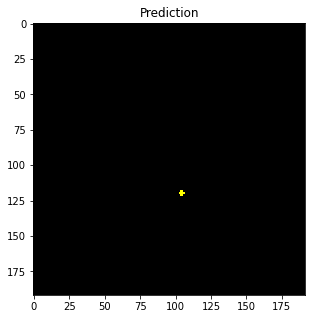

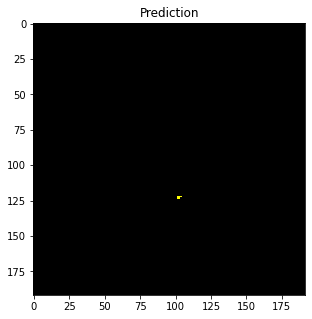

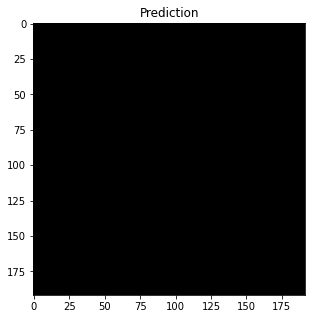

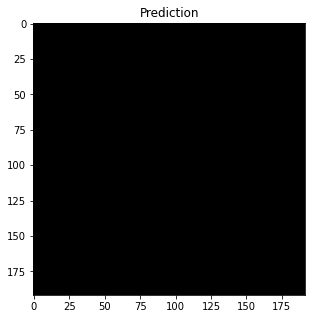

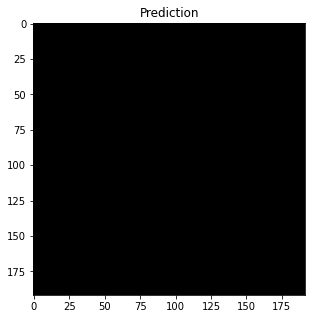

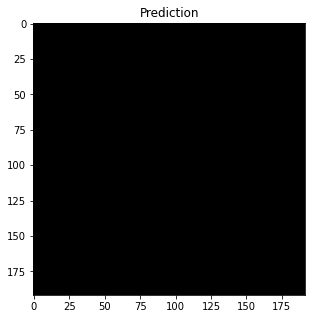

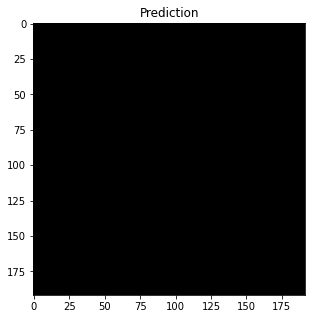

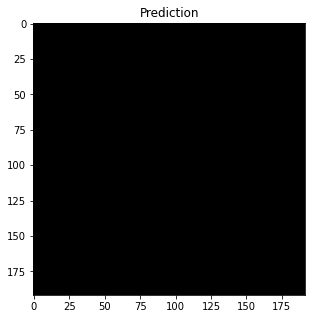

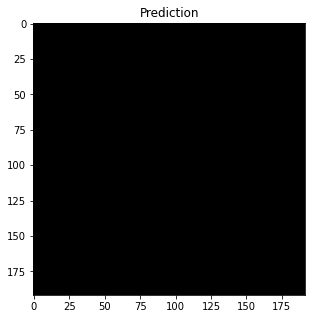

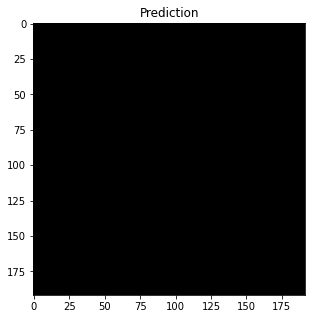

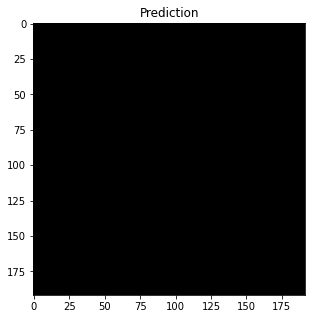

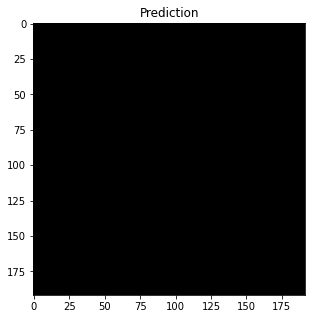

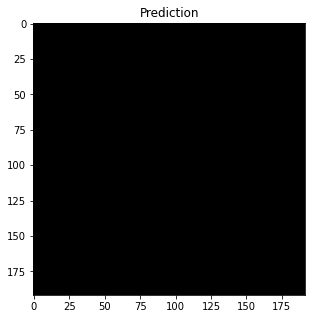

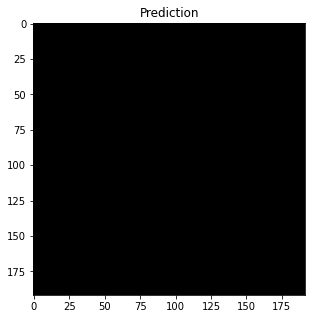

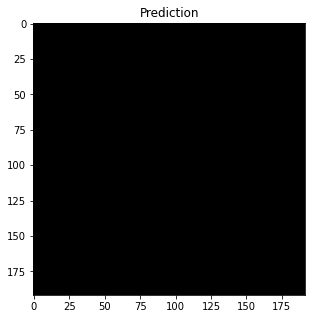

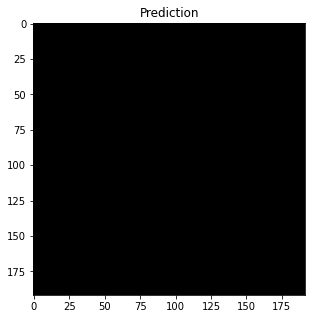

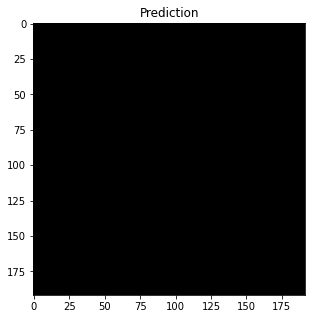

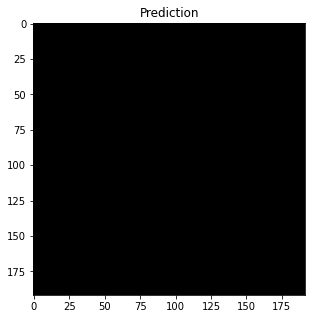

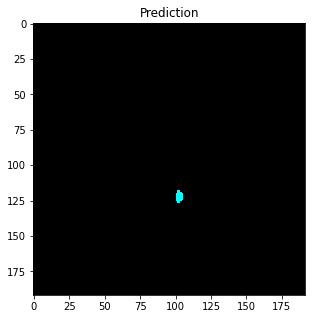

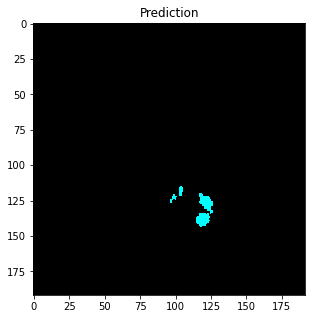

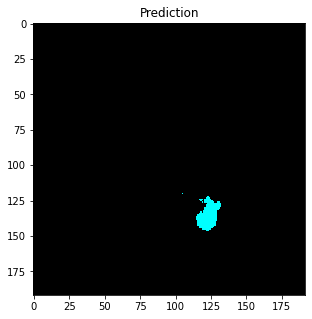

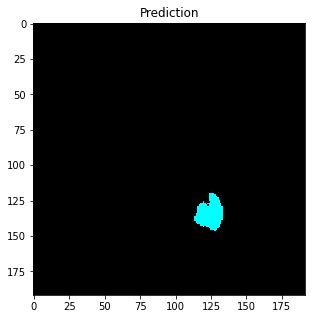

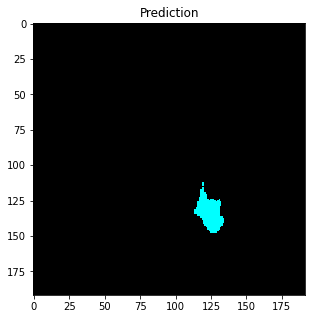

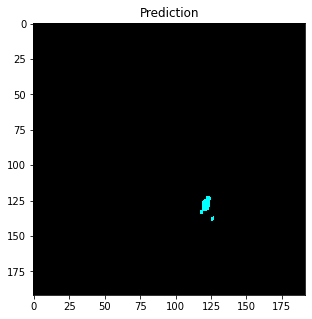

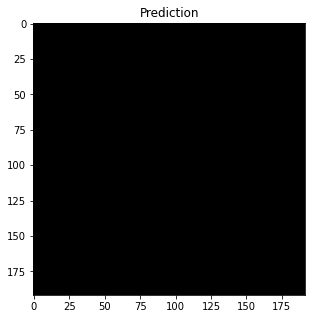

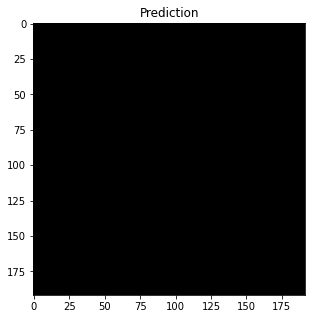

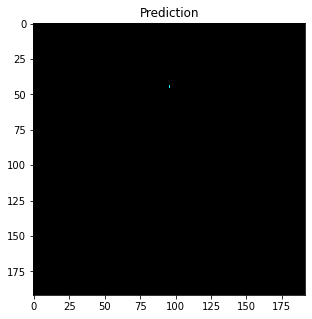

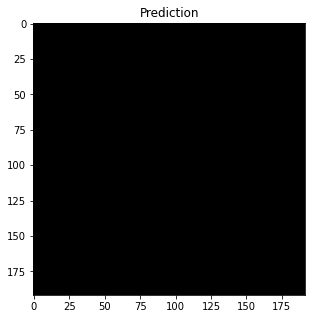

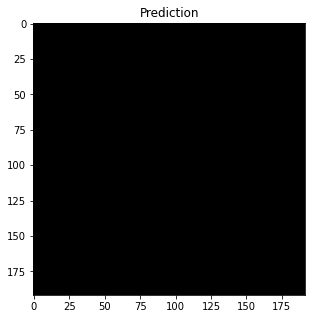

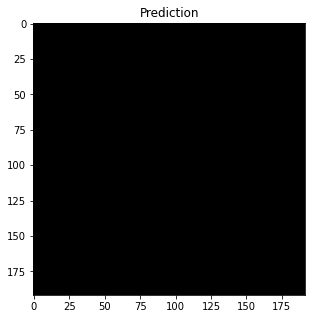

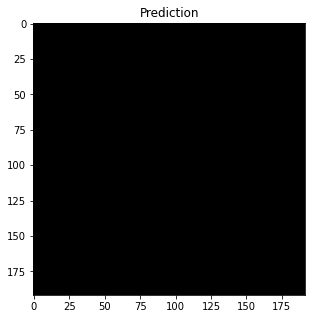

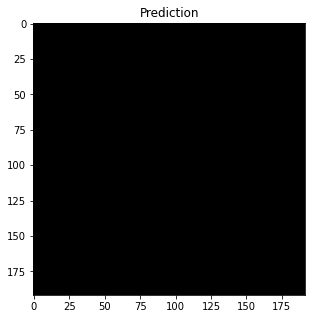

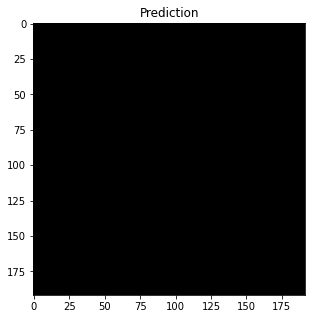

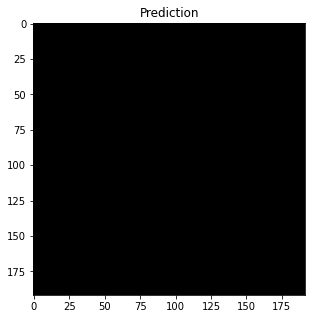

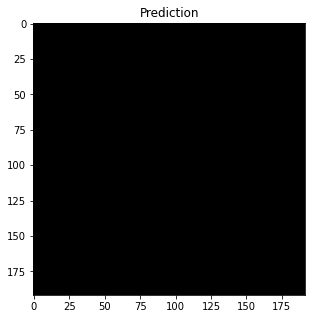

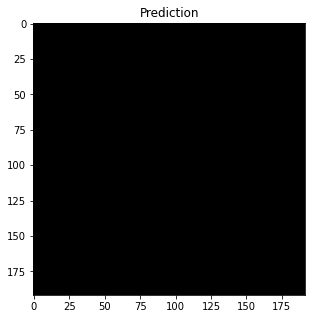

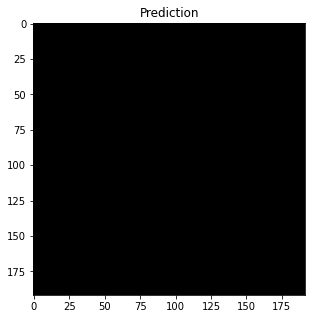

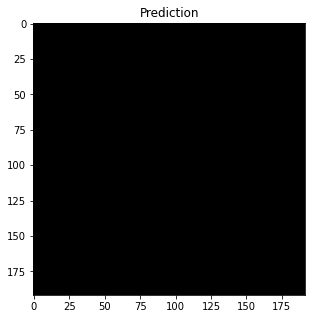

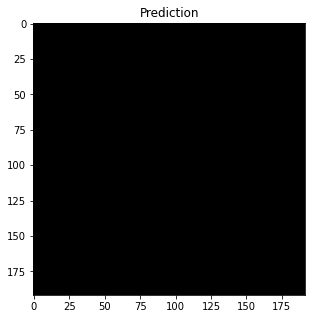

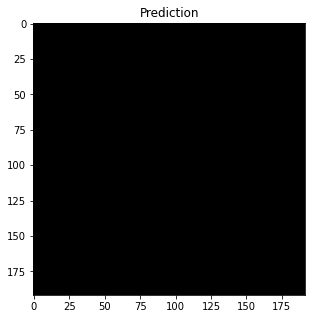

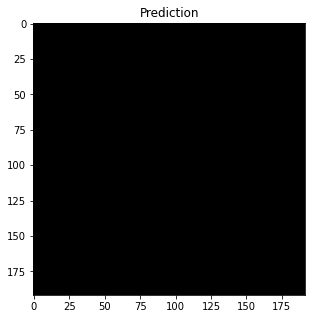

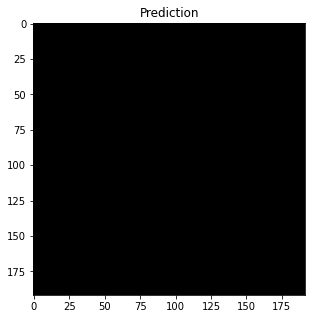

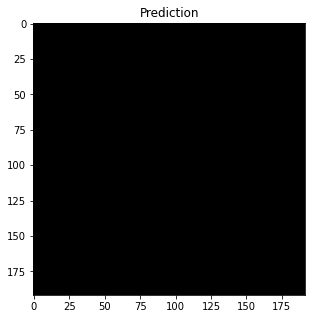

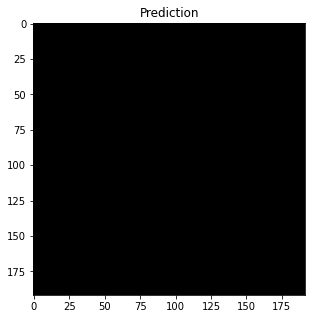

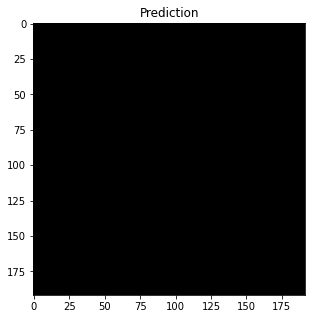

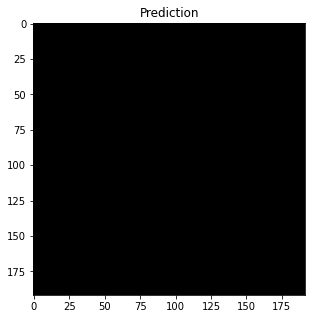

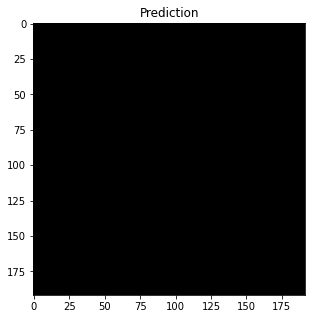

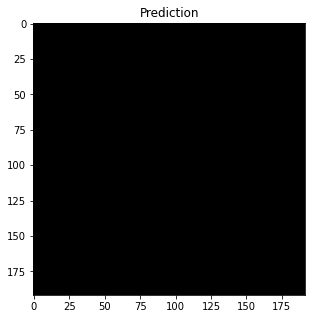

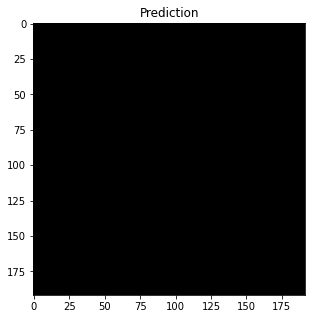

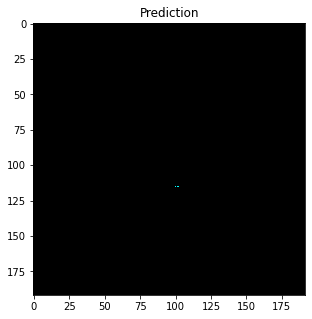

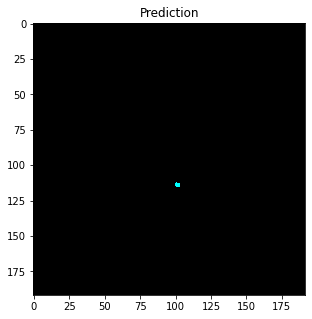

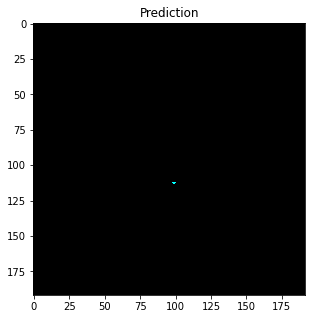

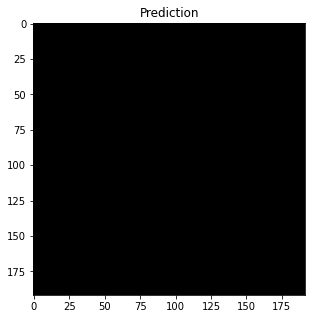

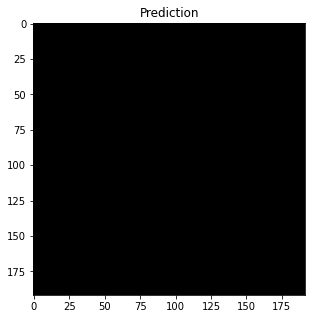

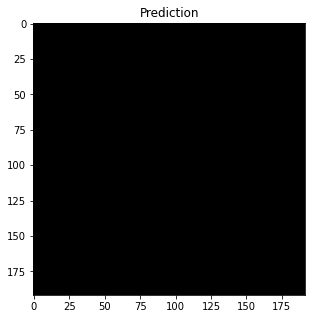

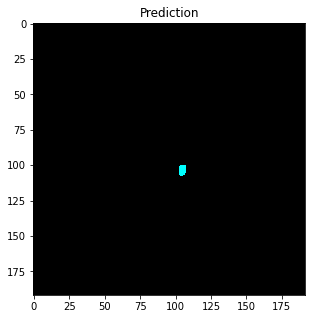

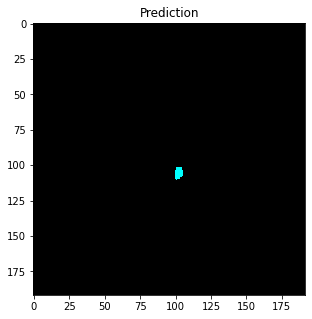

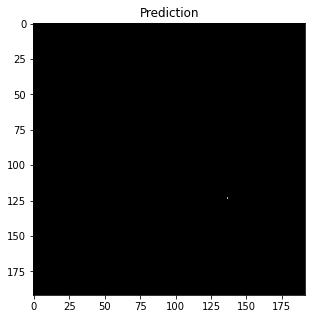

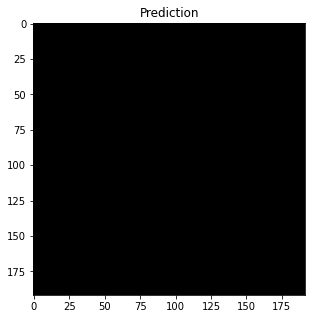

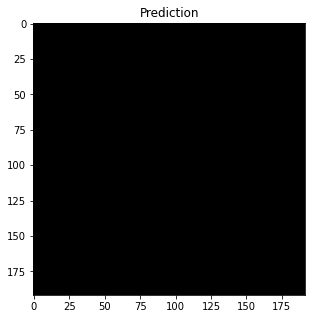

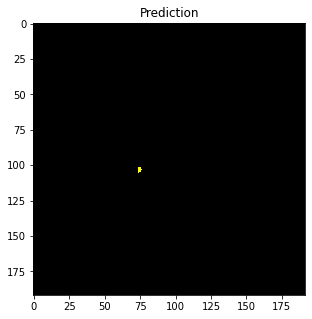

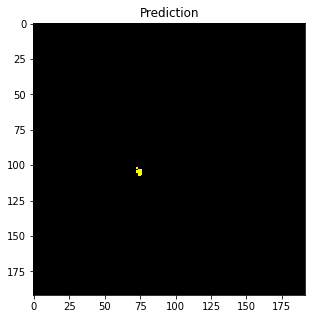

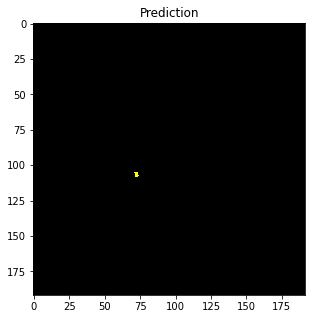

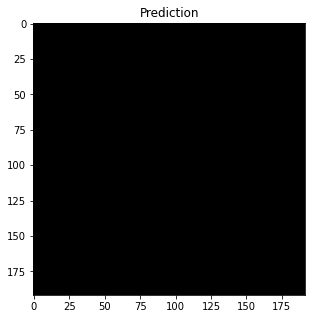

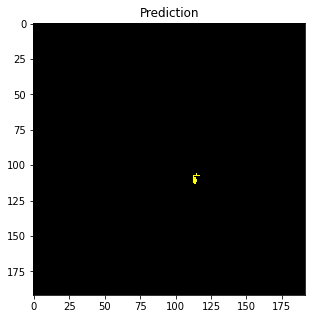

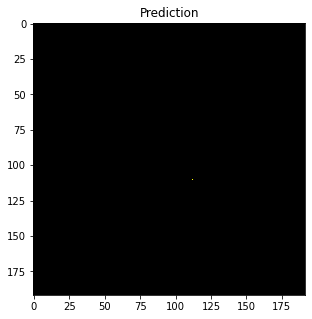

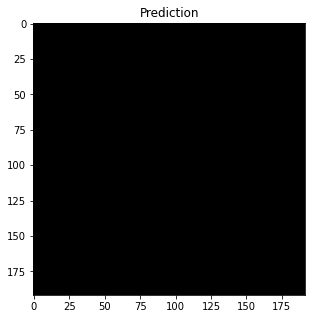

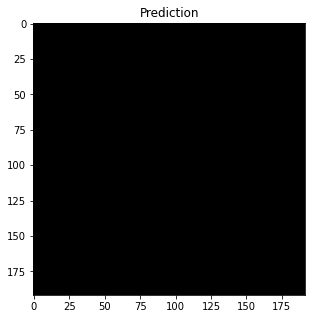

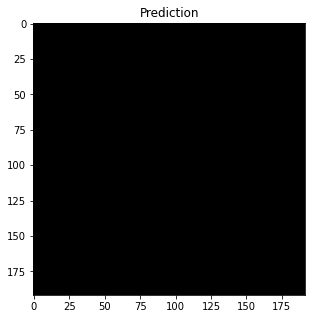

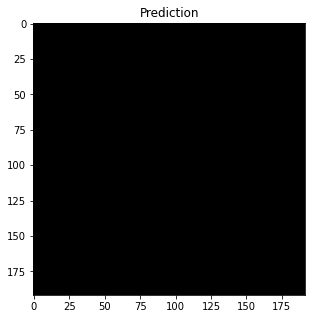

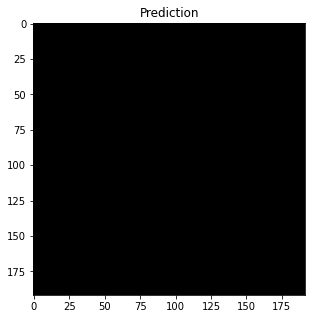

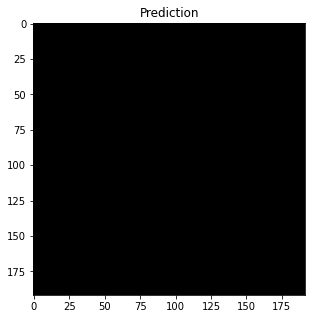

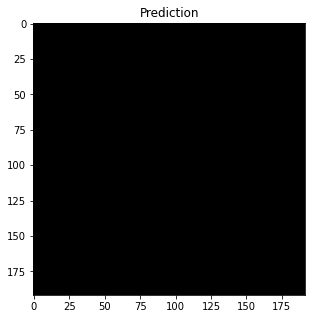

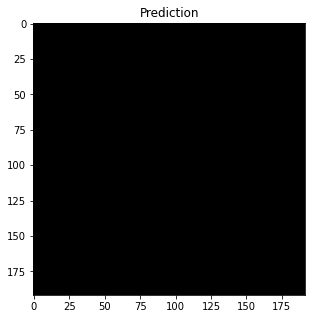

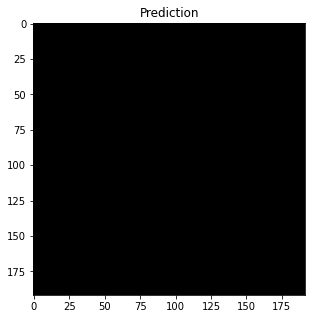

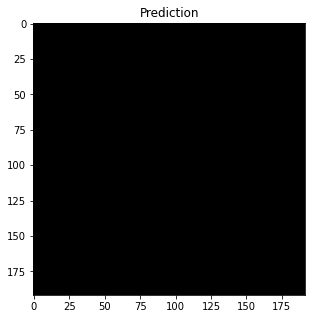

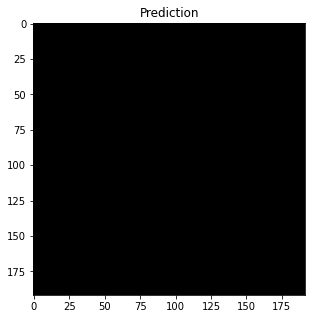

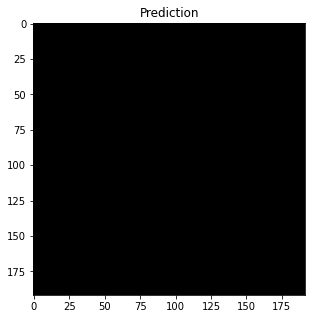

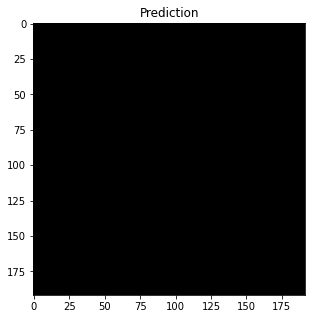

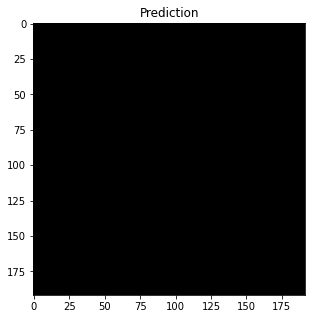

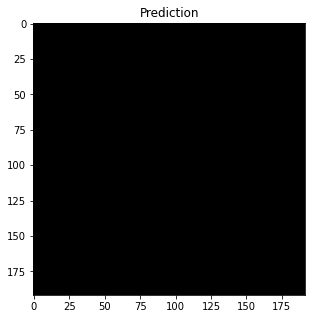

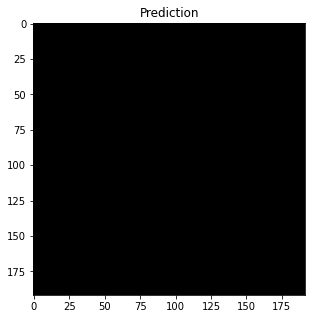

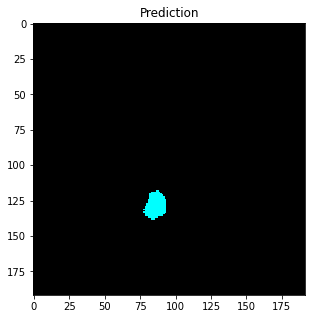

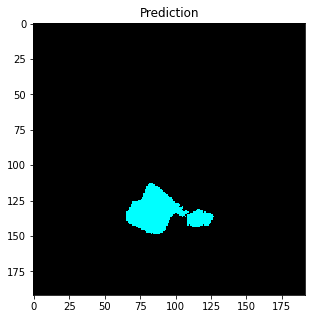

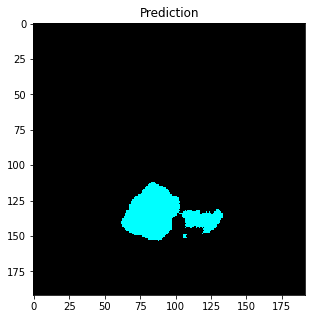

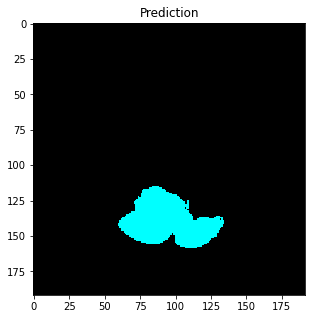

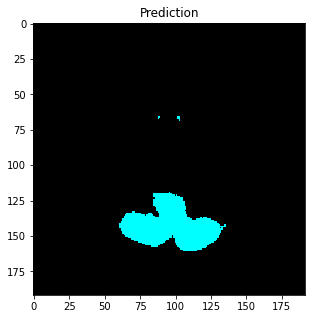

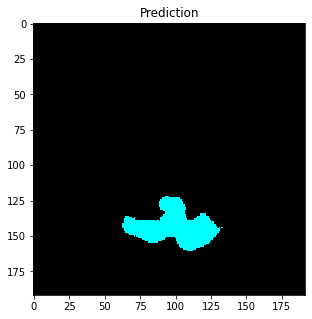

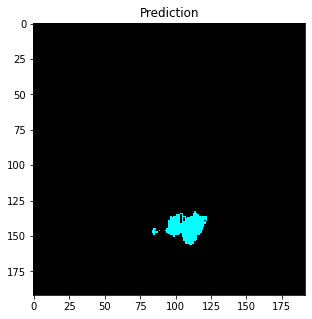

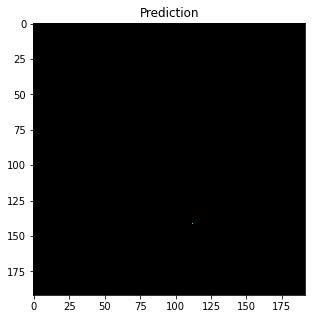

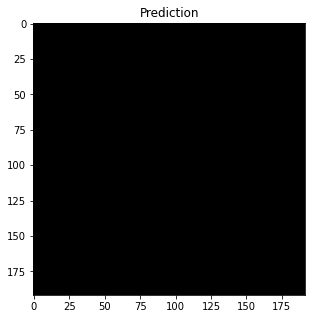

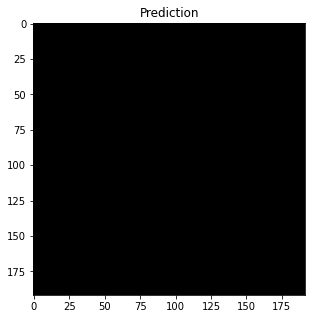

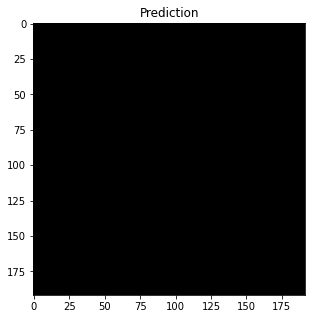

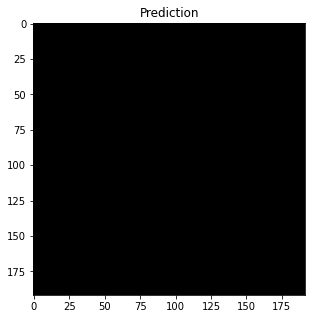

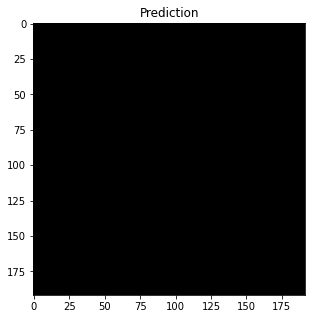

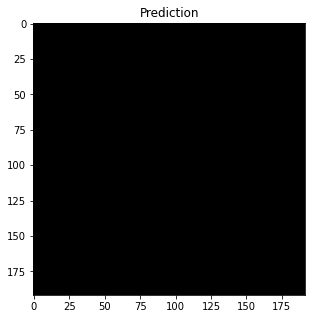

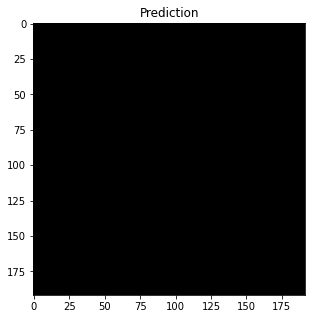

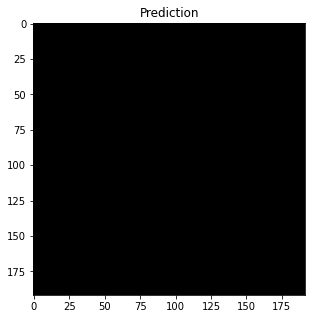

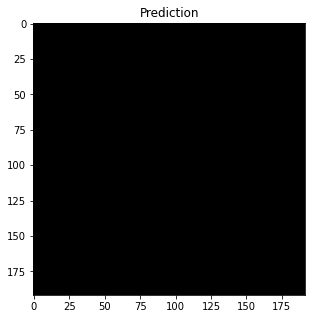

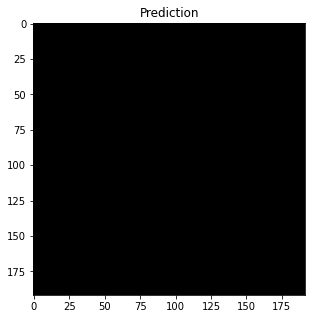

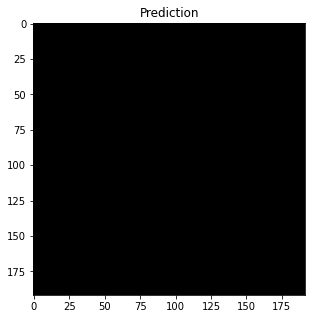

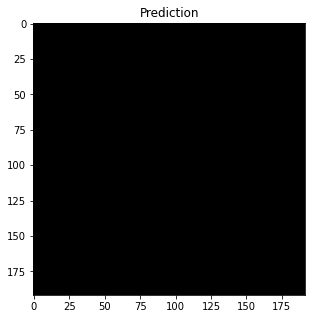

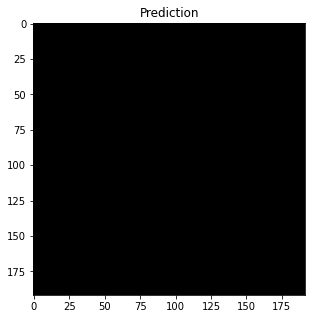

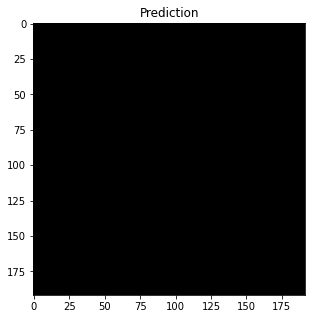

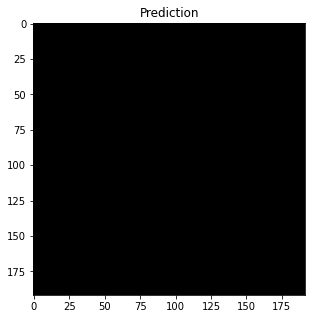

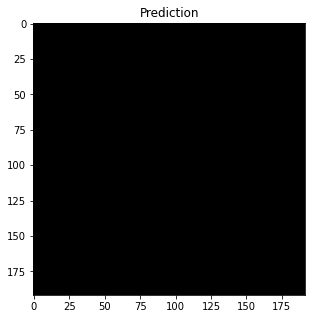

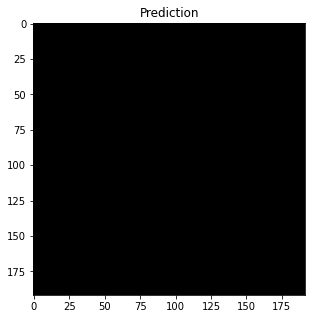

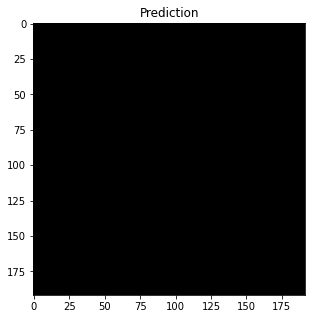

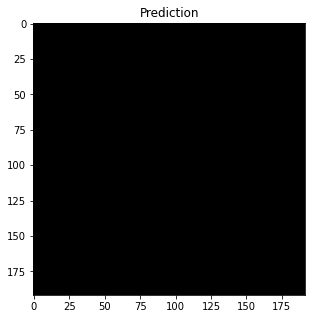

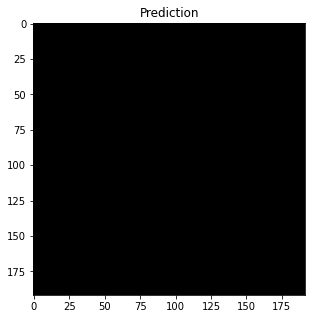

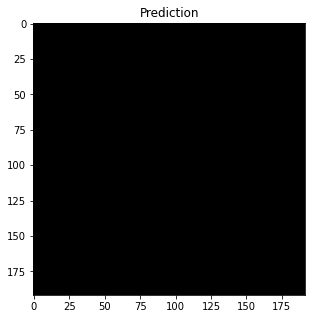

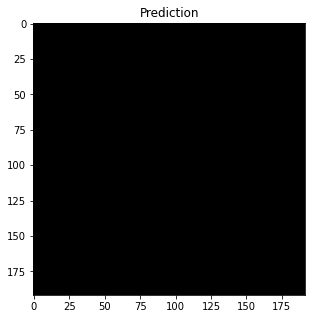

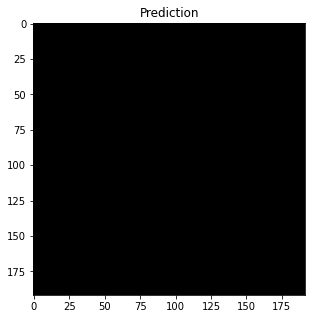

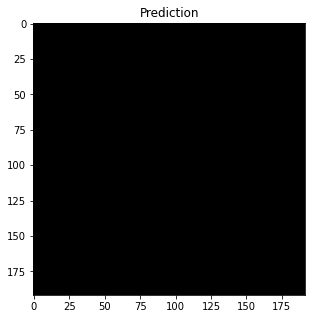

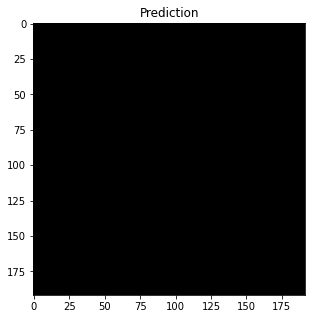

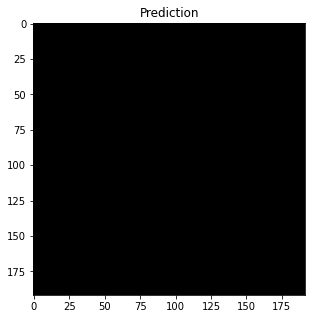

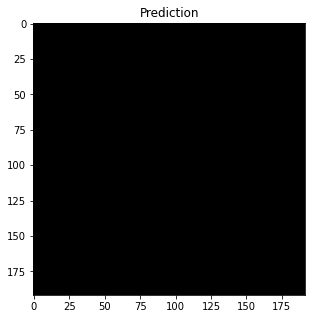

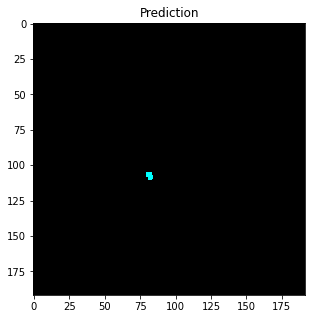

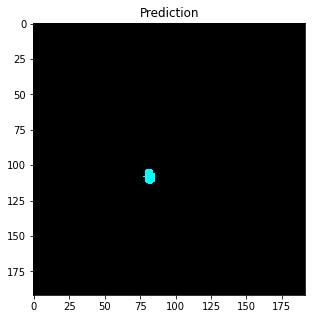

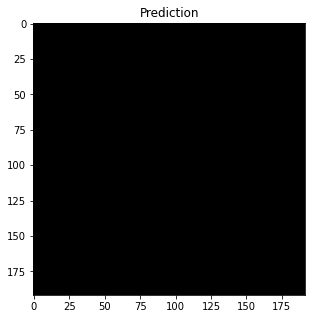

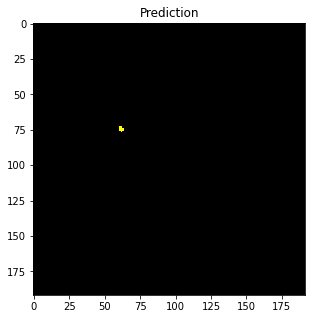

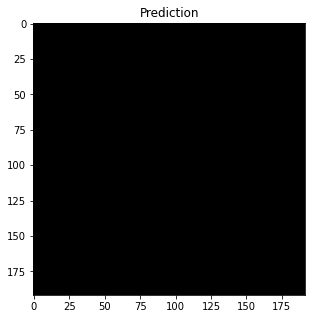

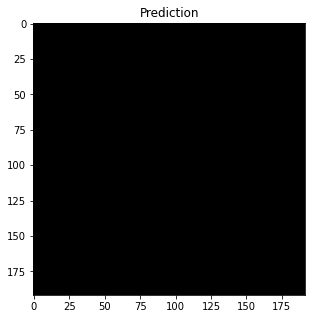

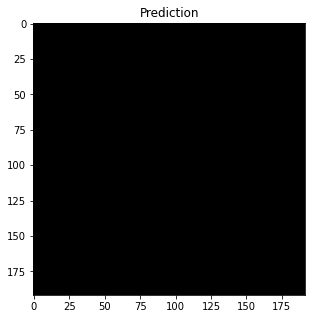

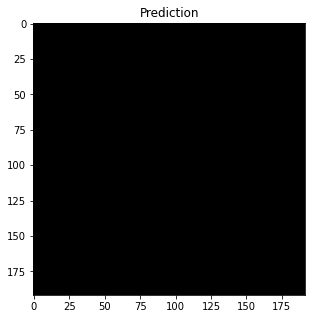

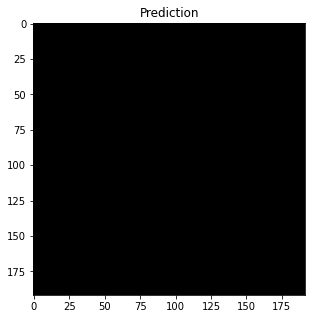

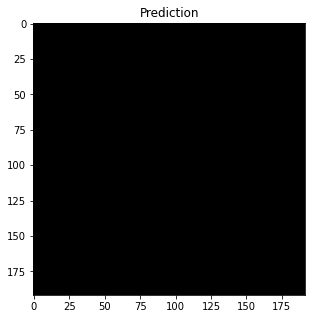

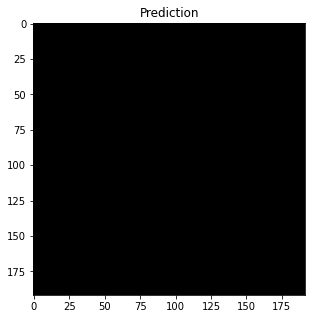

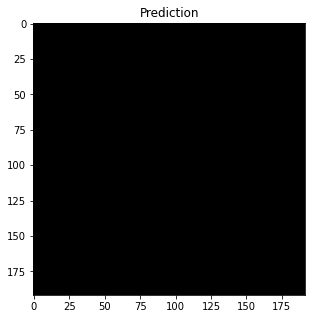

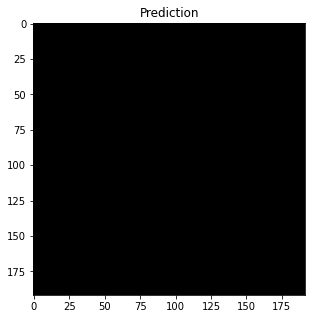

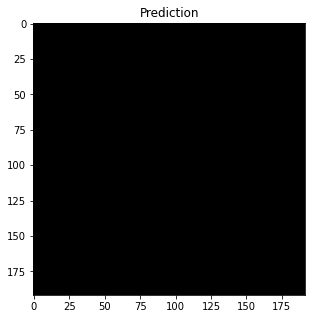

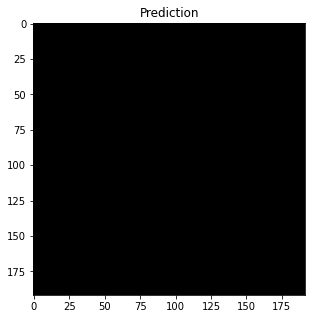

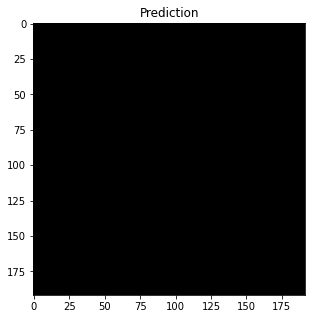

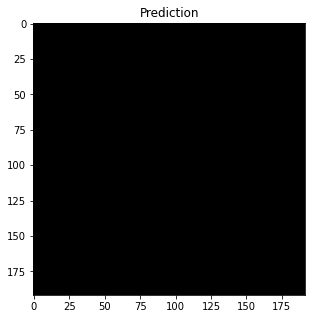

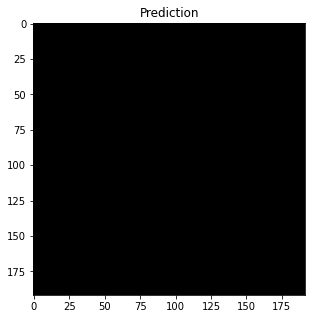

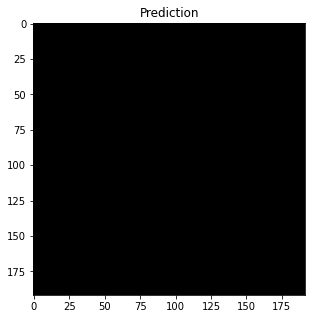

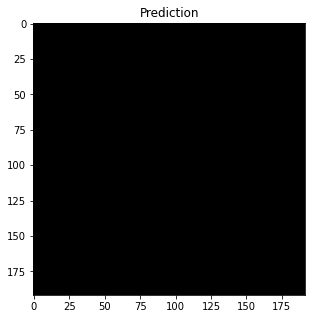

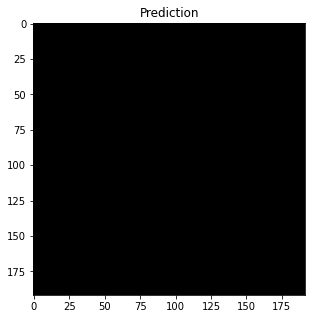

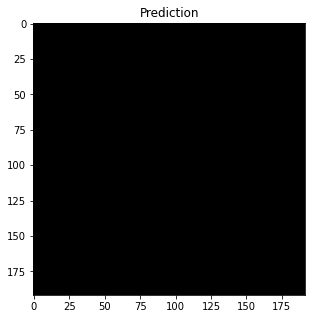

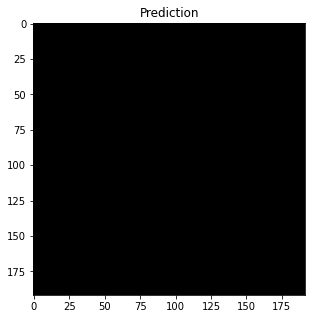

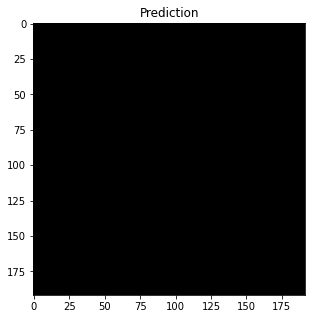

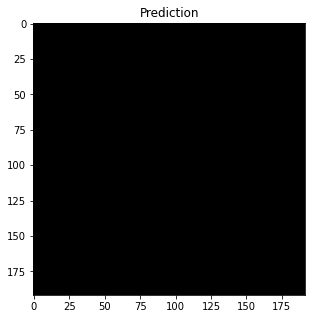

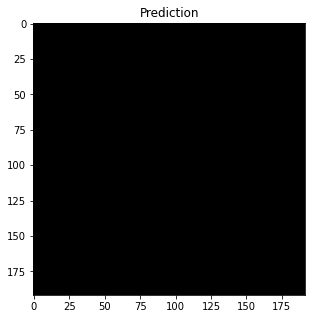

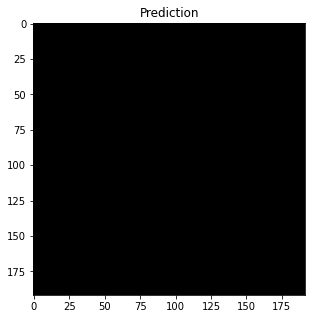

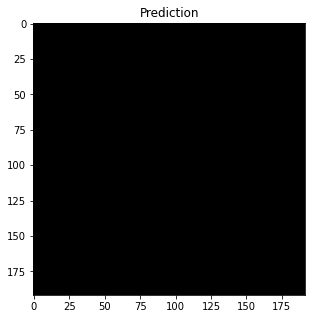

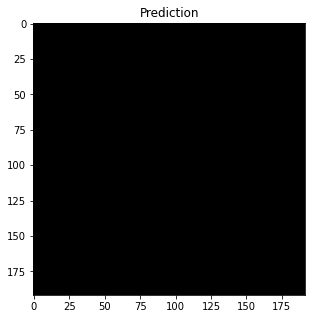

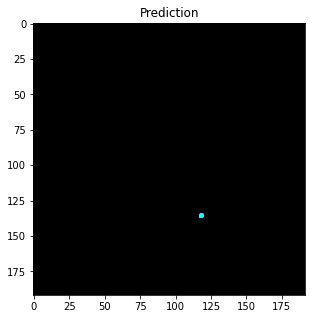

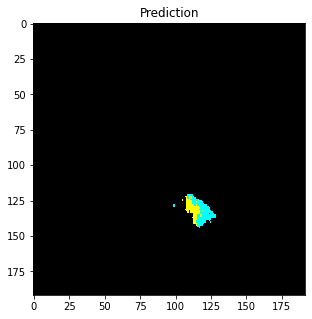

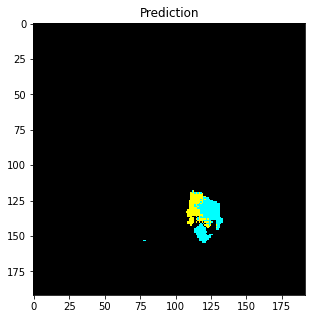

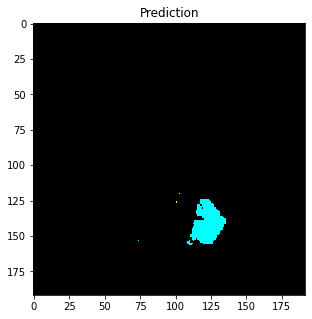

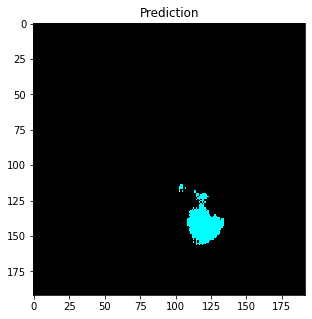

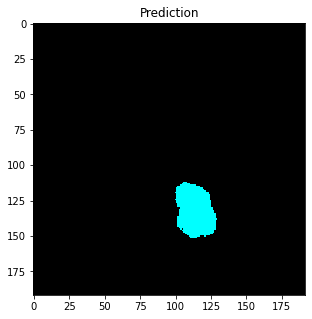

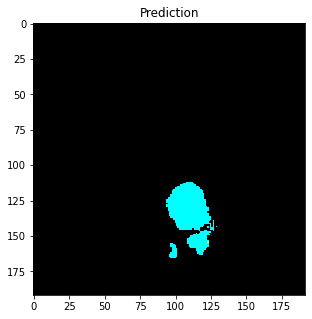

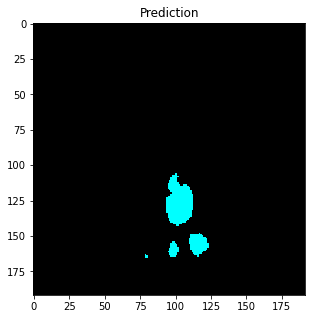

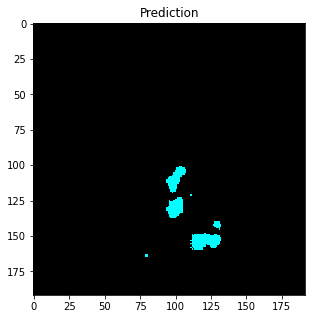

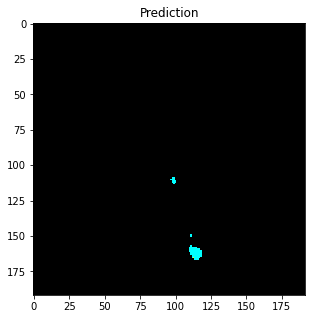

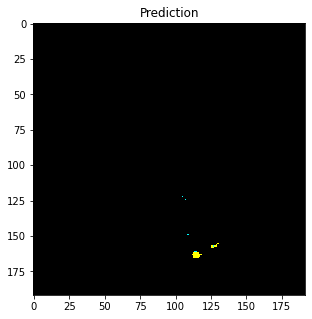

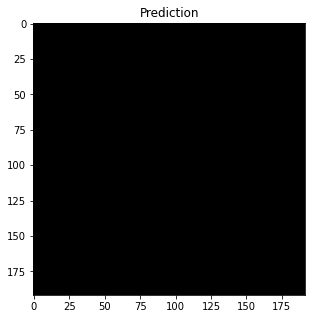

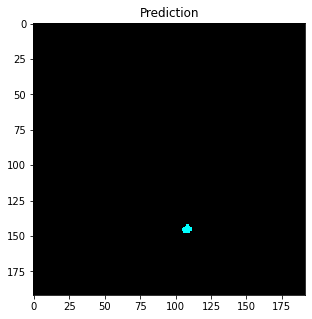

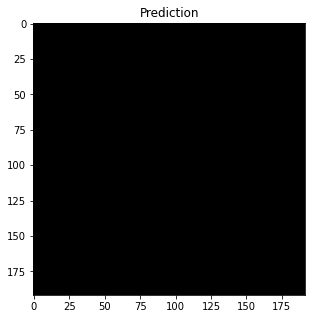

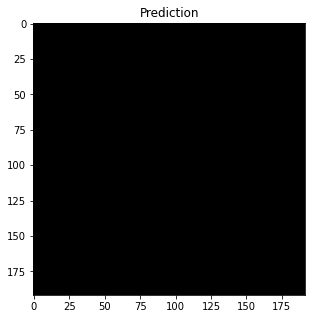

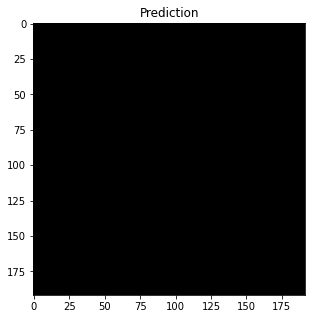

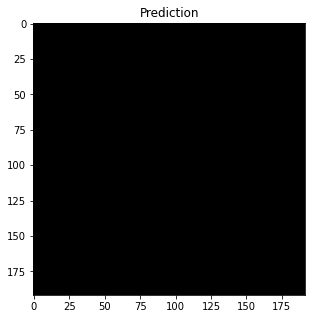

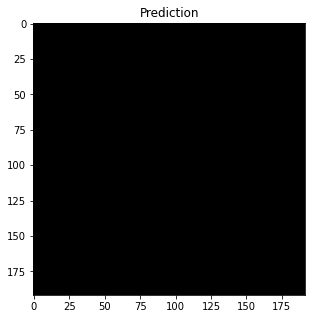

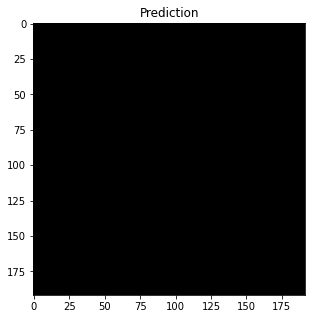

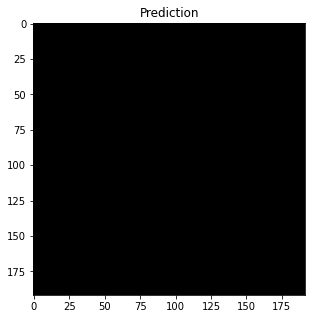

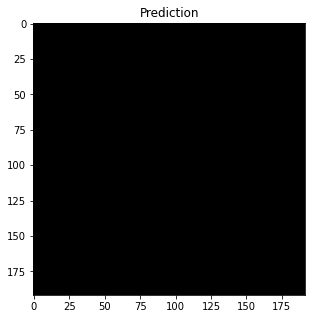

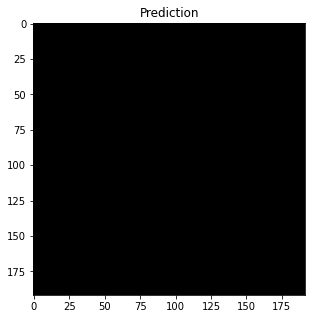

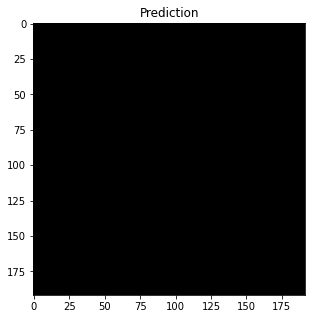

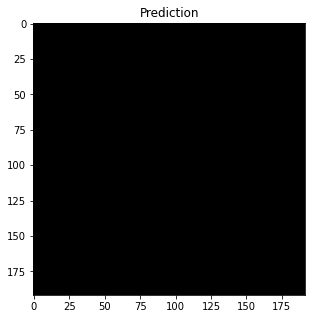

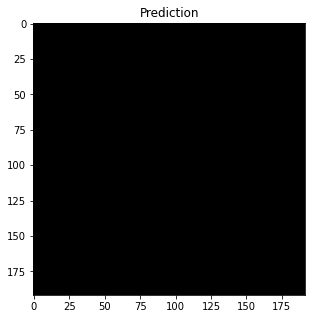

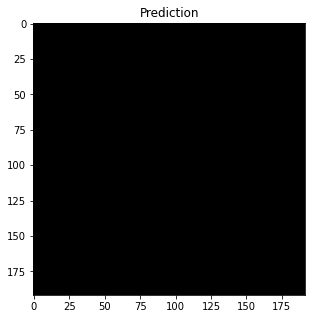

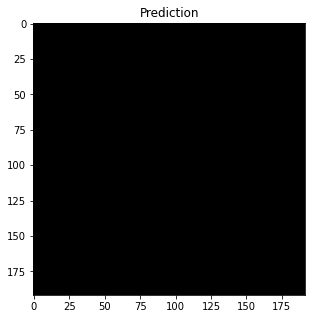

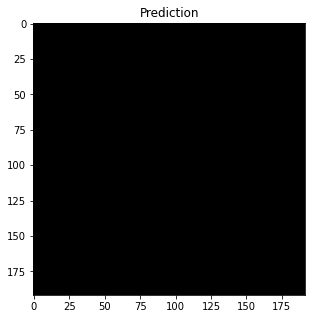

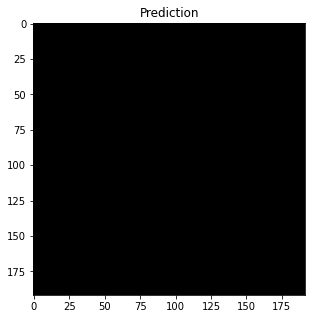

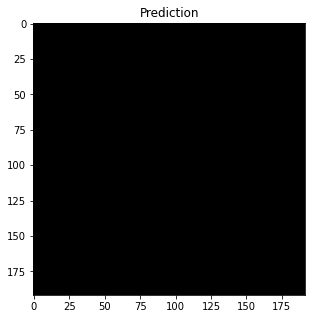

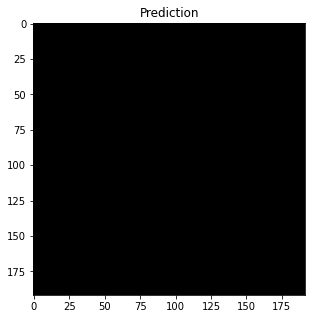

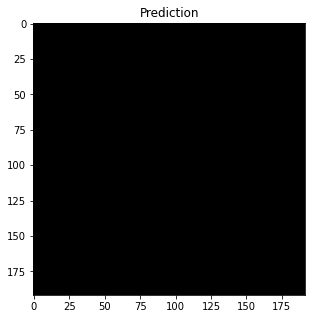

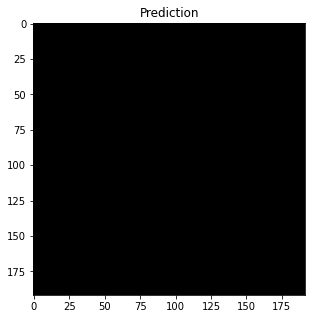

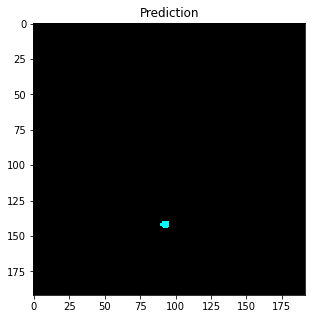

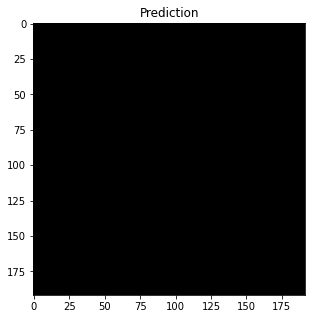

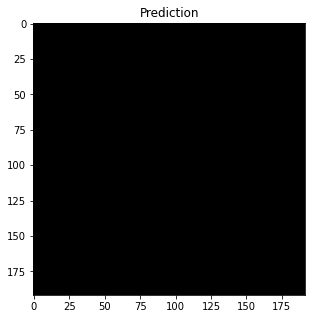

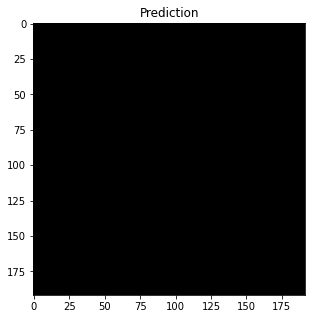

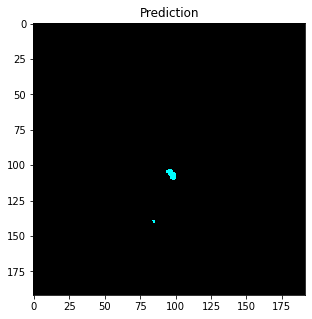

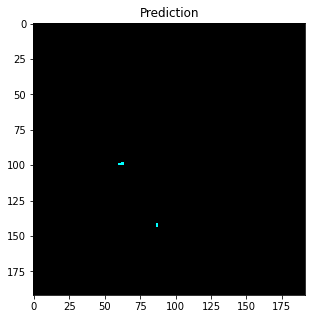

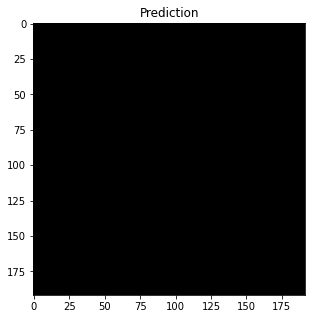

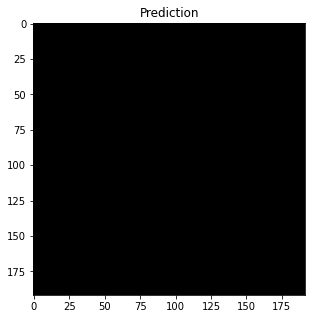

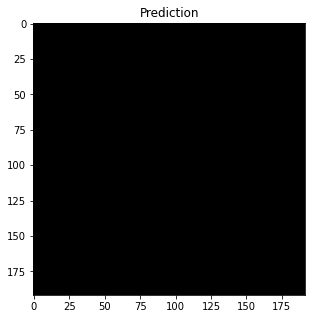

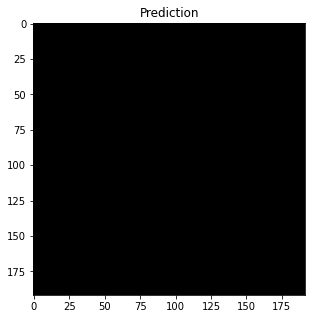

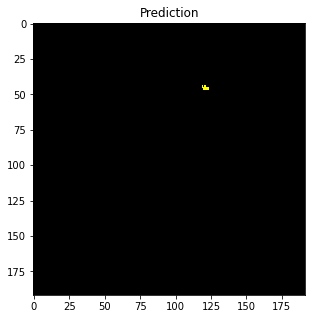

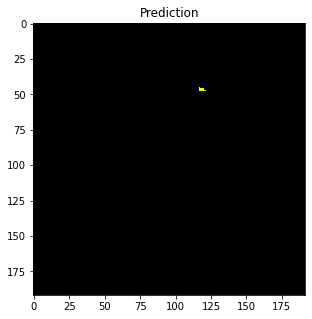

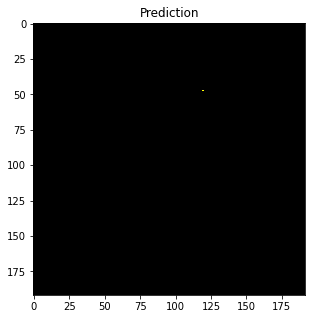

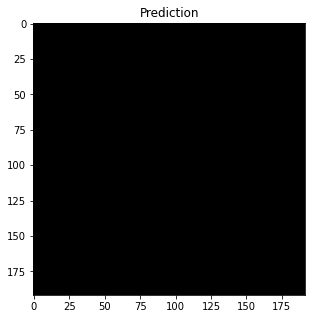

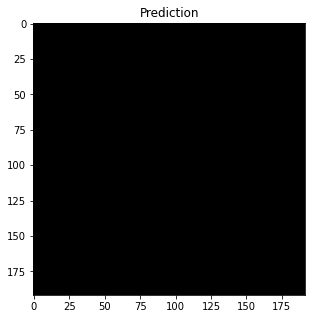

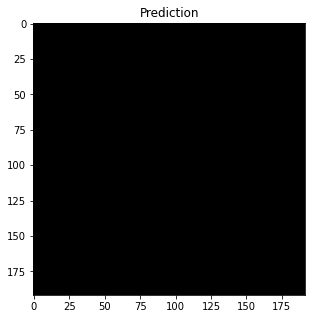

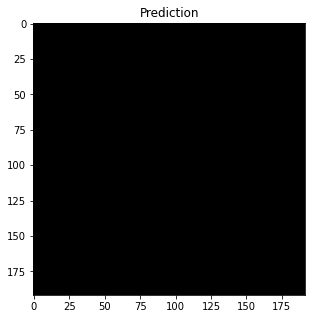

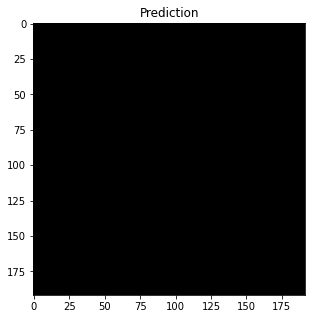

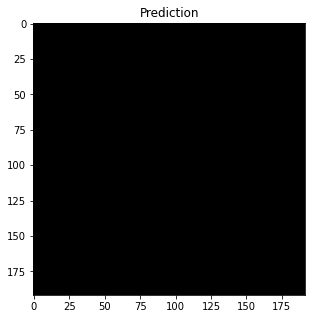

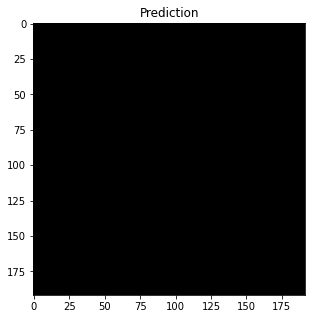

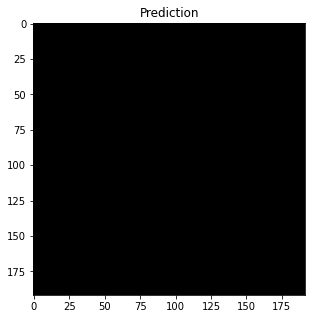

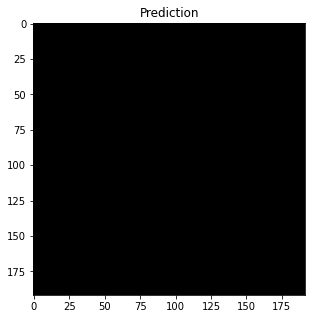

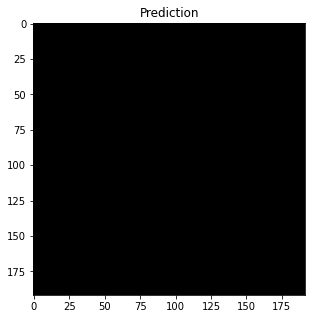

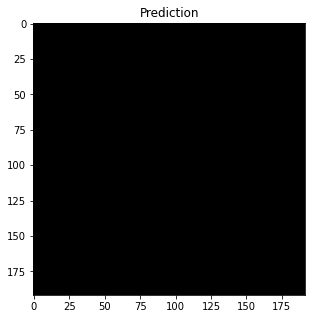

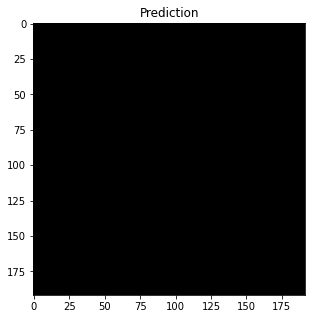

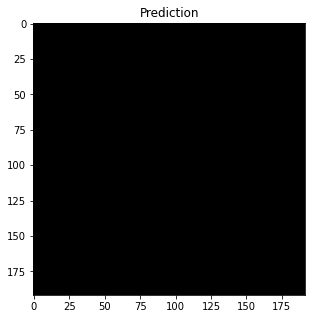

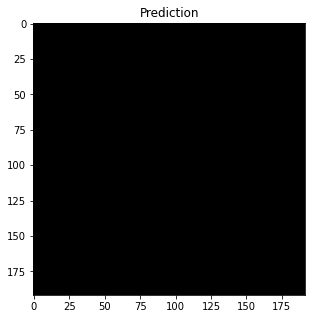

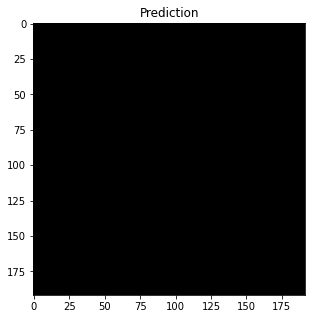

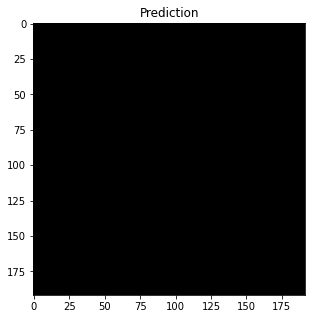

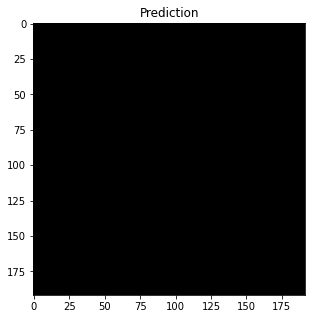

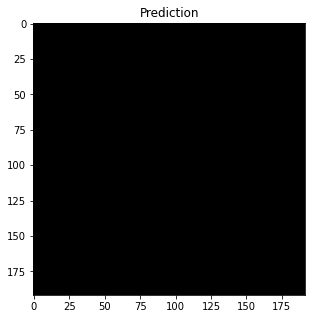

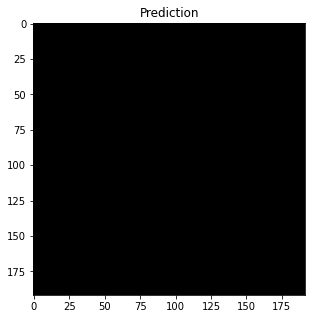

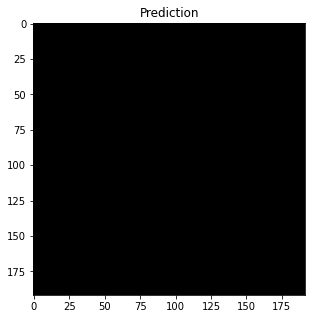

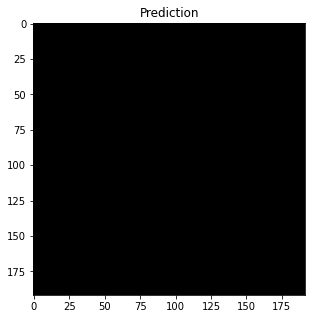

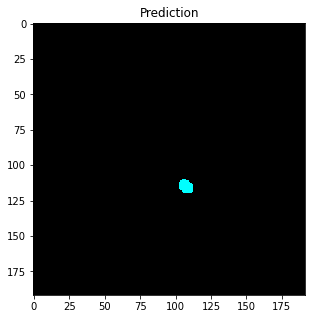

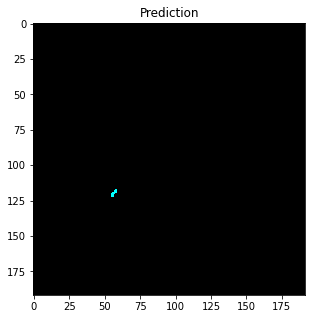

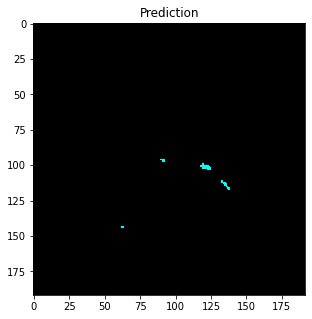

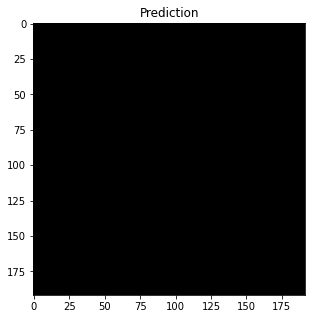

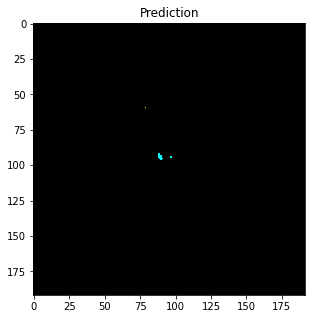

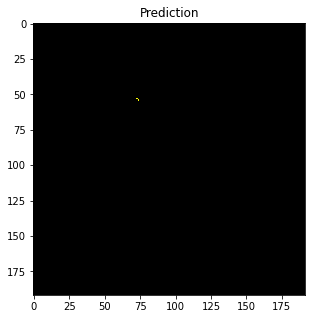

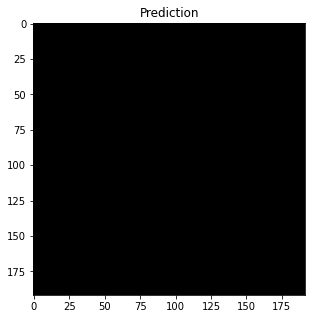

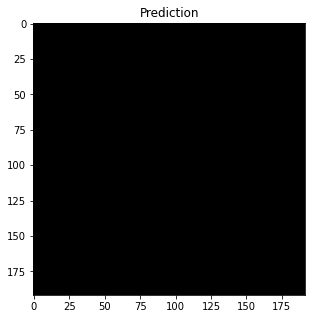

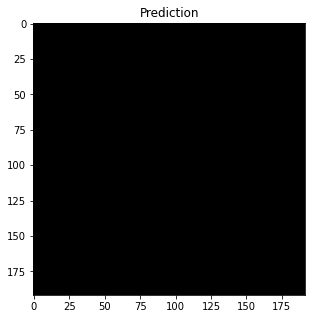

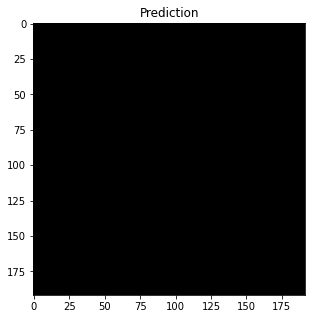

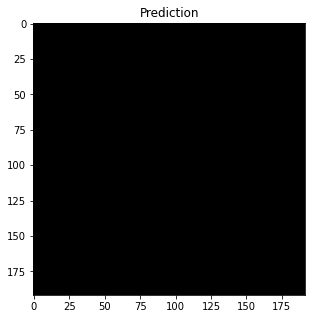

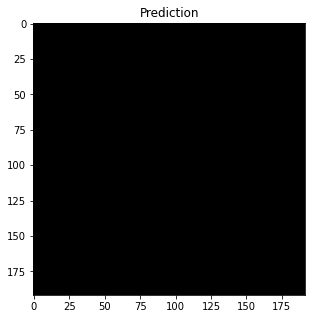

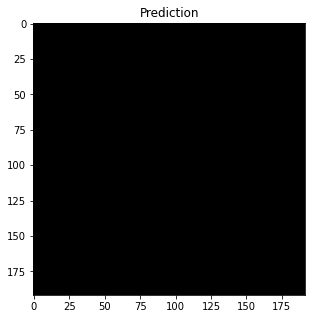

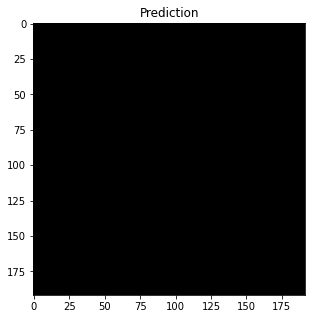

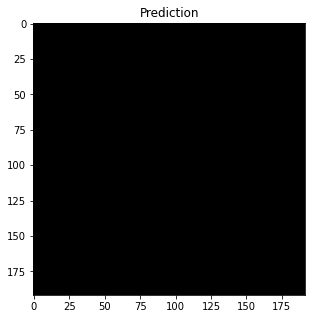

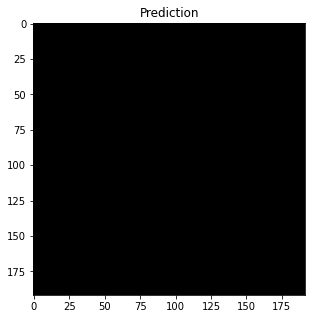

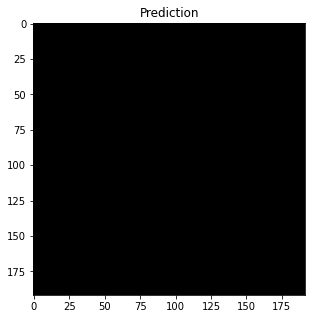

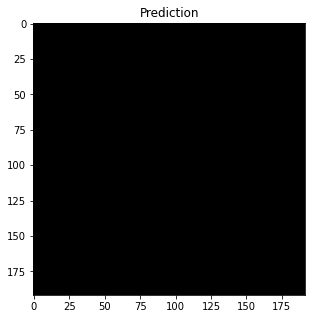

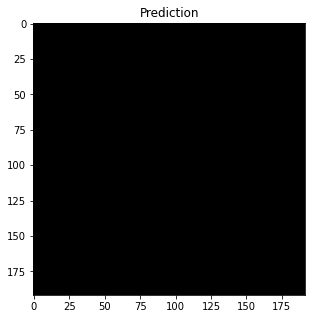

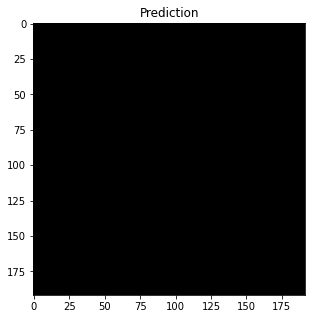

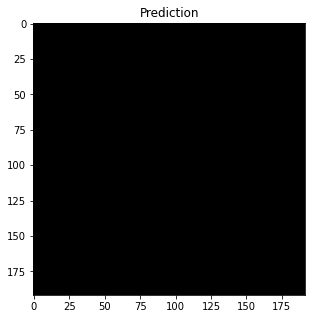

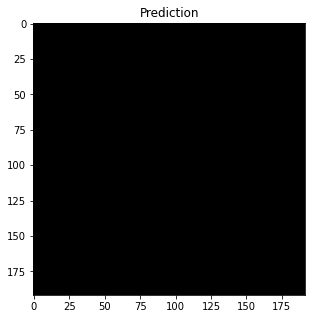

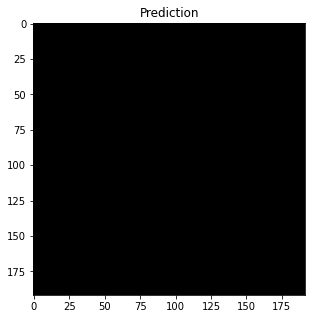

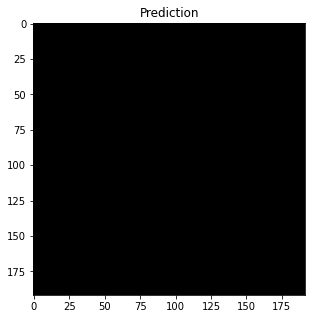

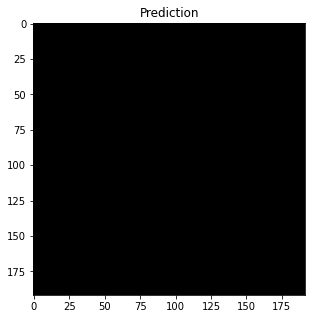

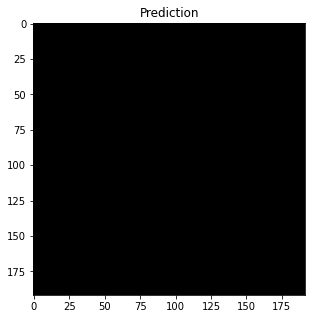

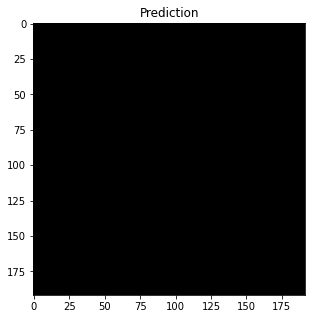

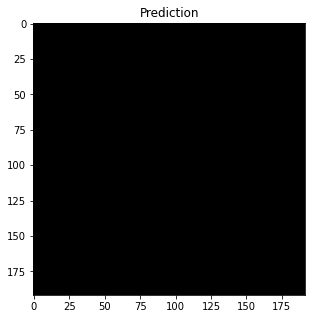

In [30]:
trans_result = np.transpose(pred_result,(0,3,1,2,4))
print(trans_result.shape)
def plt_show(one_nii):
    for i in range(one_nii.shape[0]):
        plt.figure(figsize=(5,5))
        pred = one_nii[i].astype(np.uint8)
        plt.imshow(pred, interpolation='nearest',vmin=0,vmax=255)
        plt.title('Prediction')
        plt.show()
for j in range(trans_result.shape[0]):
    plt_show(trans_result[j])
